# import and load data

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


Elapsed time(hr)  Pressure(psia)  first_order_derivative  \
count      29813.000000    29813.000000            29813.000000   
mean        1949.504754     5858.252763               30.980488   
std         1071.285888     1201.608375              217.076860   
min            0.000000     2989.186167            -1177.363679   
25%         1223.614626     4920.227064              -26.315082   
50%         2055.749995     5958.685278                6.577672   
75%         2691.845828     6884.300893               50.575874   
max         4070.949737     7942.372157             1442.449150   

       second_order_derivative  
count             29813.000000  
mean              -3316.399705  
std               26067.263416  
min             -267661.267543  
25%                -150.940811  
50%                   0.048895  
75%                 129.782625  
max              199644.890976

Elapsed time(hr)  Liquid rate(STB/D)
count      10191.000000        10191.000000
mean        2210.383315       -16880.702745
std         1121.860526         4591.205914
min            0.433384       -22568.277381
25%         1345.039547       -19746.868884
50%         2248.487512       -18758.998204
75%         3074.228818       -15911.221687
max         4075.570423            1.166046

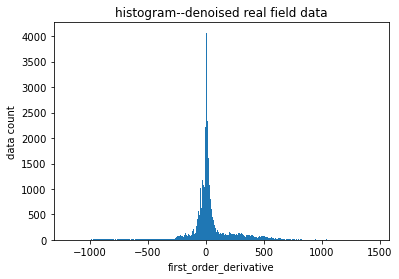

[(24833, 24872), (5698, 5833), (14471, 14575), (10149, 10224)]
47.913402758931625
-12.103679078019923
111.47517980463454
97.0315455031132


In [1]:
%run imports_N_loadDenoised.ipynb

# coarse filter

In [2]:
%run coarse_filter.ipynb

fliter derivatives which are larger than 6.577671754538749, smaller than -99.97038962759567
the length of filtered points: 17888


# detect all break points candidates

In [3]:
# method="deltaTangent_MFFOD_FFOD"
method="deltaTangent_FFOD"

In [16]:
# # points=[buildup_DT,drawdown_DT]
# # points=[buildup_DRI,drawdown_DRI]
# points=[[],points]
# time_step=0.03
# # %run detect_FirstFOD.ipynb
# %run detect_MaxFOD.ipynb

In [17]:
# %store -r buildup_PR
# %store -r drawdown_PR
# points=buildup_PR+drawdown_PR

In [4]:
# points=Max_FOD[1]

time_halfWindow=None
point_halfWindow=10
polynomial_order=3
# tangent_type="single_point"
tangent_type="average"
# deltaTangent_criterion=40
deltaTangent_criterion=40
# points=[index for index in range(len(pressure_measure))]
%run detect_useDeltaTangent.ipynb

start to predict using tangent, the length of input points: 17888
-------calculate_Parameters_allCurve using 'polynomial' fitting
detect 2455 buildups and 772 drawdowns 
===============output==================
'buildup_DT: 2455,drawdown_DT: 772'


<Figure size 1440x720 with 0 Axes>

In [6]:
points=[buildup_DT,drawdown_DT]
# points=[buildup_DRI,drawdown_DRI]
time_step=0.5
# time_step=0.2
%run detect_FirstFOD.ipynb
# %run detect_MaxFOD.ipynb

methods\derivative_method.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 2455,len(buildUp_first_FOD): 402'
'len(drawDown_df): 772,len(drawDown_first_FOD): 83'
===============output==================
First_FOD


# spilit periods and find multi-rate break points

In [20]:
# len(First_FOD[0])
# %store First_FOD
# %store Max_FOD

In [7]:
points_buildUp=First_FOD[0]
points_drawDown=First_FOD[1]
# minor_threshold_shutIn=0.02
minor_threshold_shutIn=0.028
# minor_threshold_shutIn=0.030
minor_threshold_Flowing=0.03
%run store_transients.ipynb

====detected_shutIns 35
====filtered_shutIns 32
====len(flowingPeriods) 33
====finally detect buildUp:141,drawDown:32


# plot flowing & shut-in periods

In [36]:
parameters={"Order":polynomial_order,
            "TanThre":deltaTangent_criterion,
            "shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
parameters

{'Order': 3, 'TanThre': 10, 'shutTr': 0.02, 'flowTr': 0.03}

'buildup:32, drawdown:32'
---initializing...
---plotting...


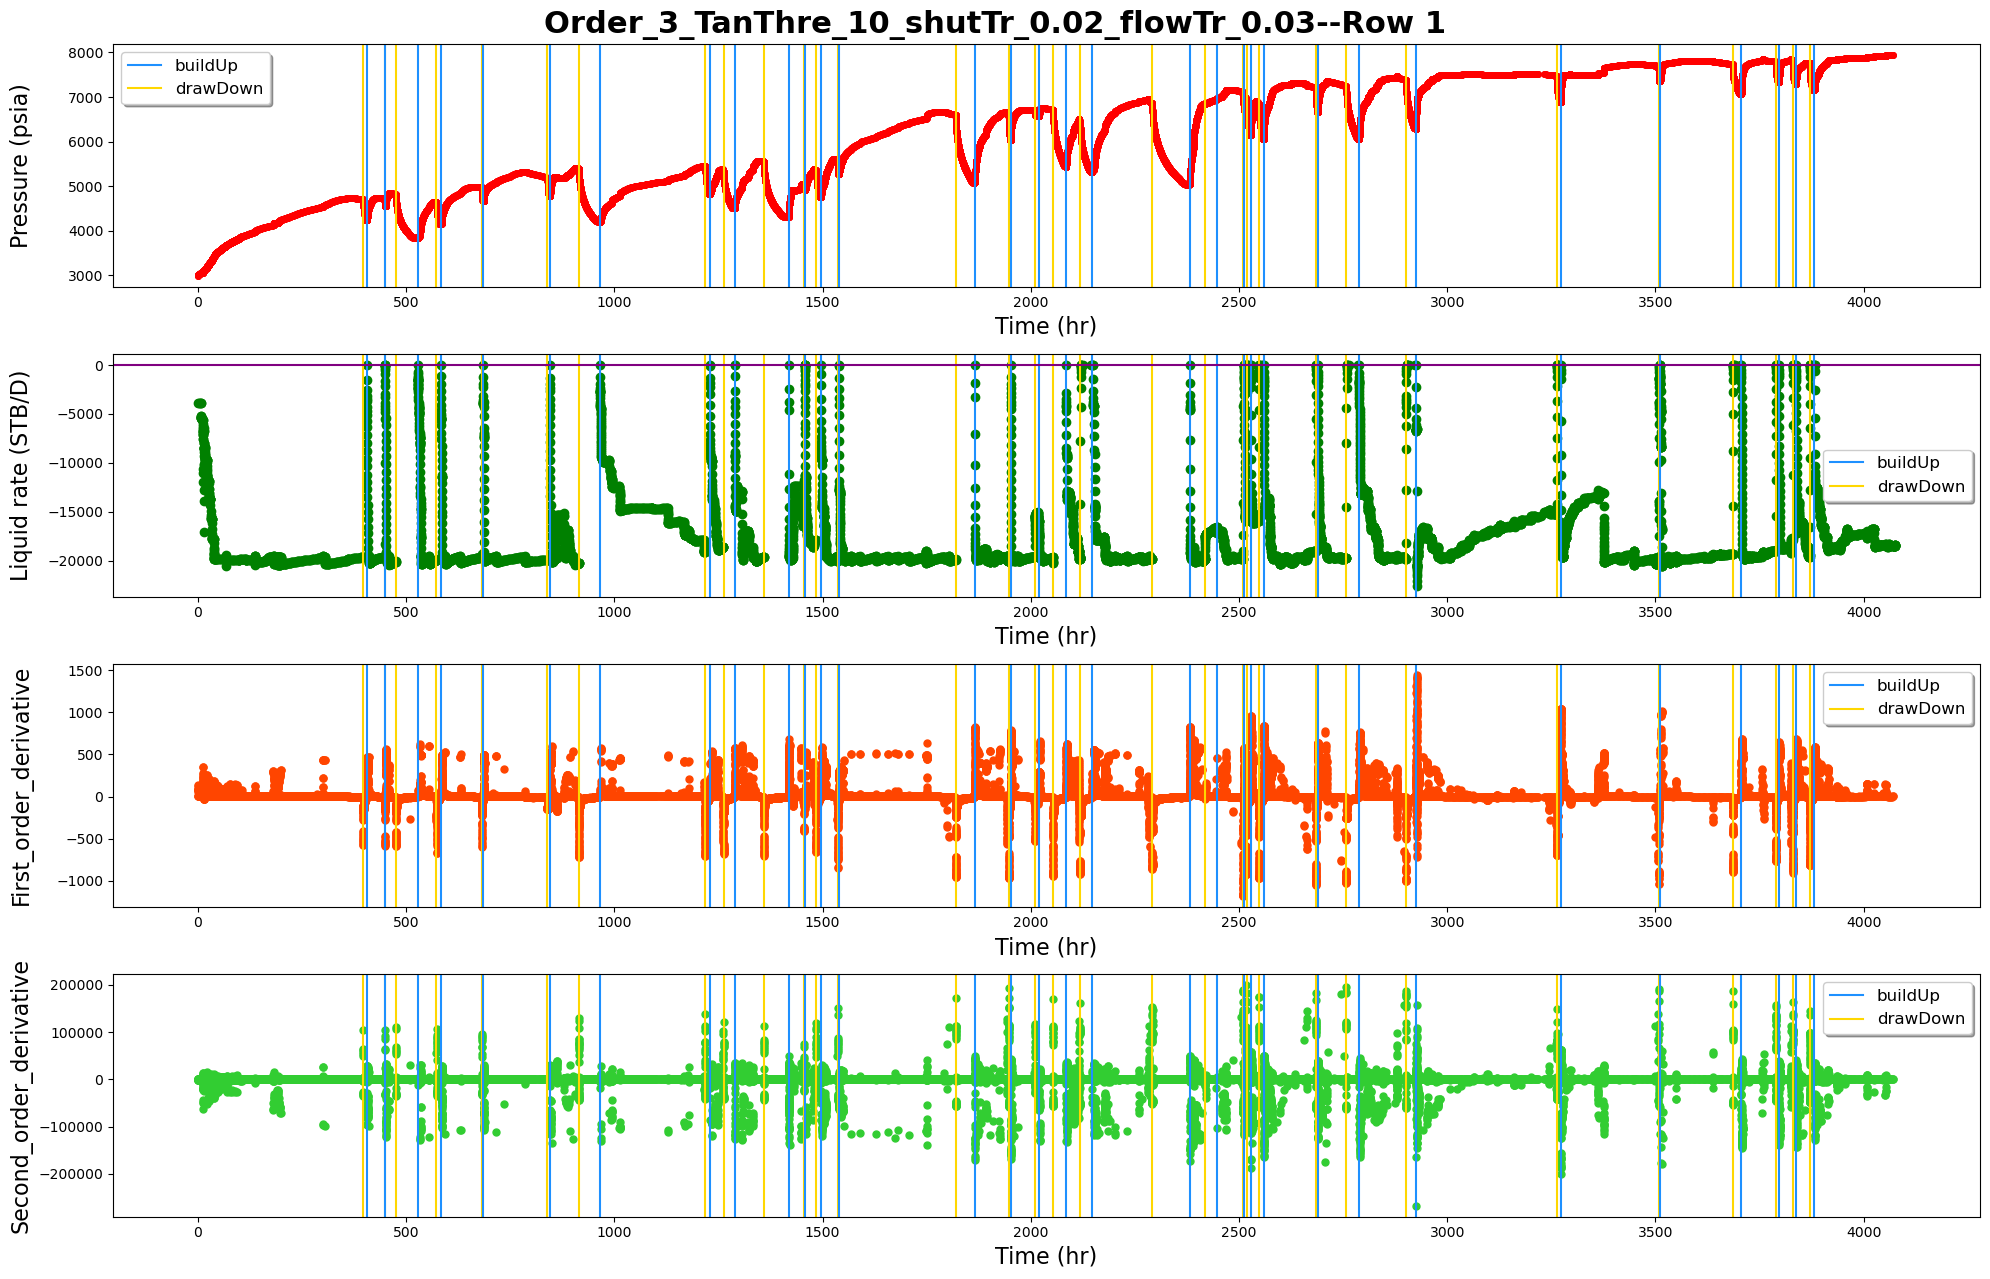

save whole....
detected 64 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


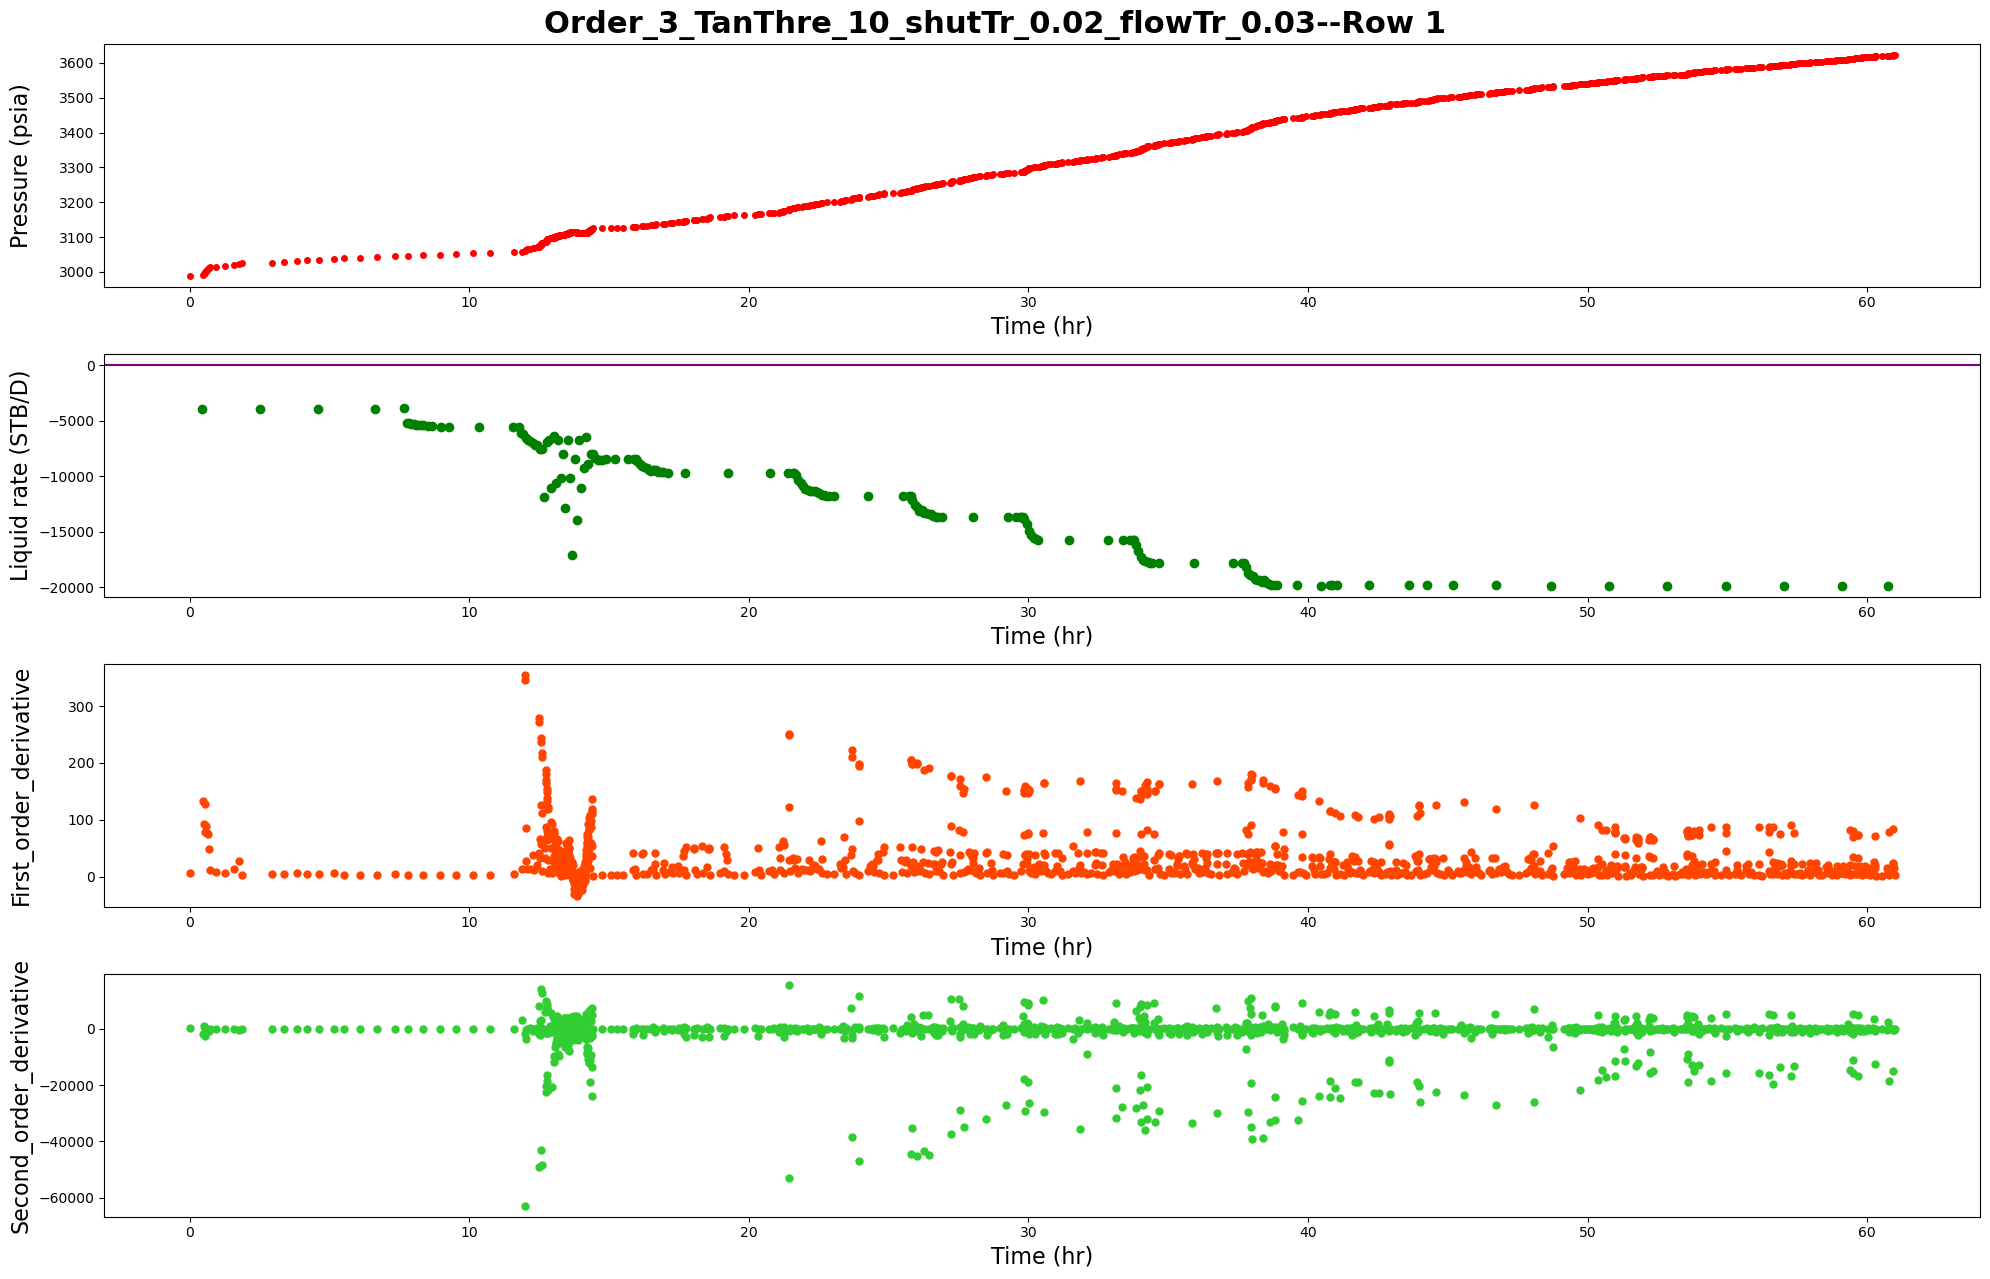

------row 2-----detected points:[2248]


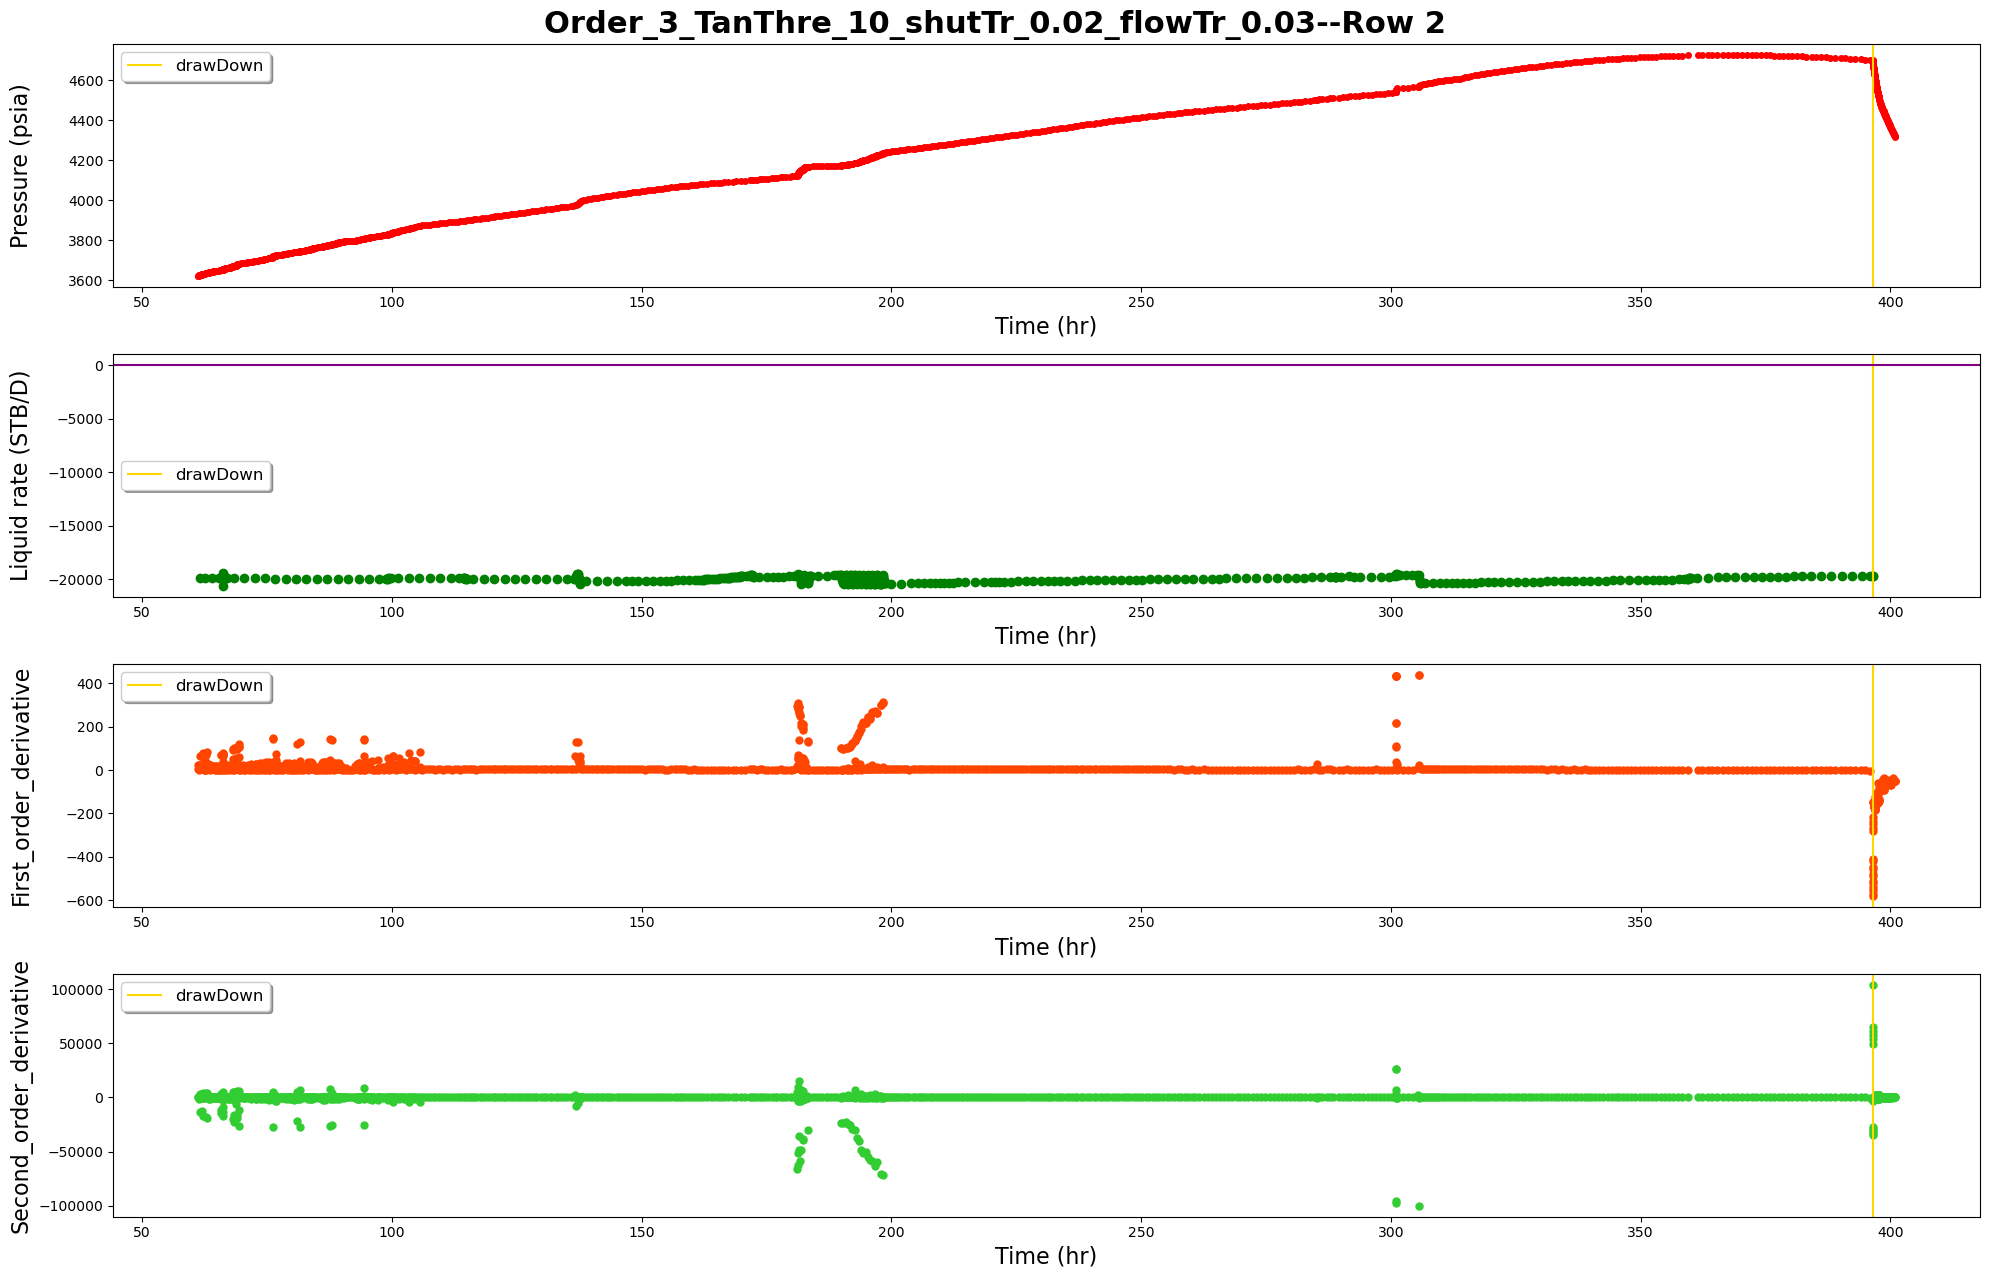

------row 3-----detected points:[2477, 2804, 2884, 3095, 3560]


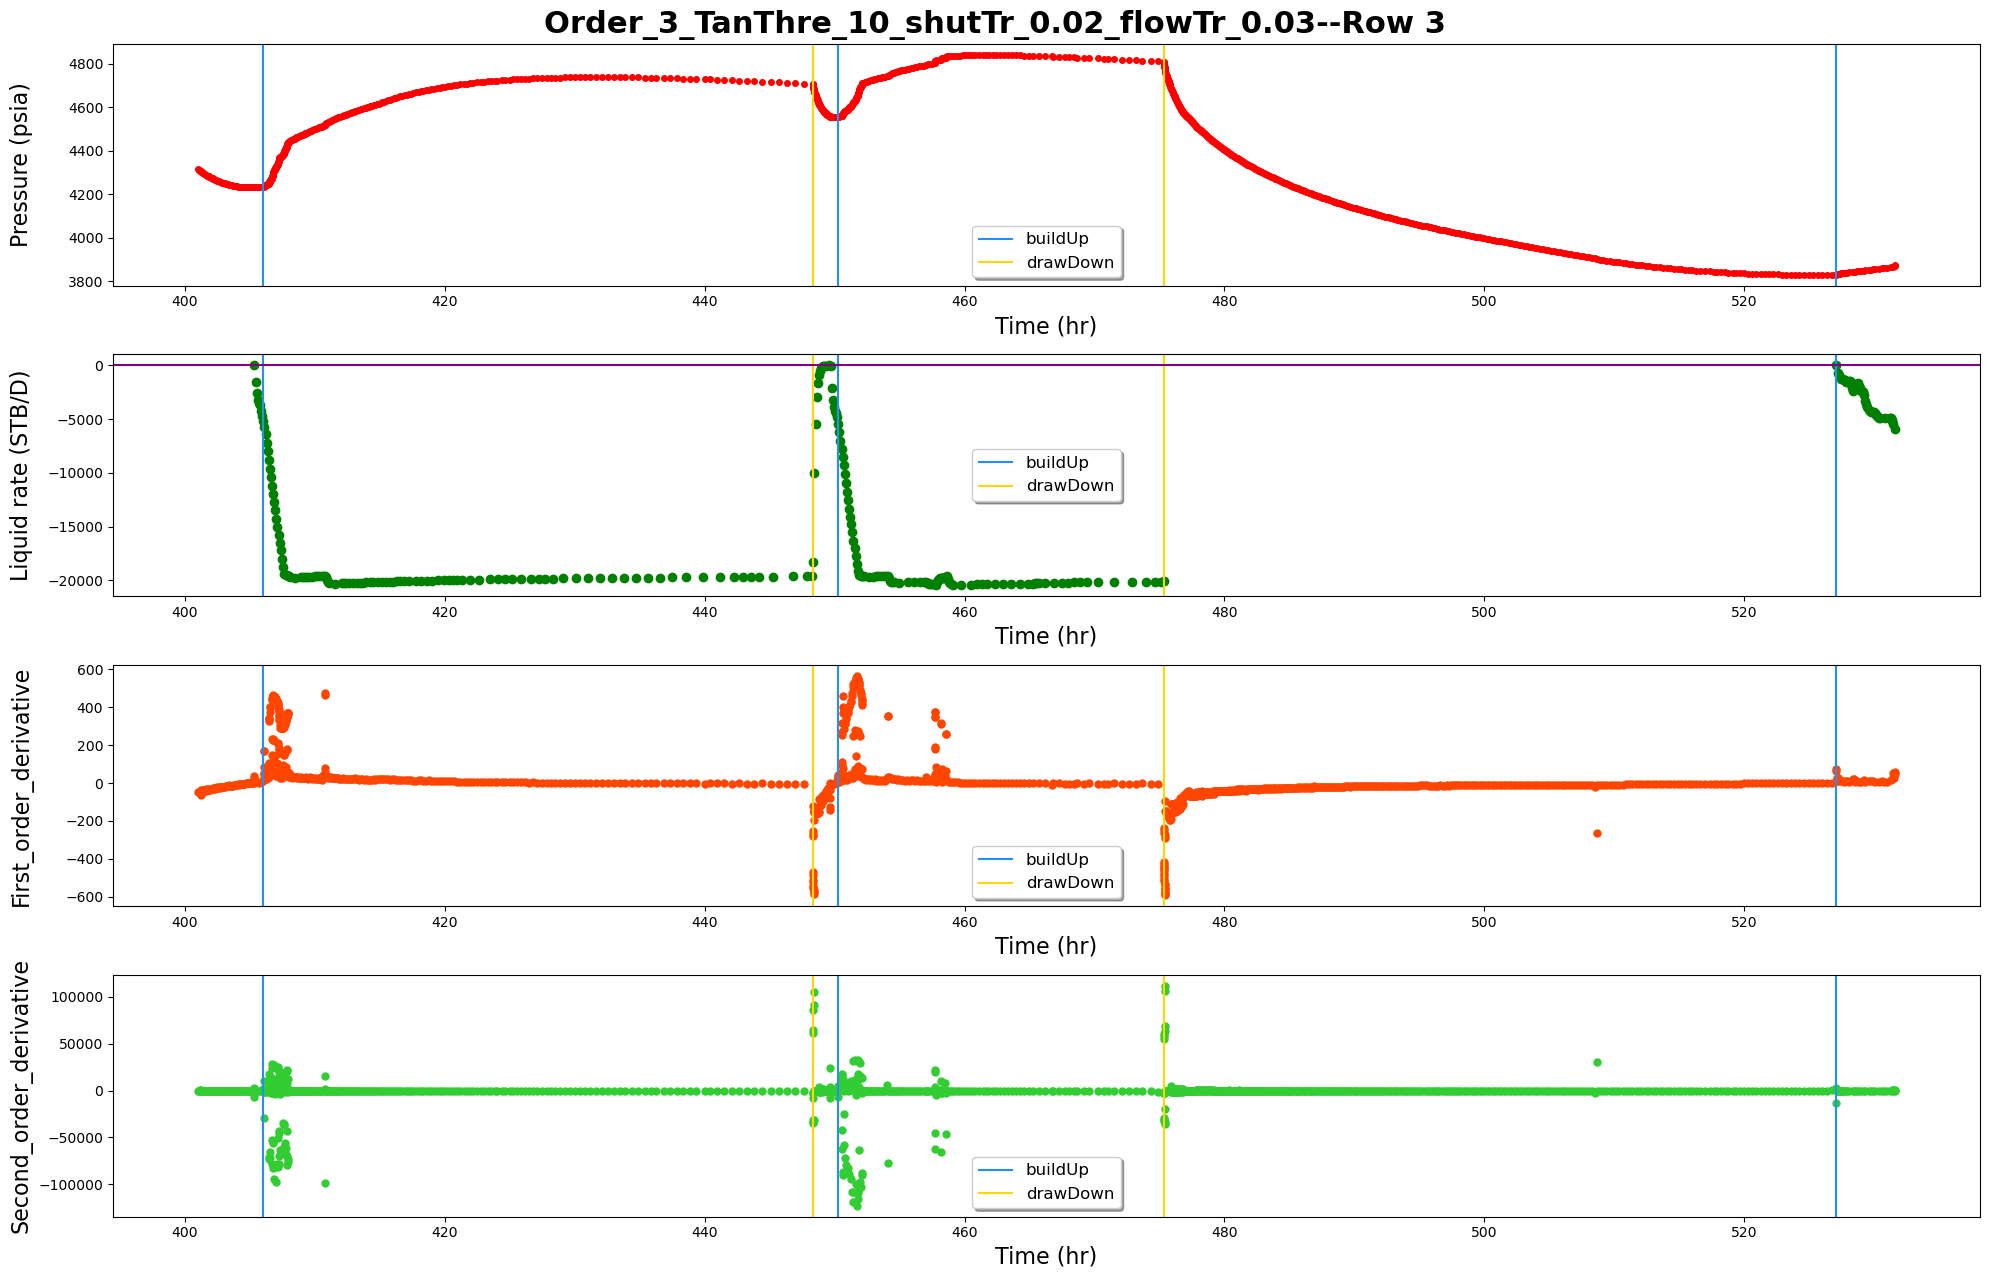

------row 4-----detected points:[3988, 4228, 4750]


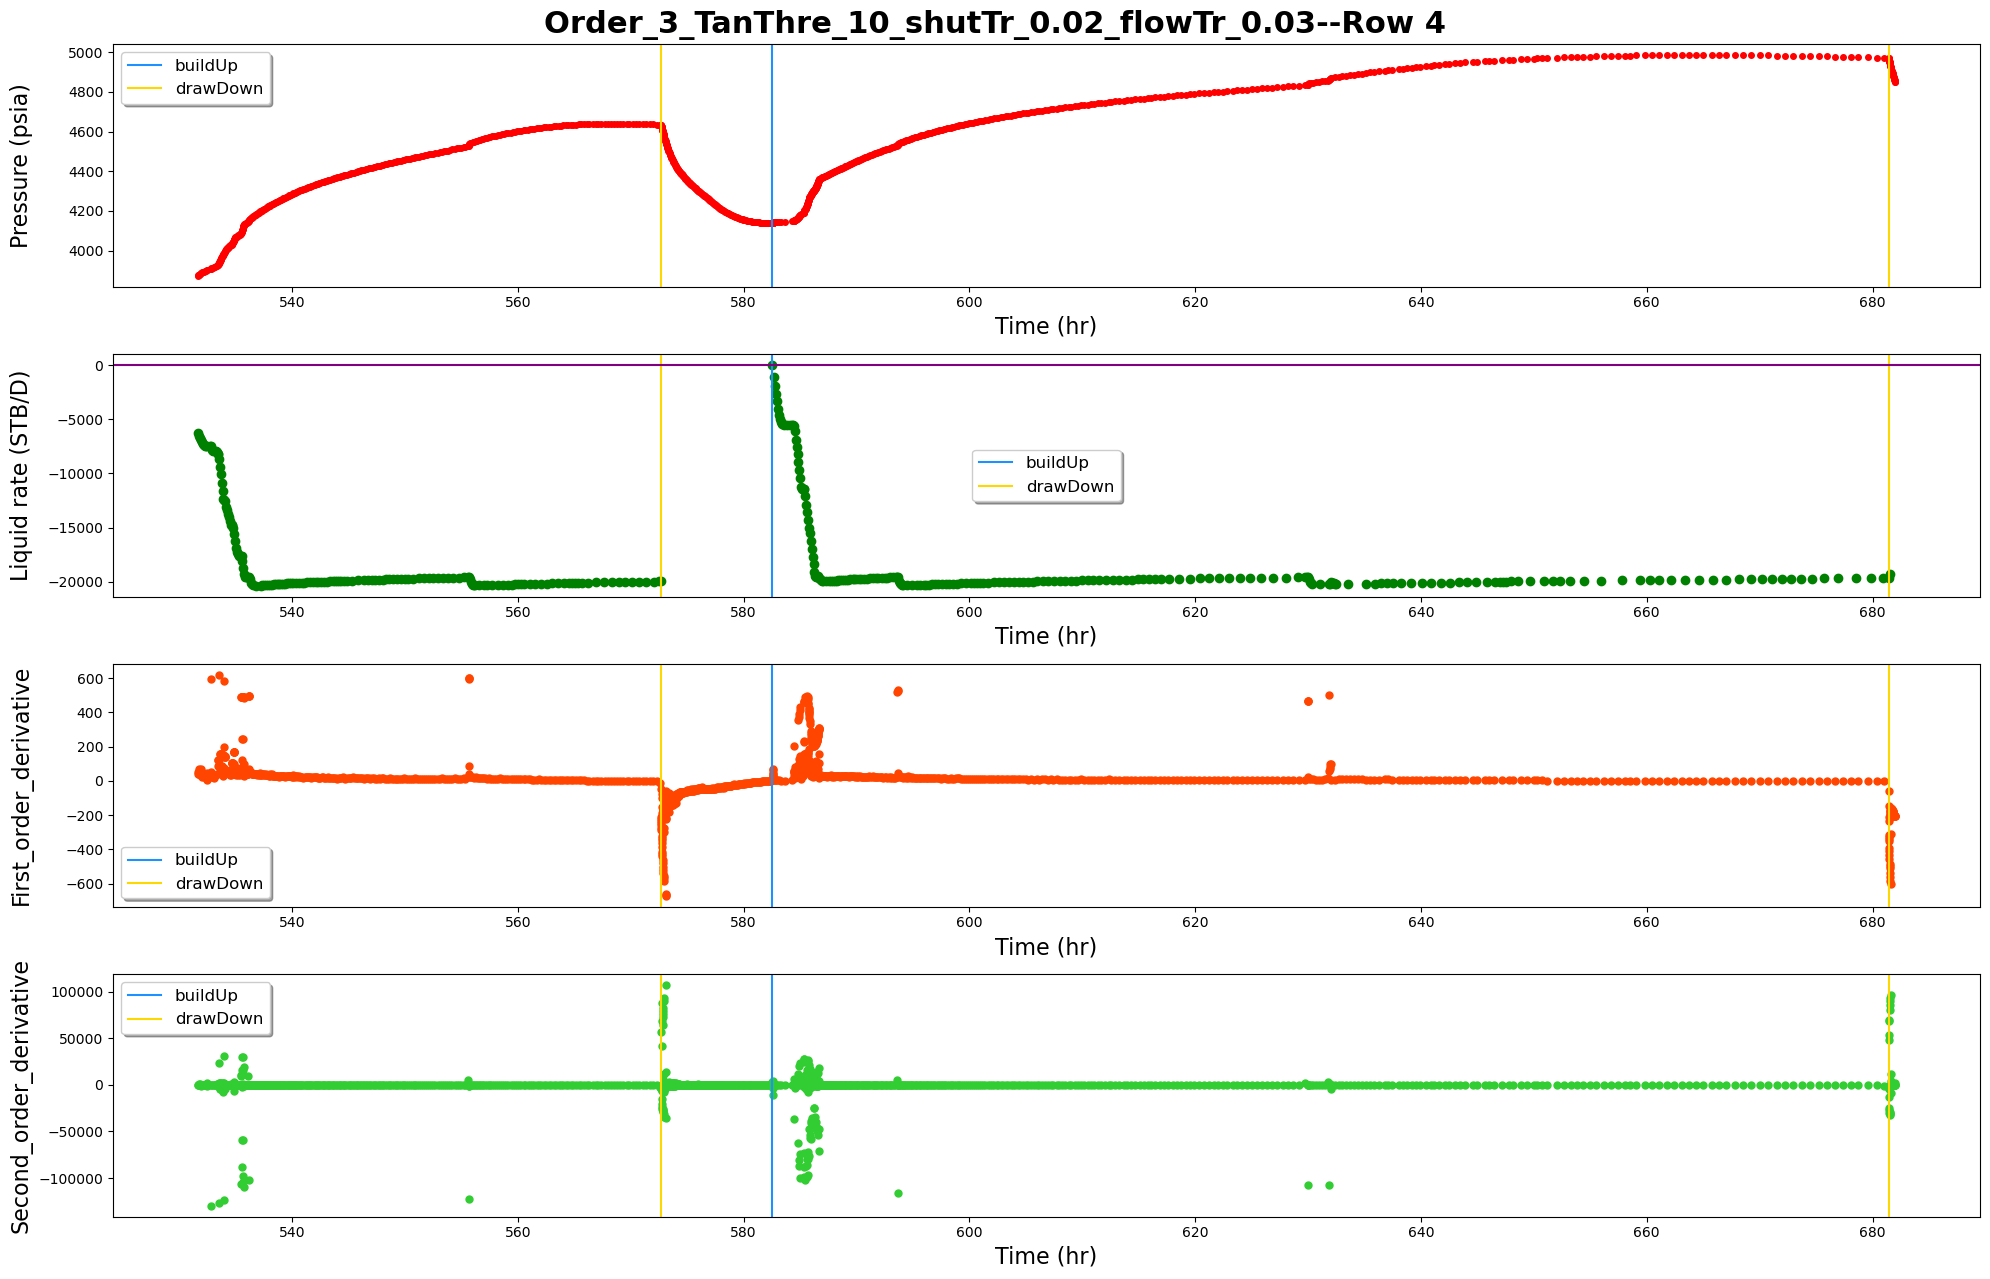

------row 5-----detected points:[4890, 5304, 5436, 5985]


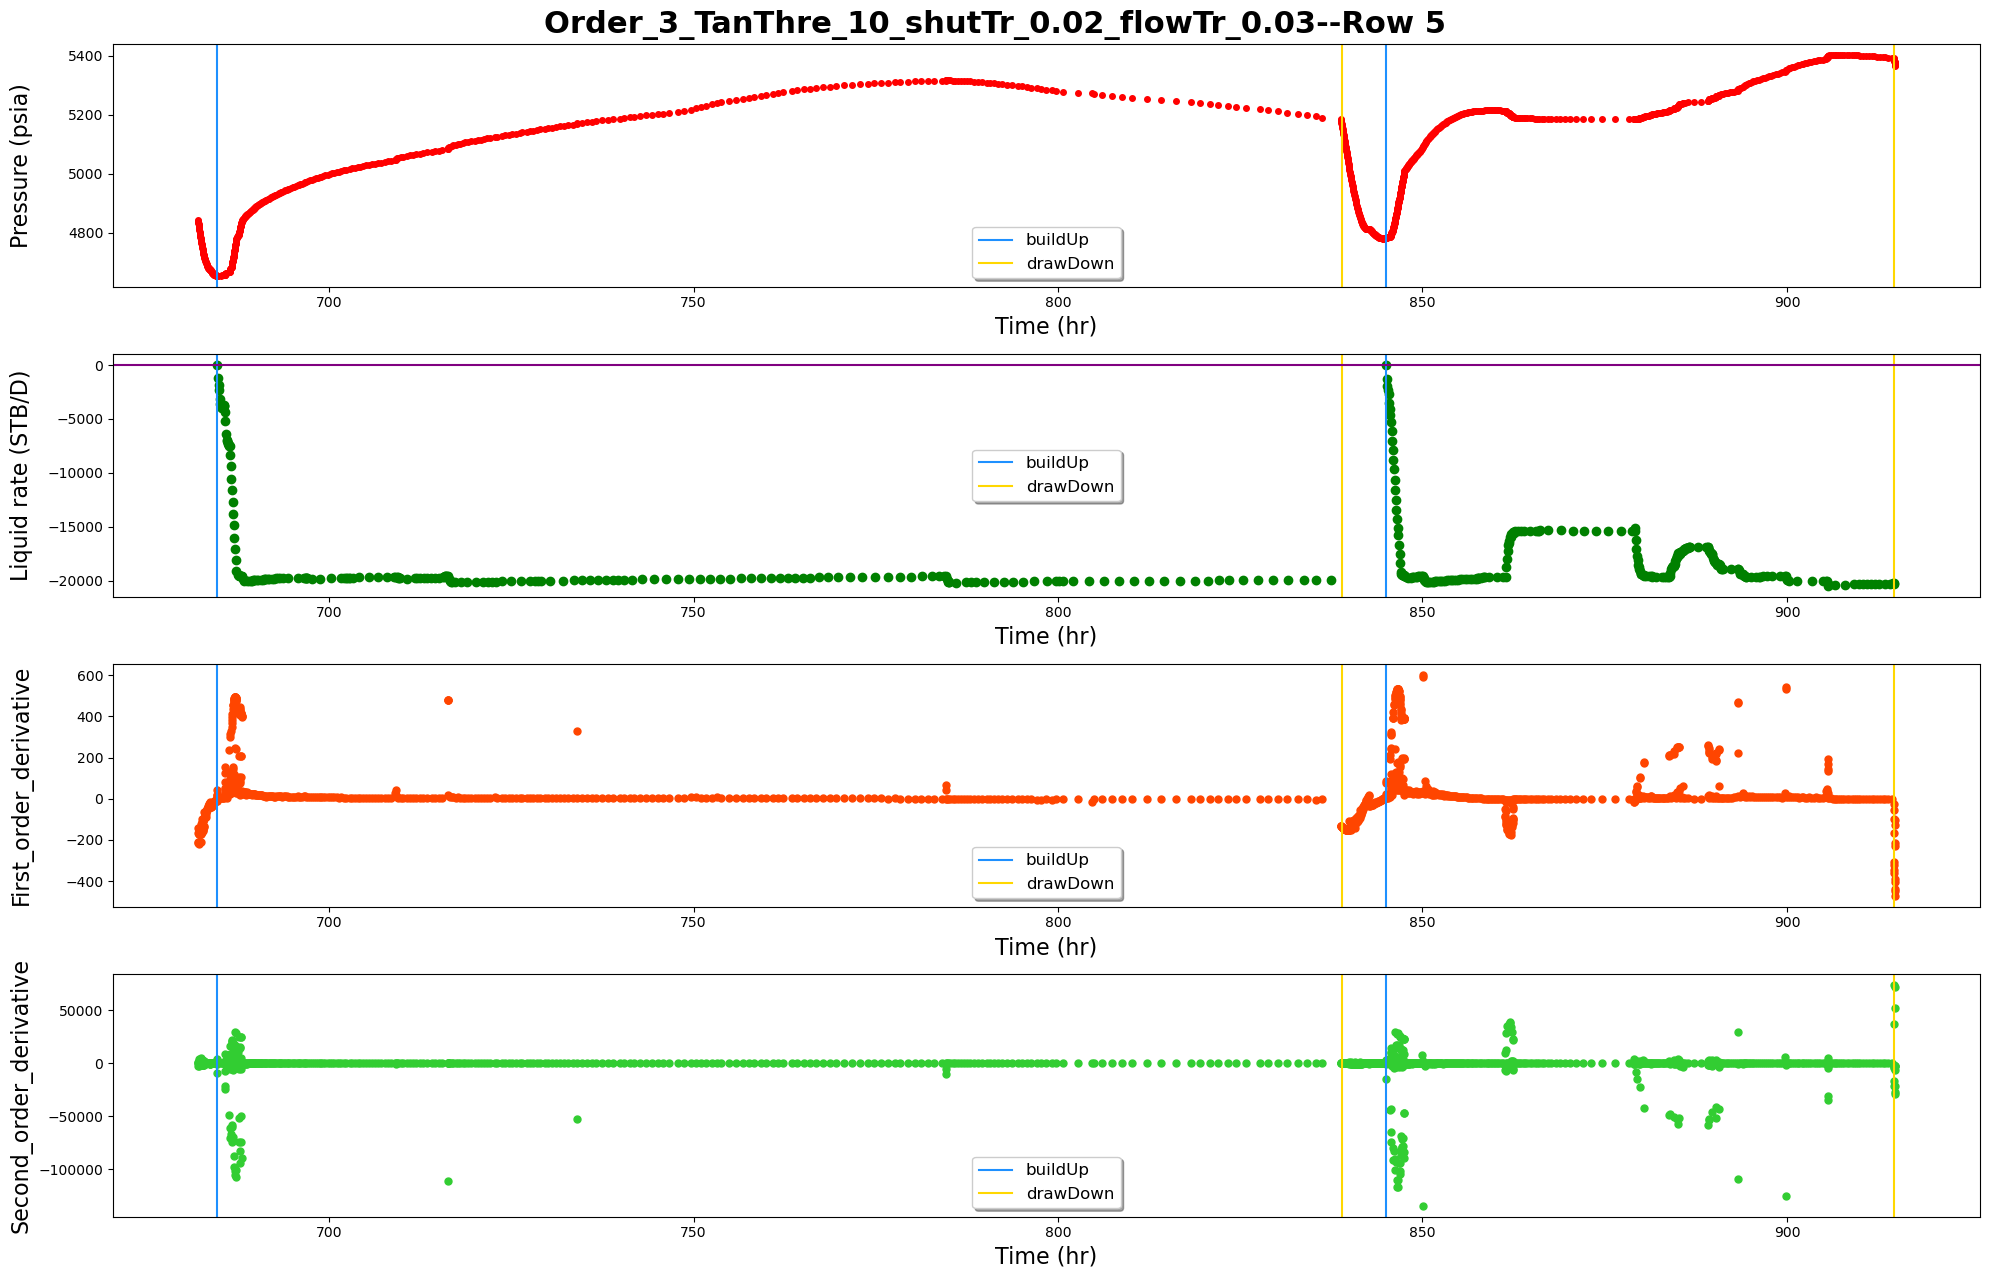

------row 6-----detected points:[6543]


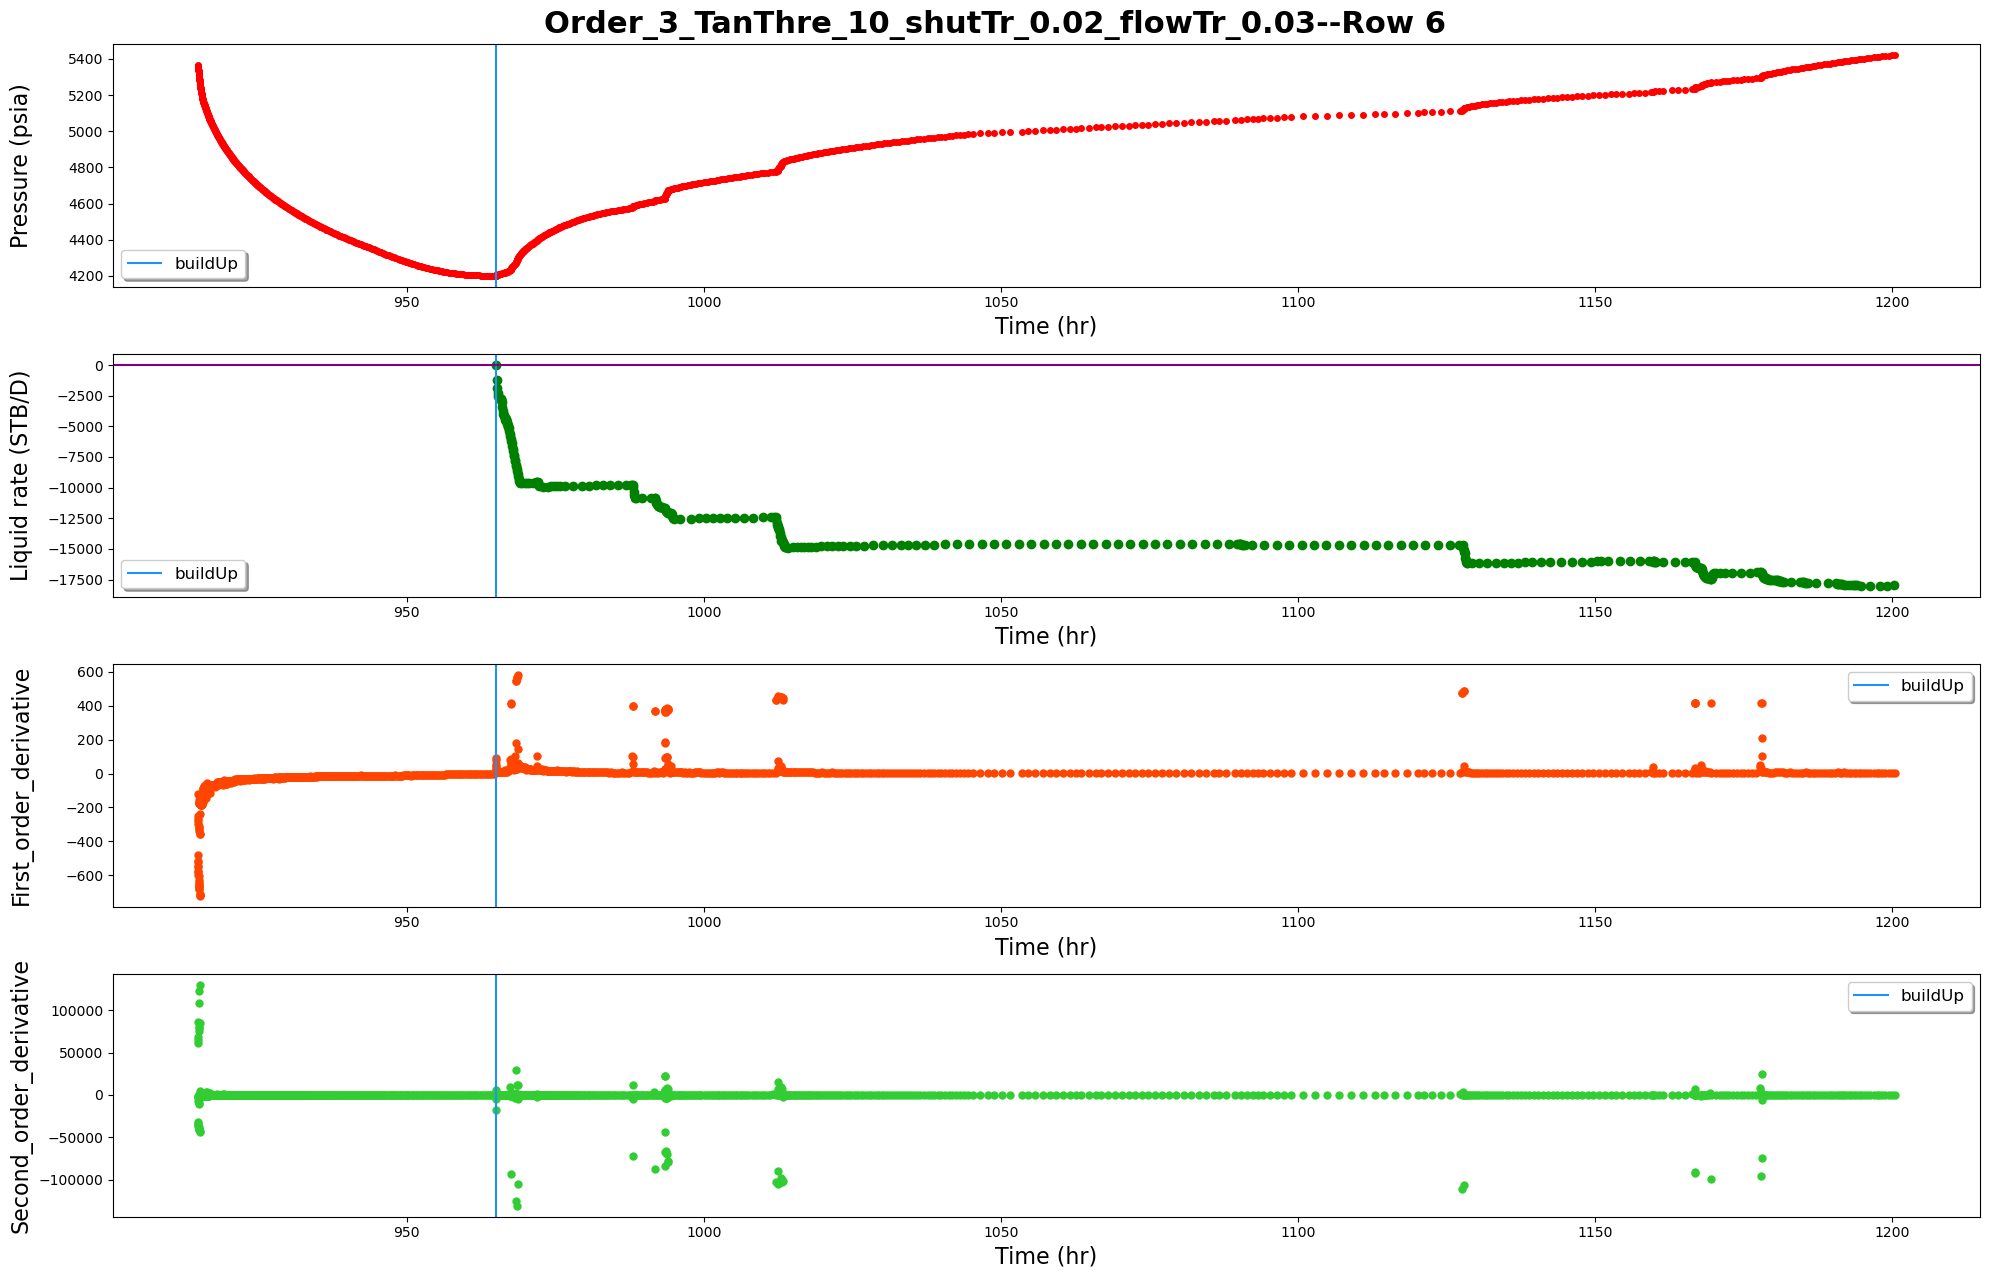

------row 7-----detected points:[7284, 7544, 8003, 8361]


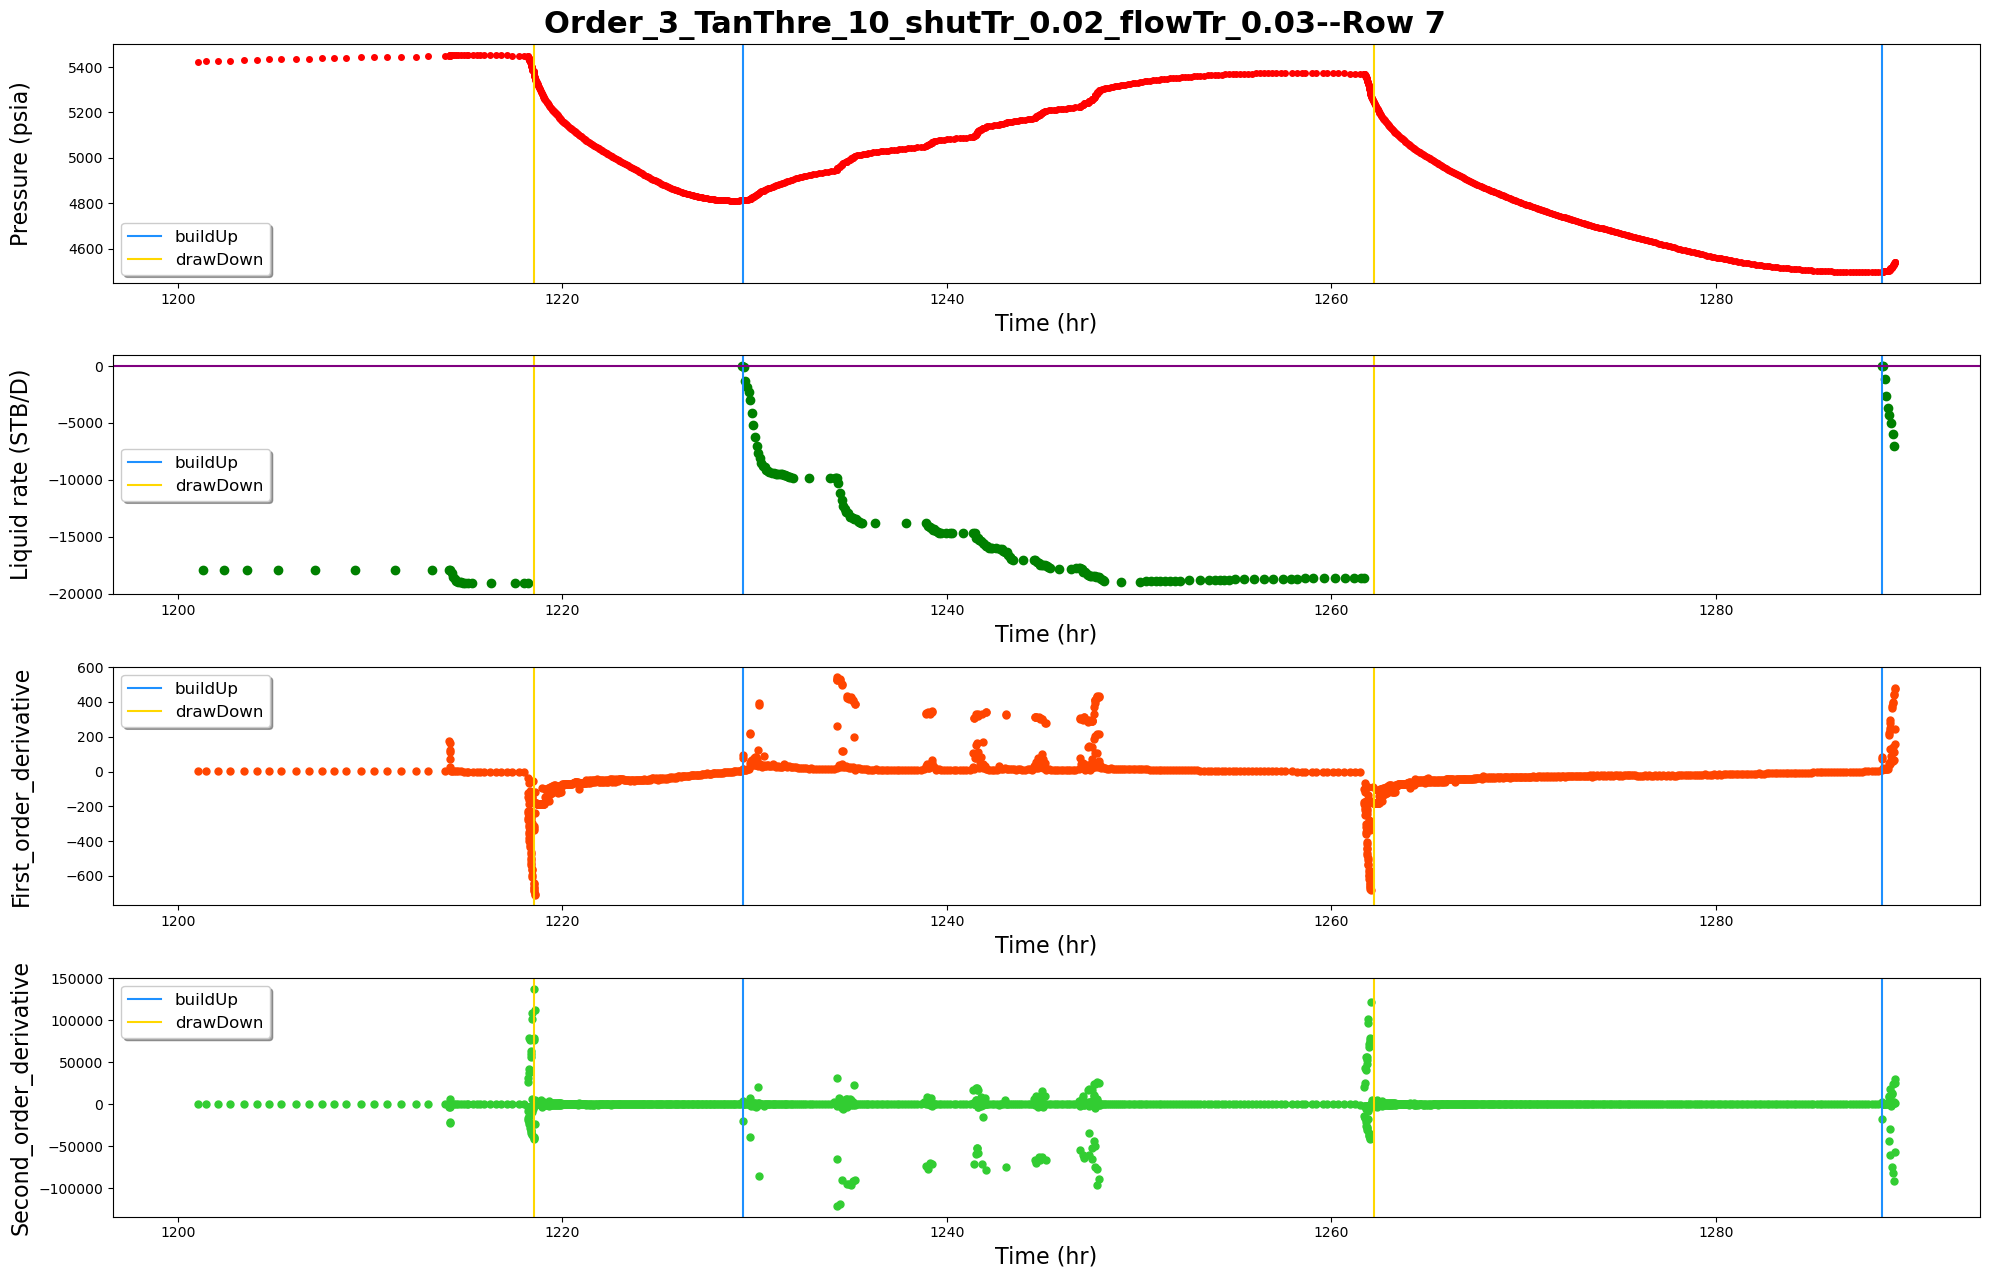

------row 8-----detected points:[9024]


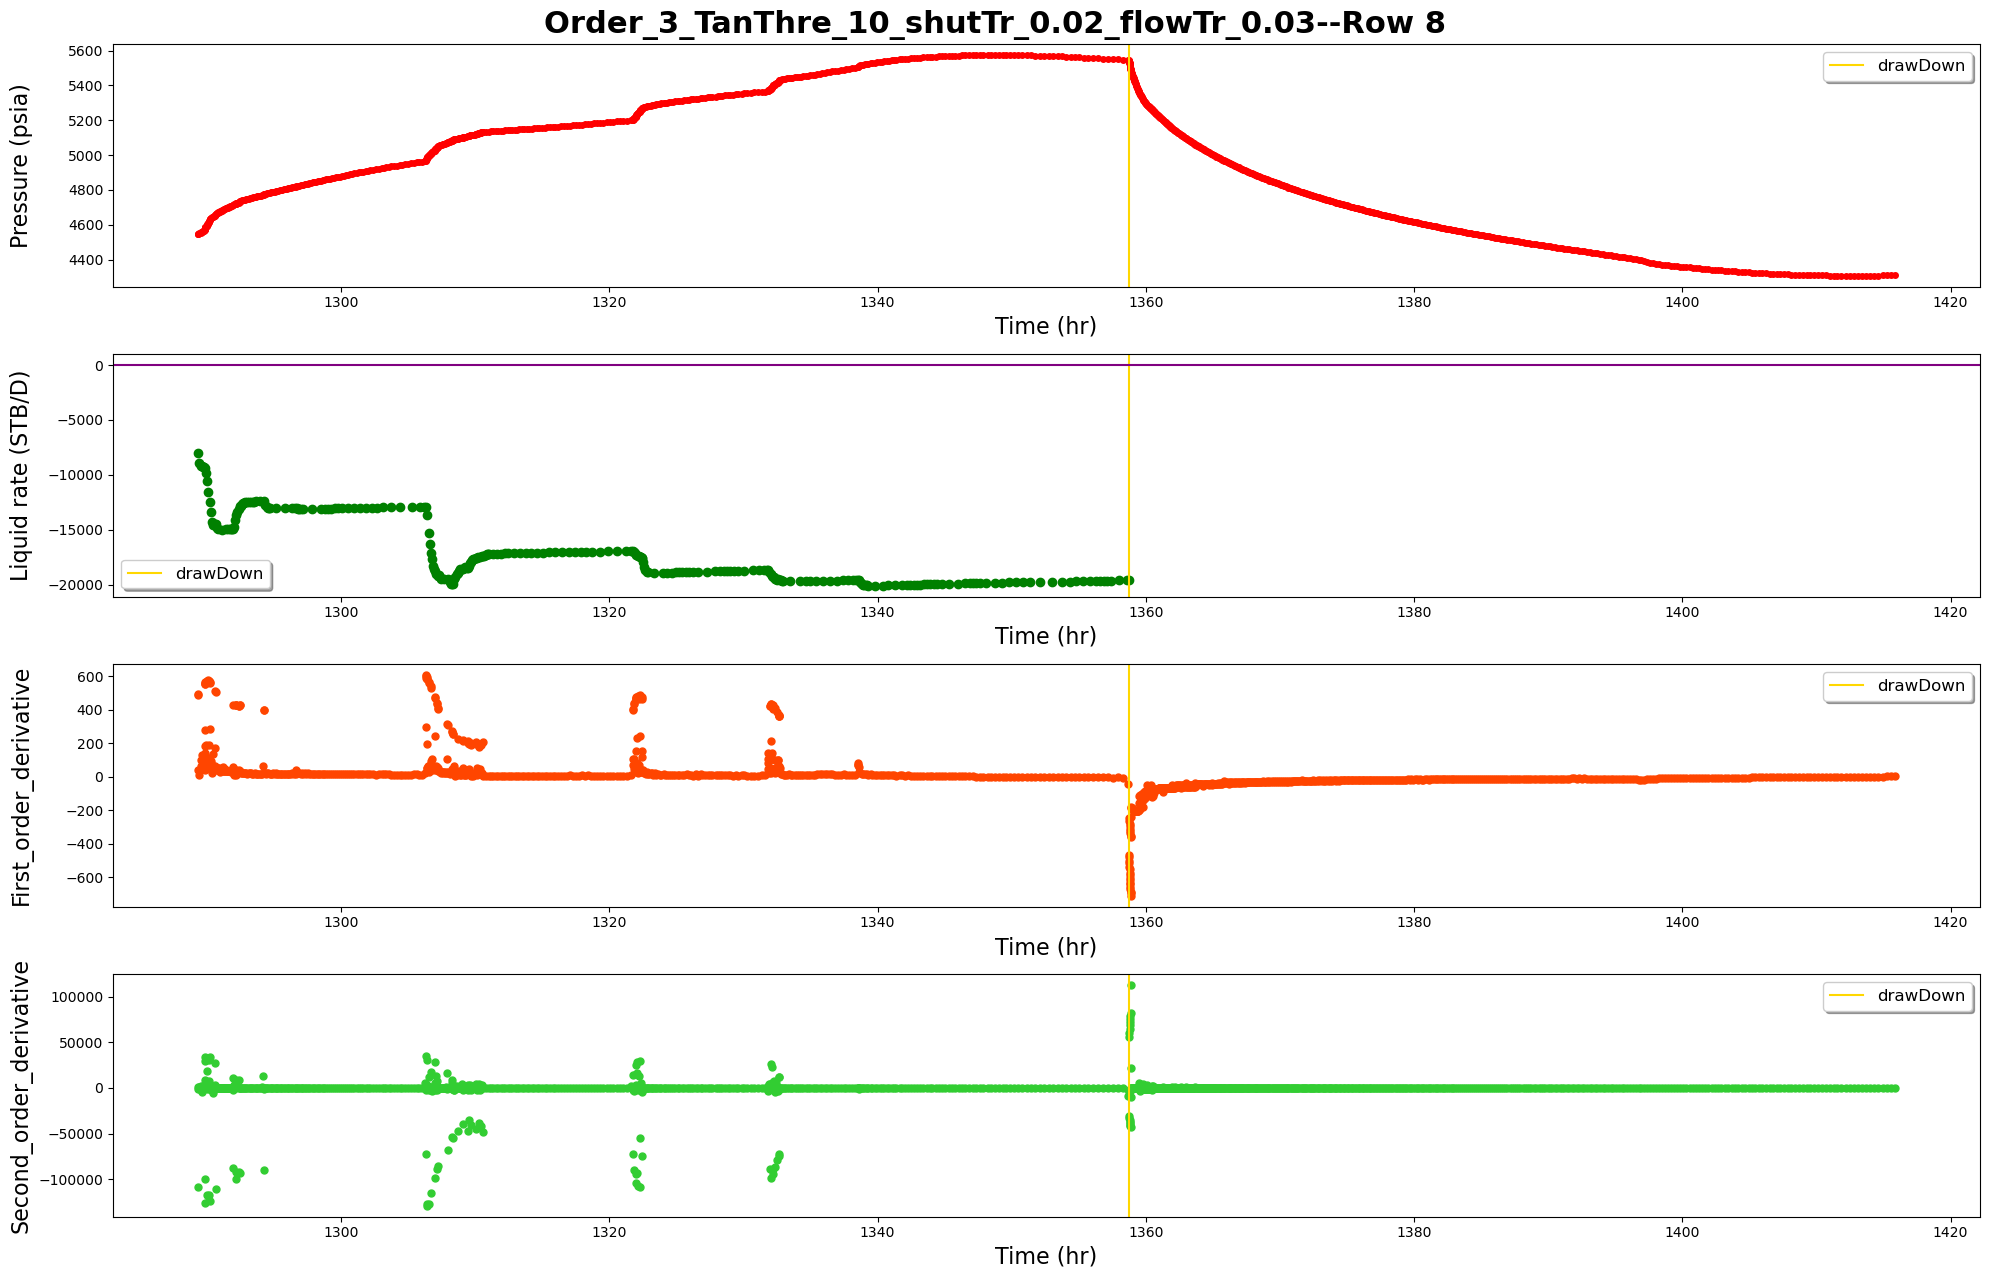

------row 9-----detected points:[9606, 10149, 10224, 10527]


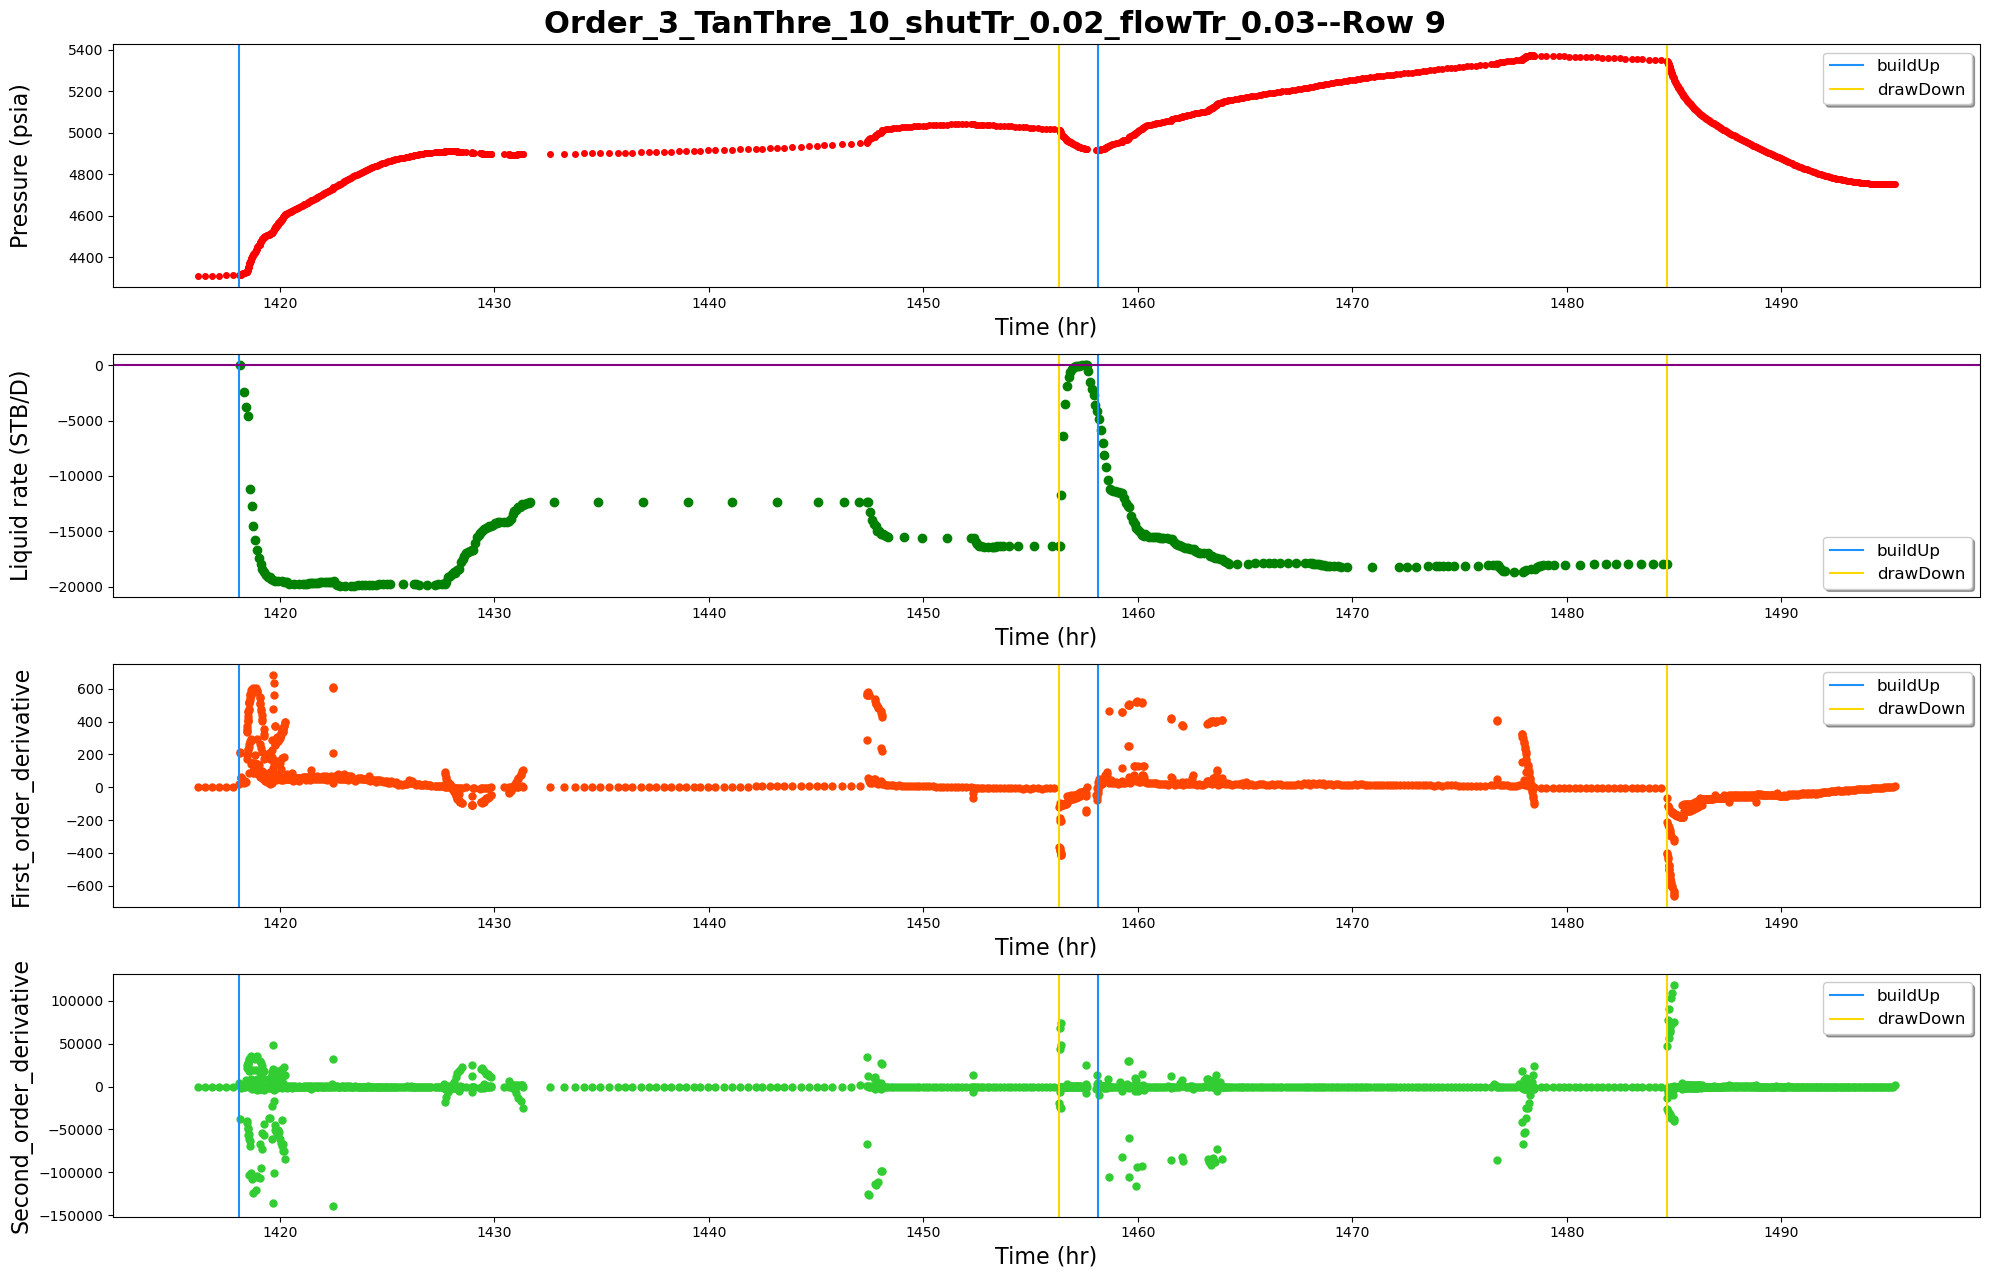

------row 10-----detected points:[10800, 11340, 11480]


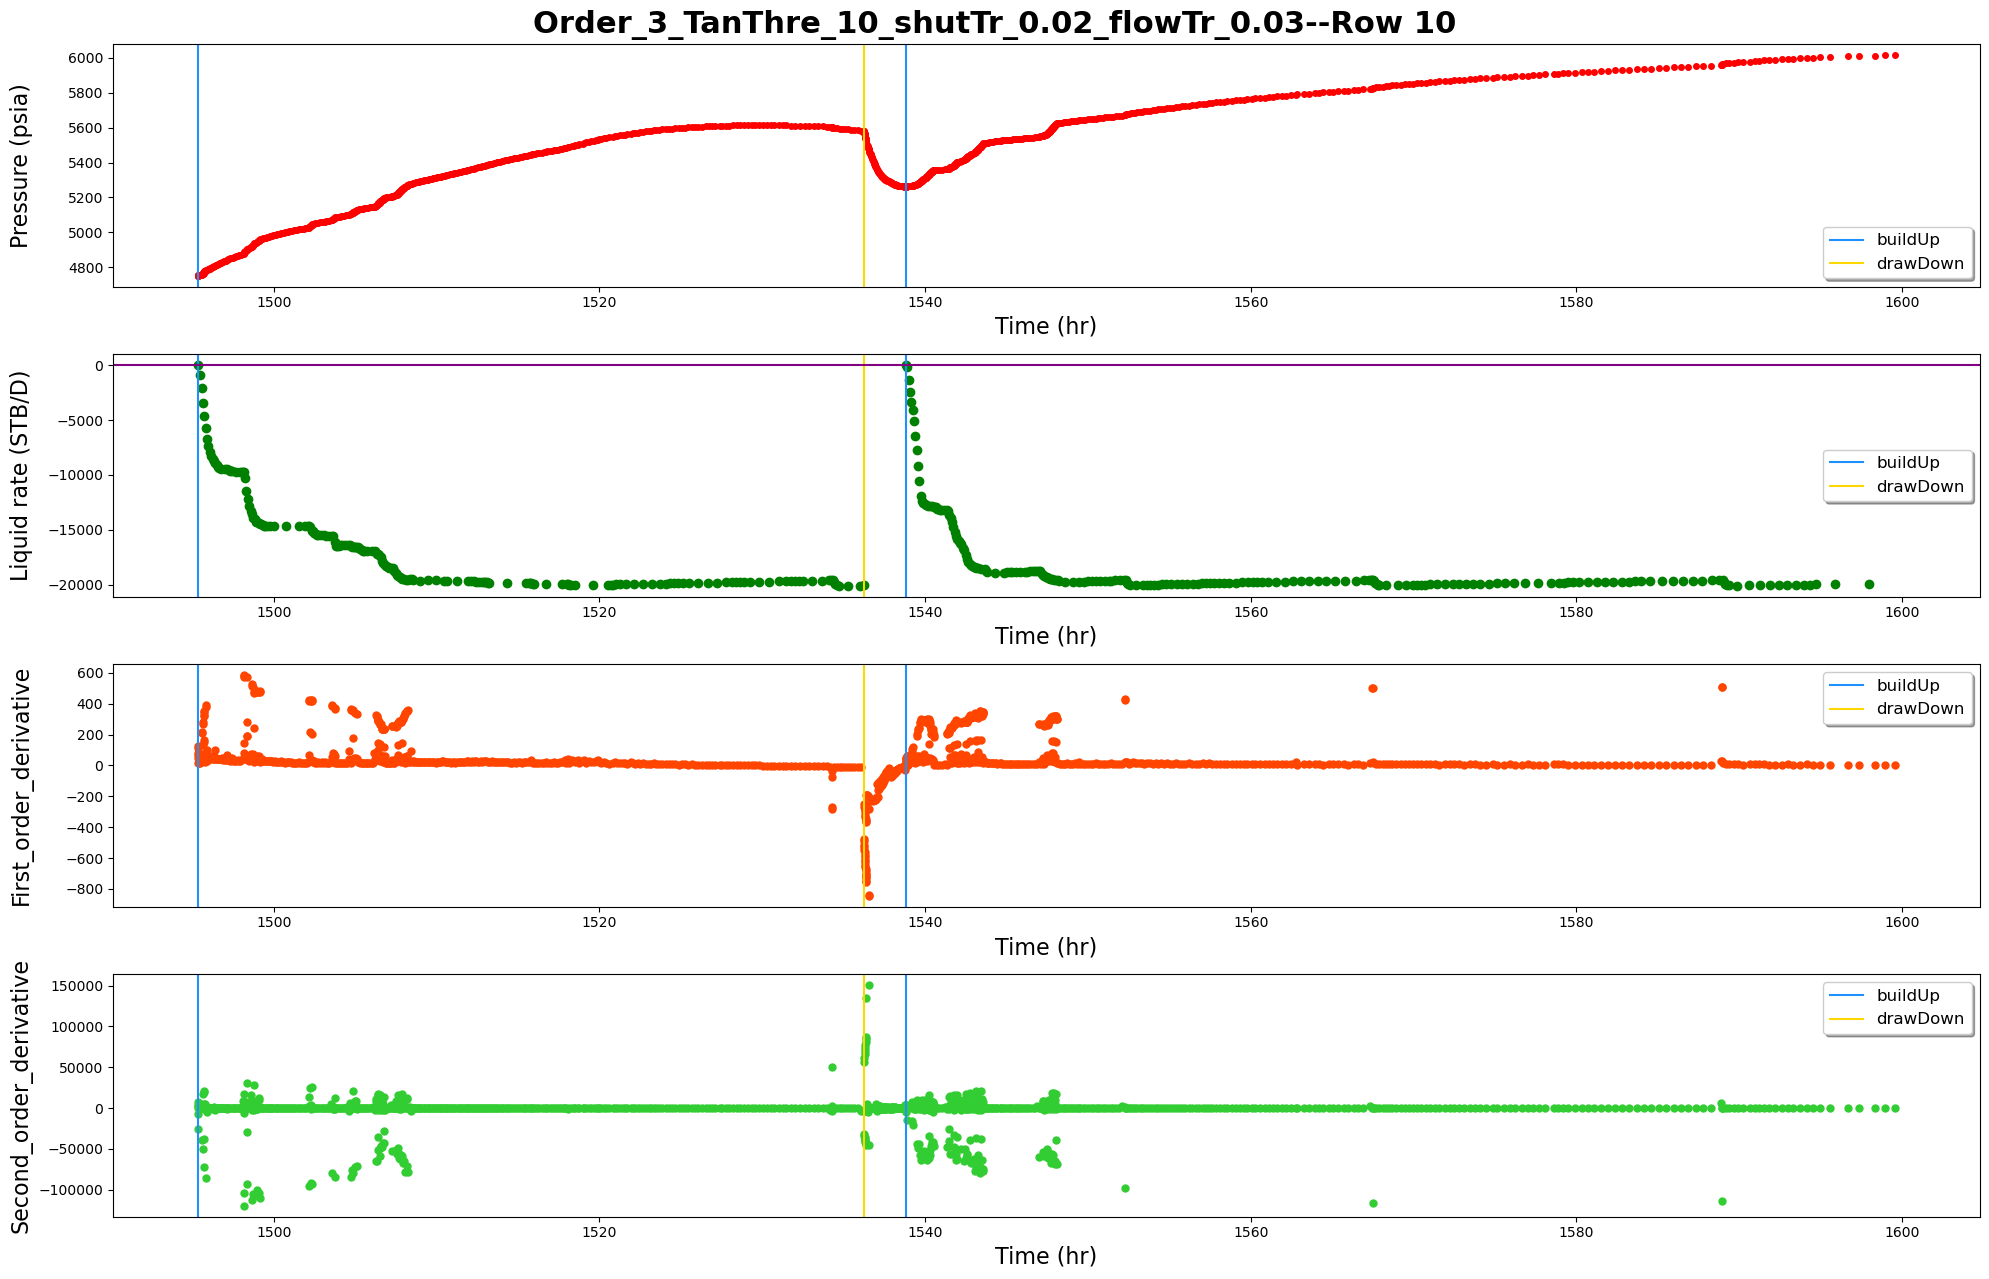

------row 11-----detected points:[12362, 13038]


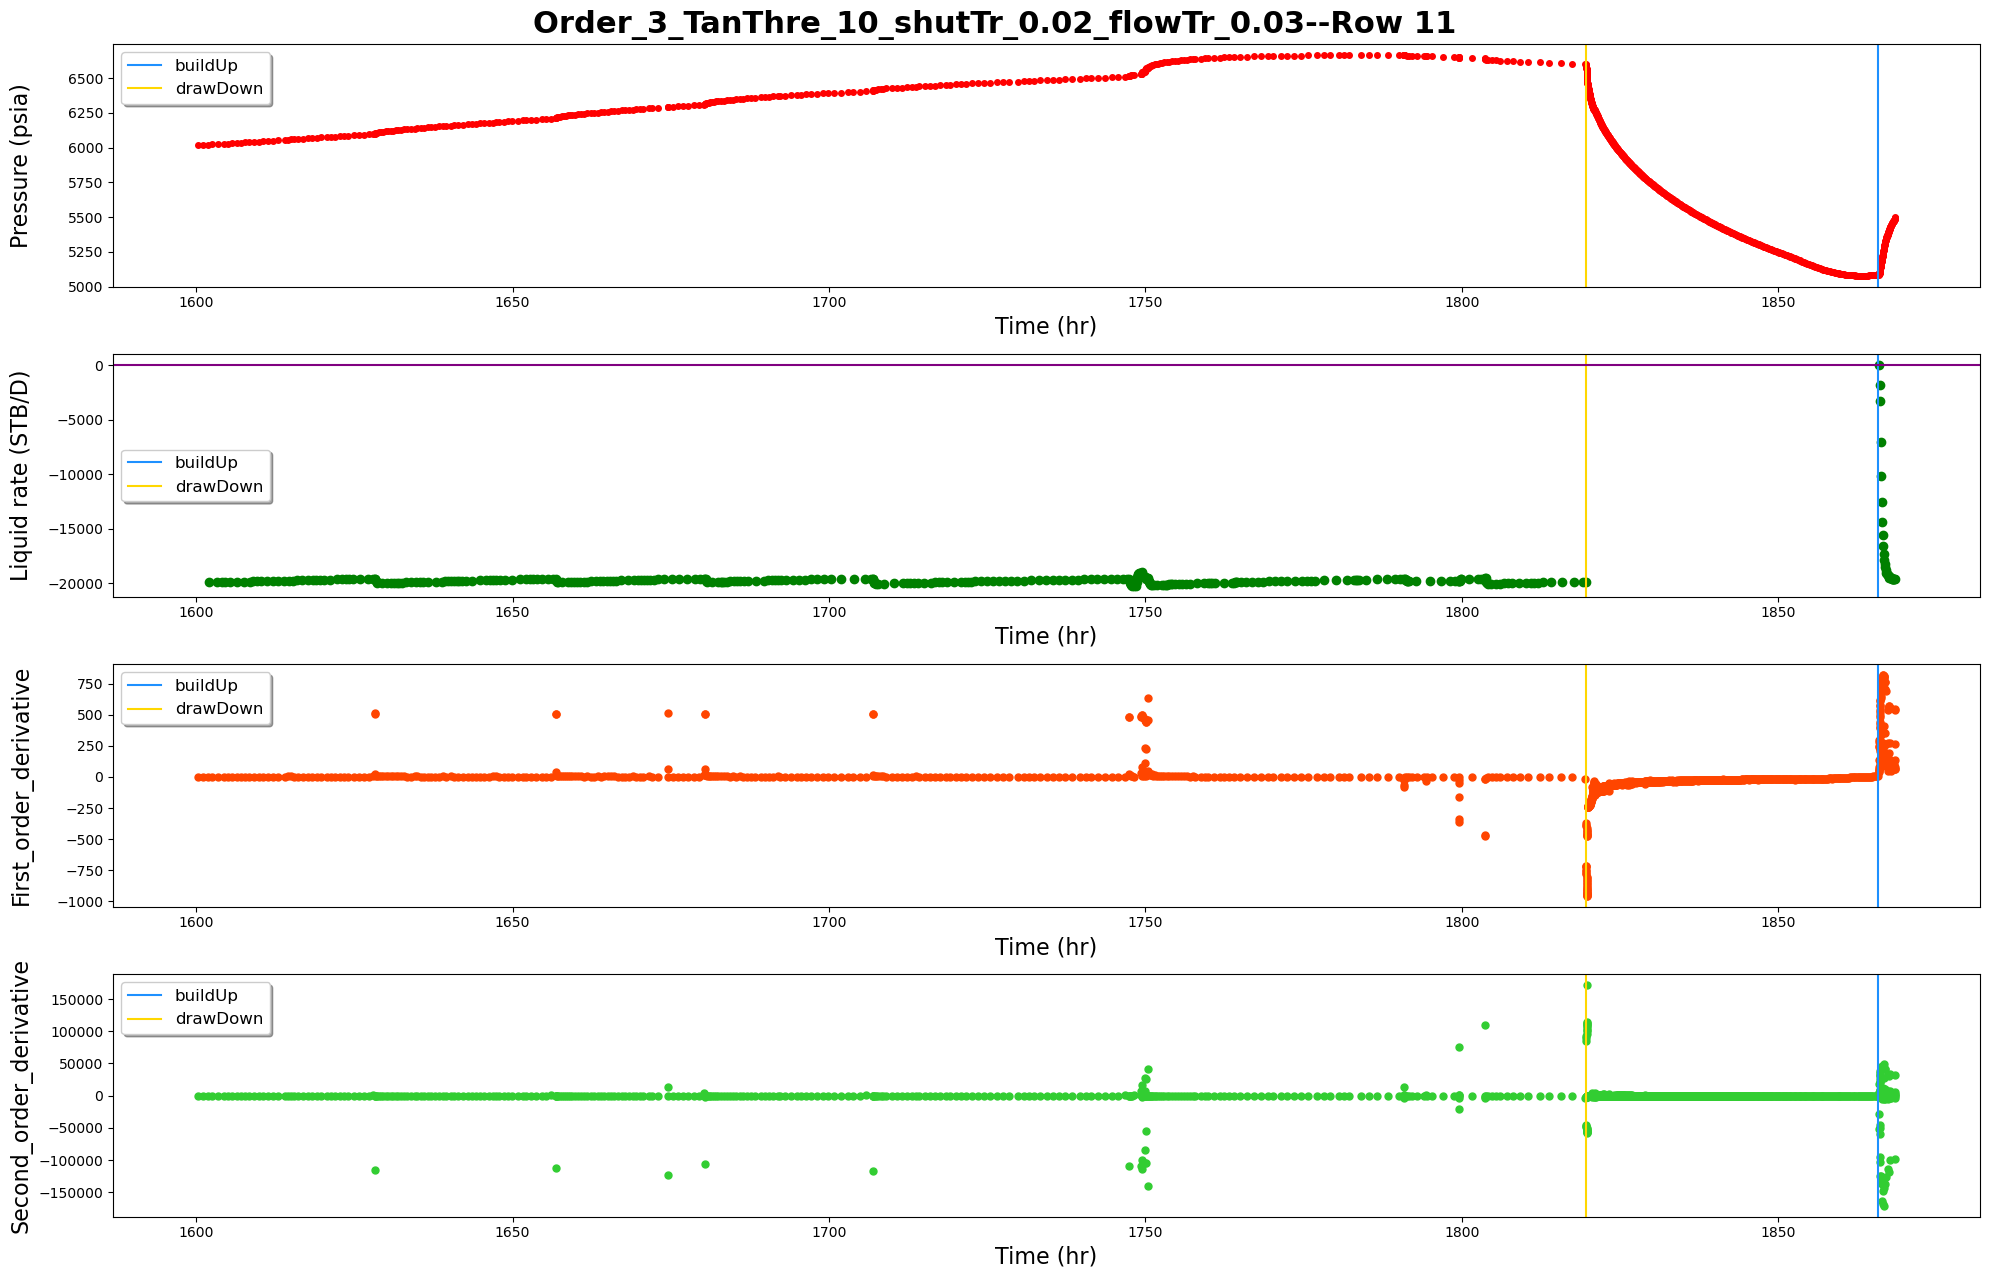

------row 12-----detected points:[13909, 14085]


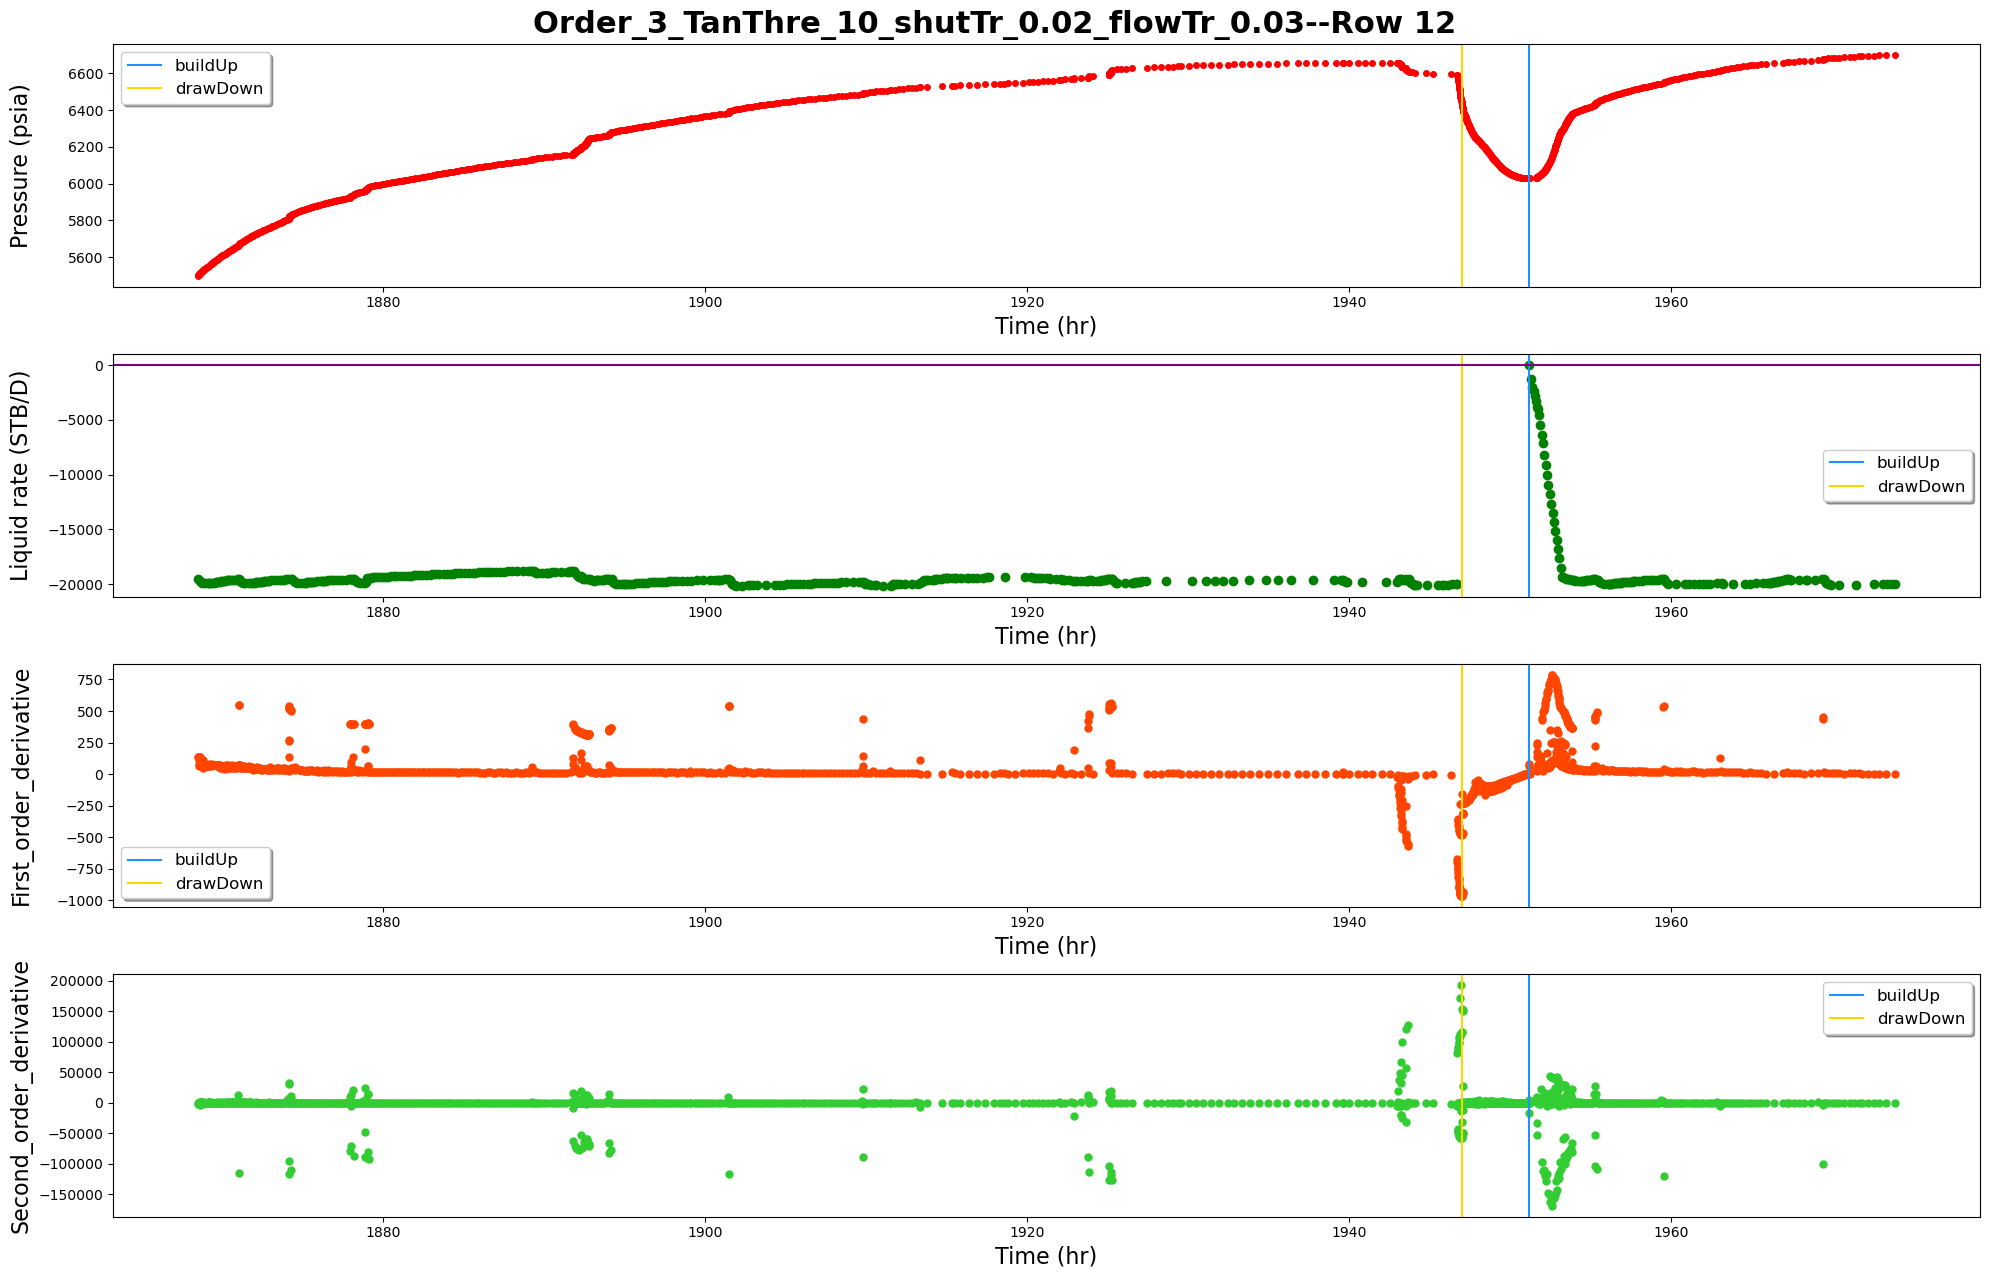

------row 13-----detected points:[14471, 14574, 14774, 15329]


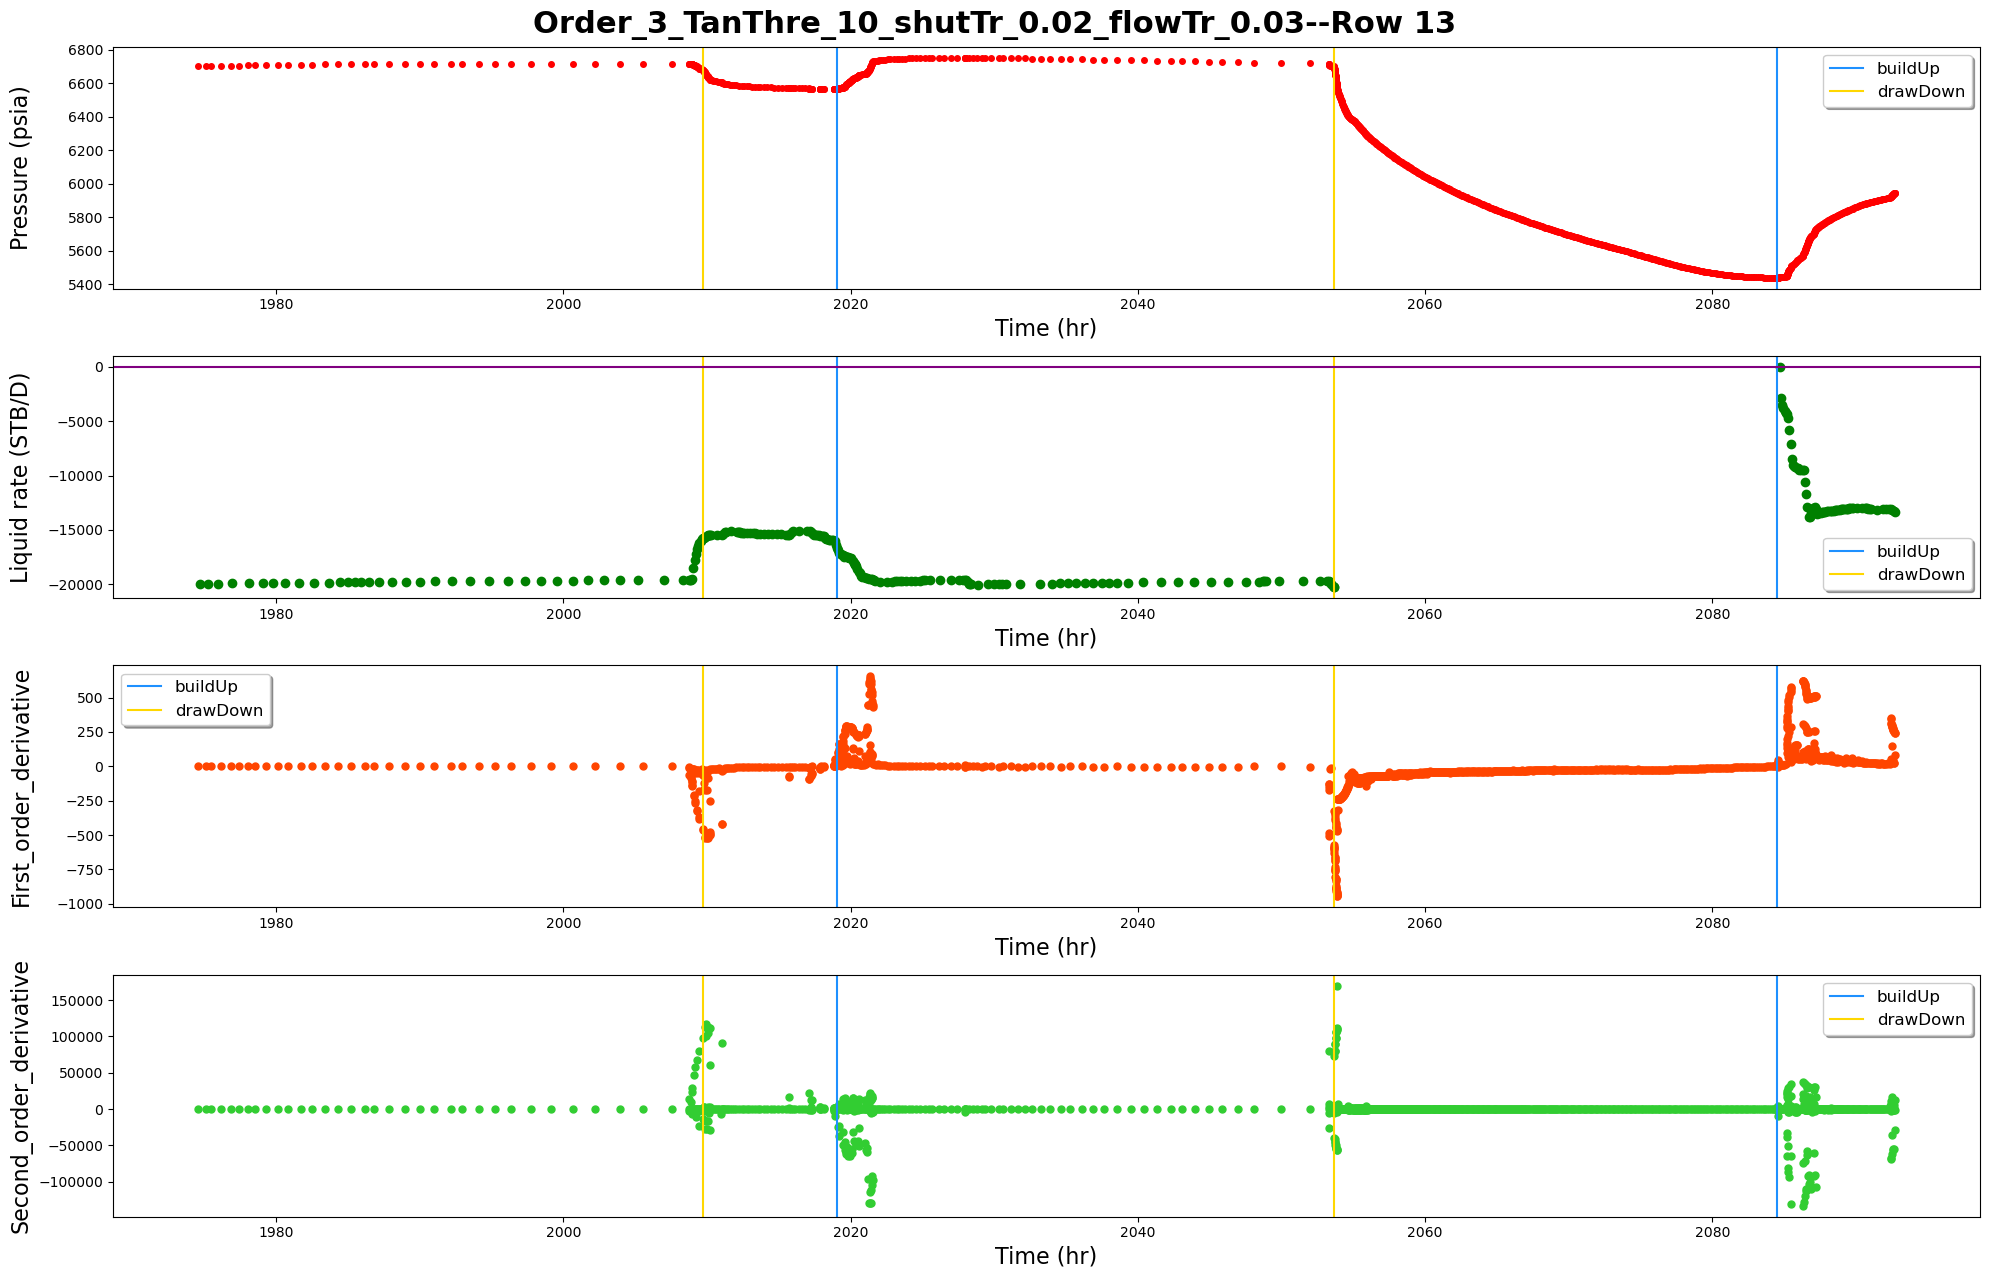

------row 14-----detected points:[16096, 16580]


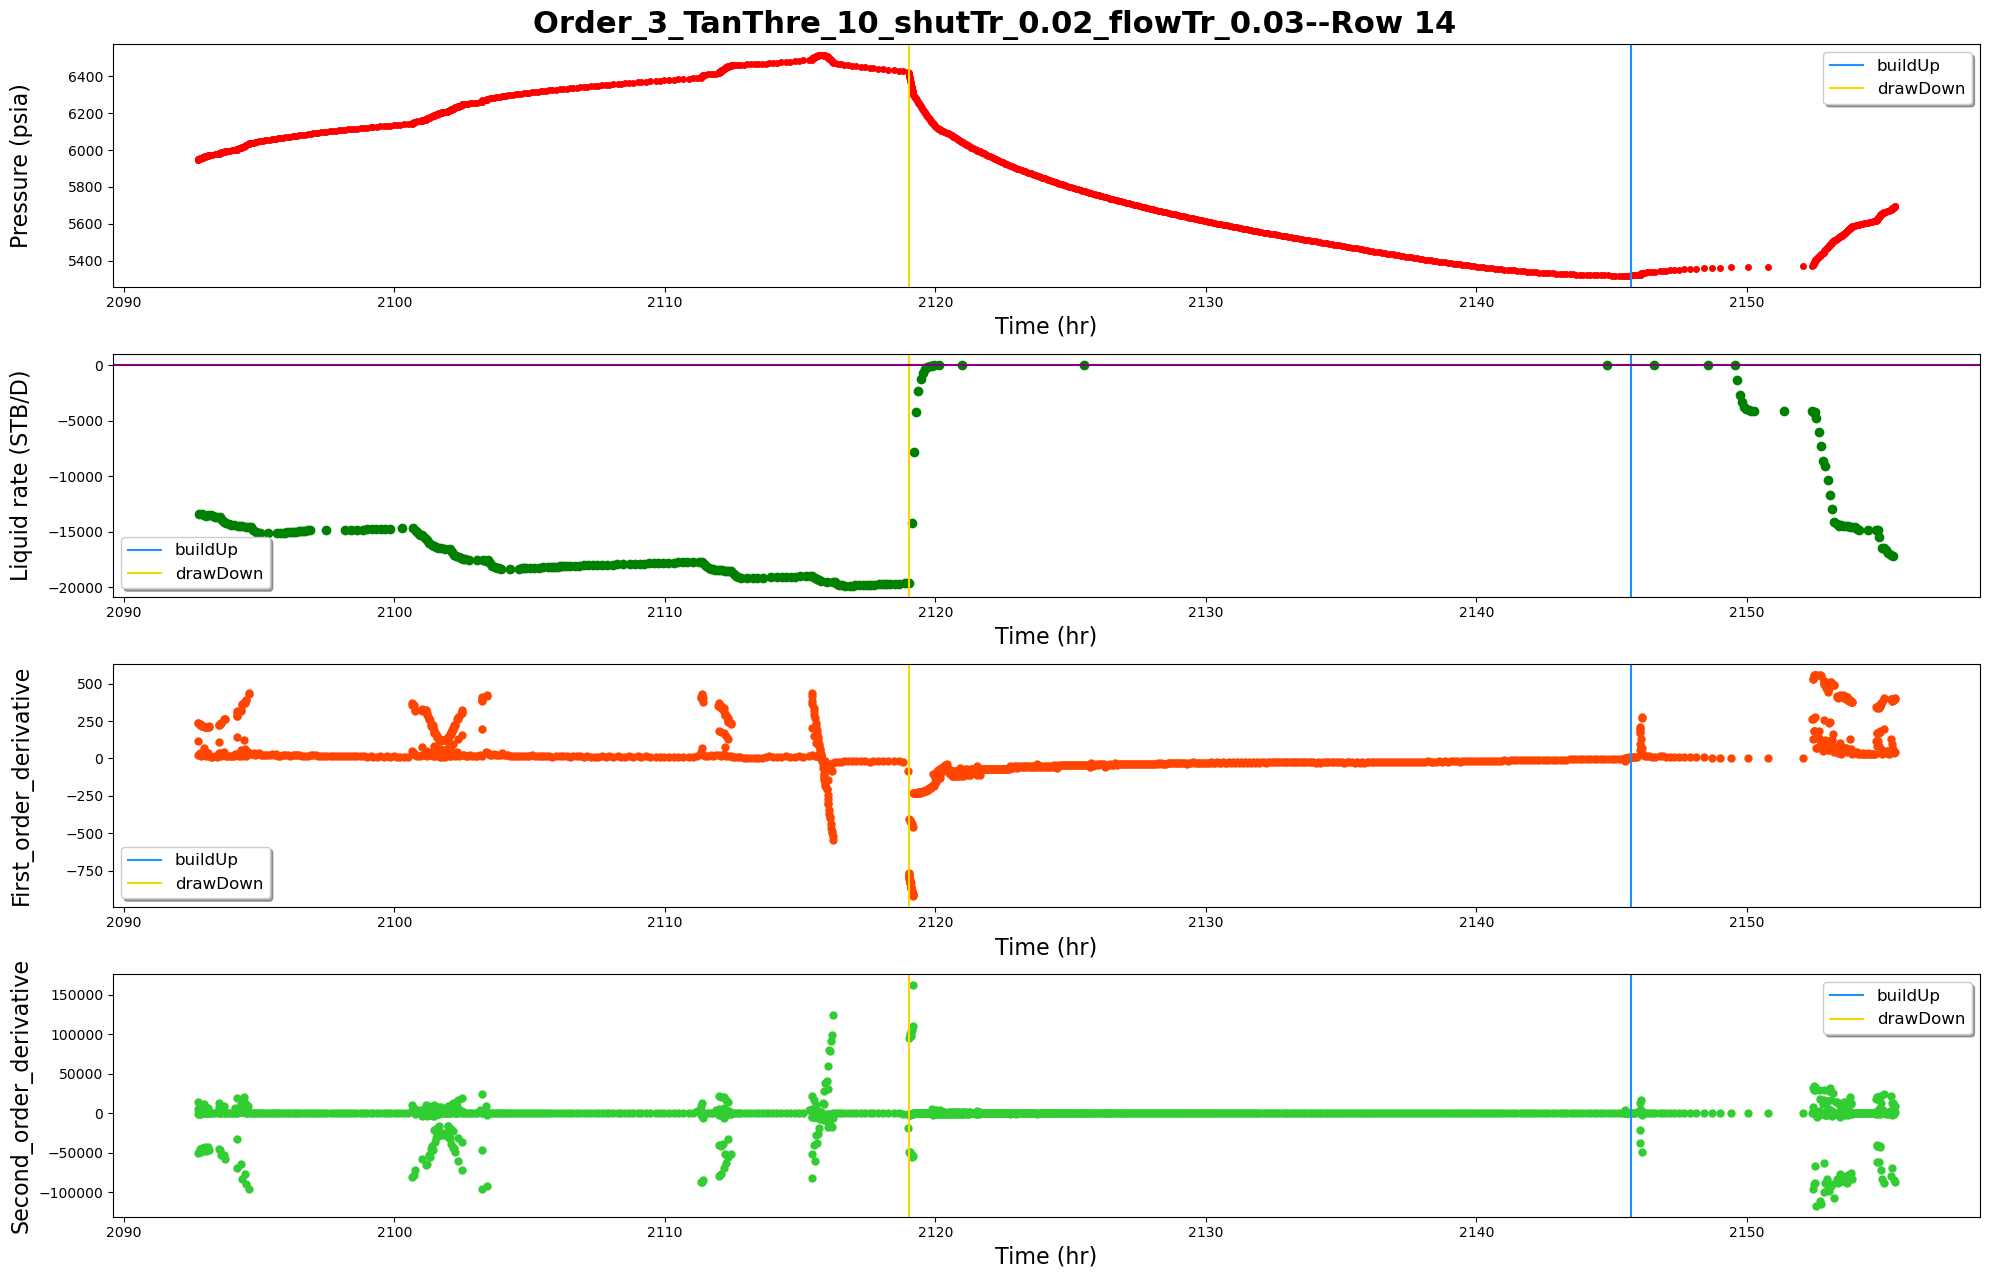

------row 15-----detected points:[17589]


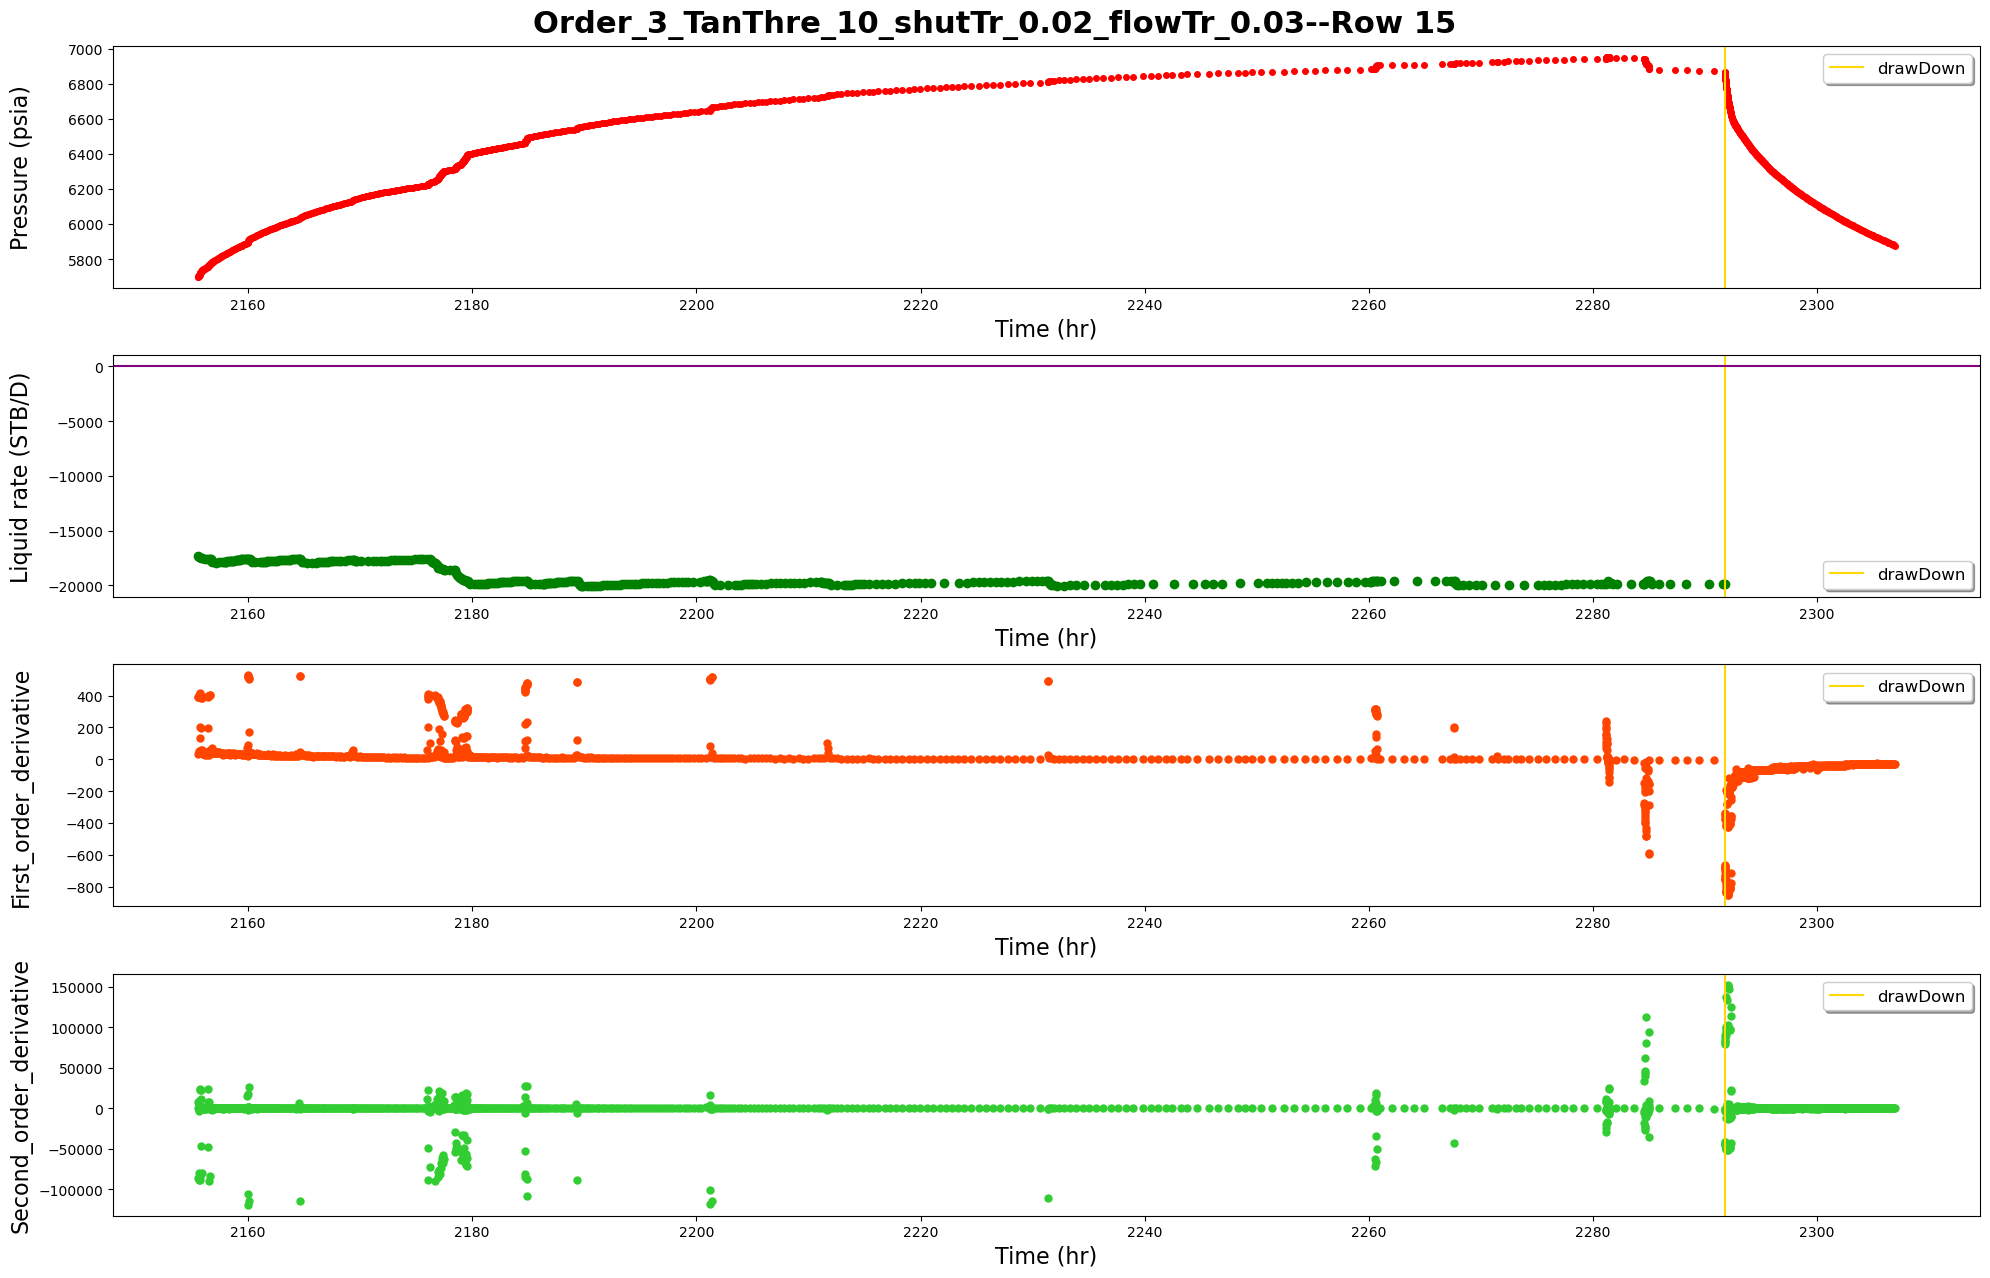

------row 16-----detected points:[18433]


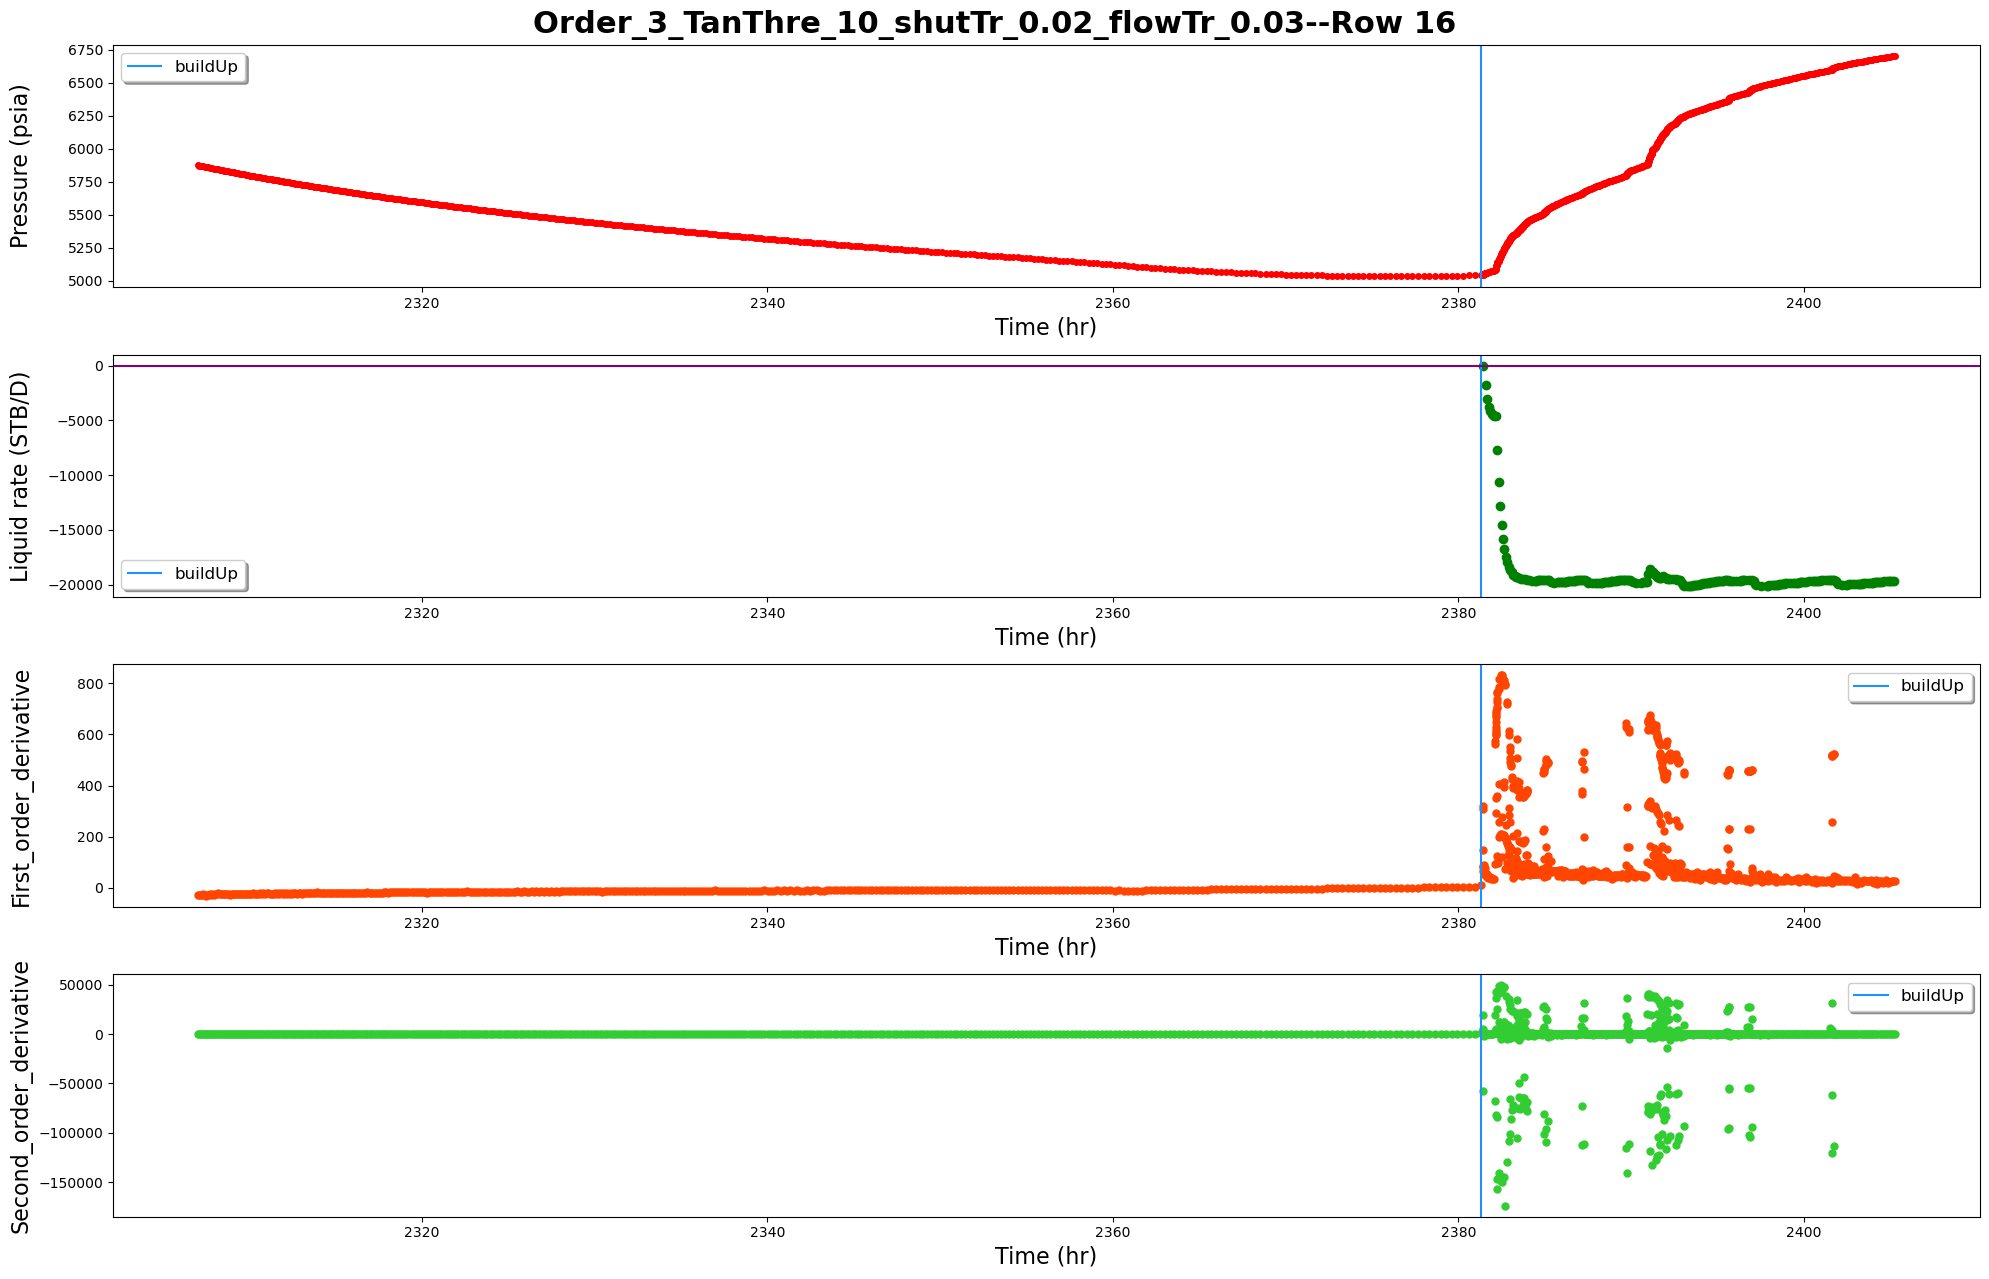

------row 17-----detected points:[19355, 19428, 19642, 19761, 20077, 20330]


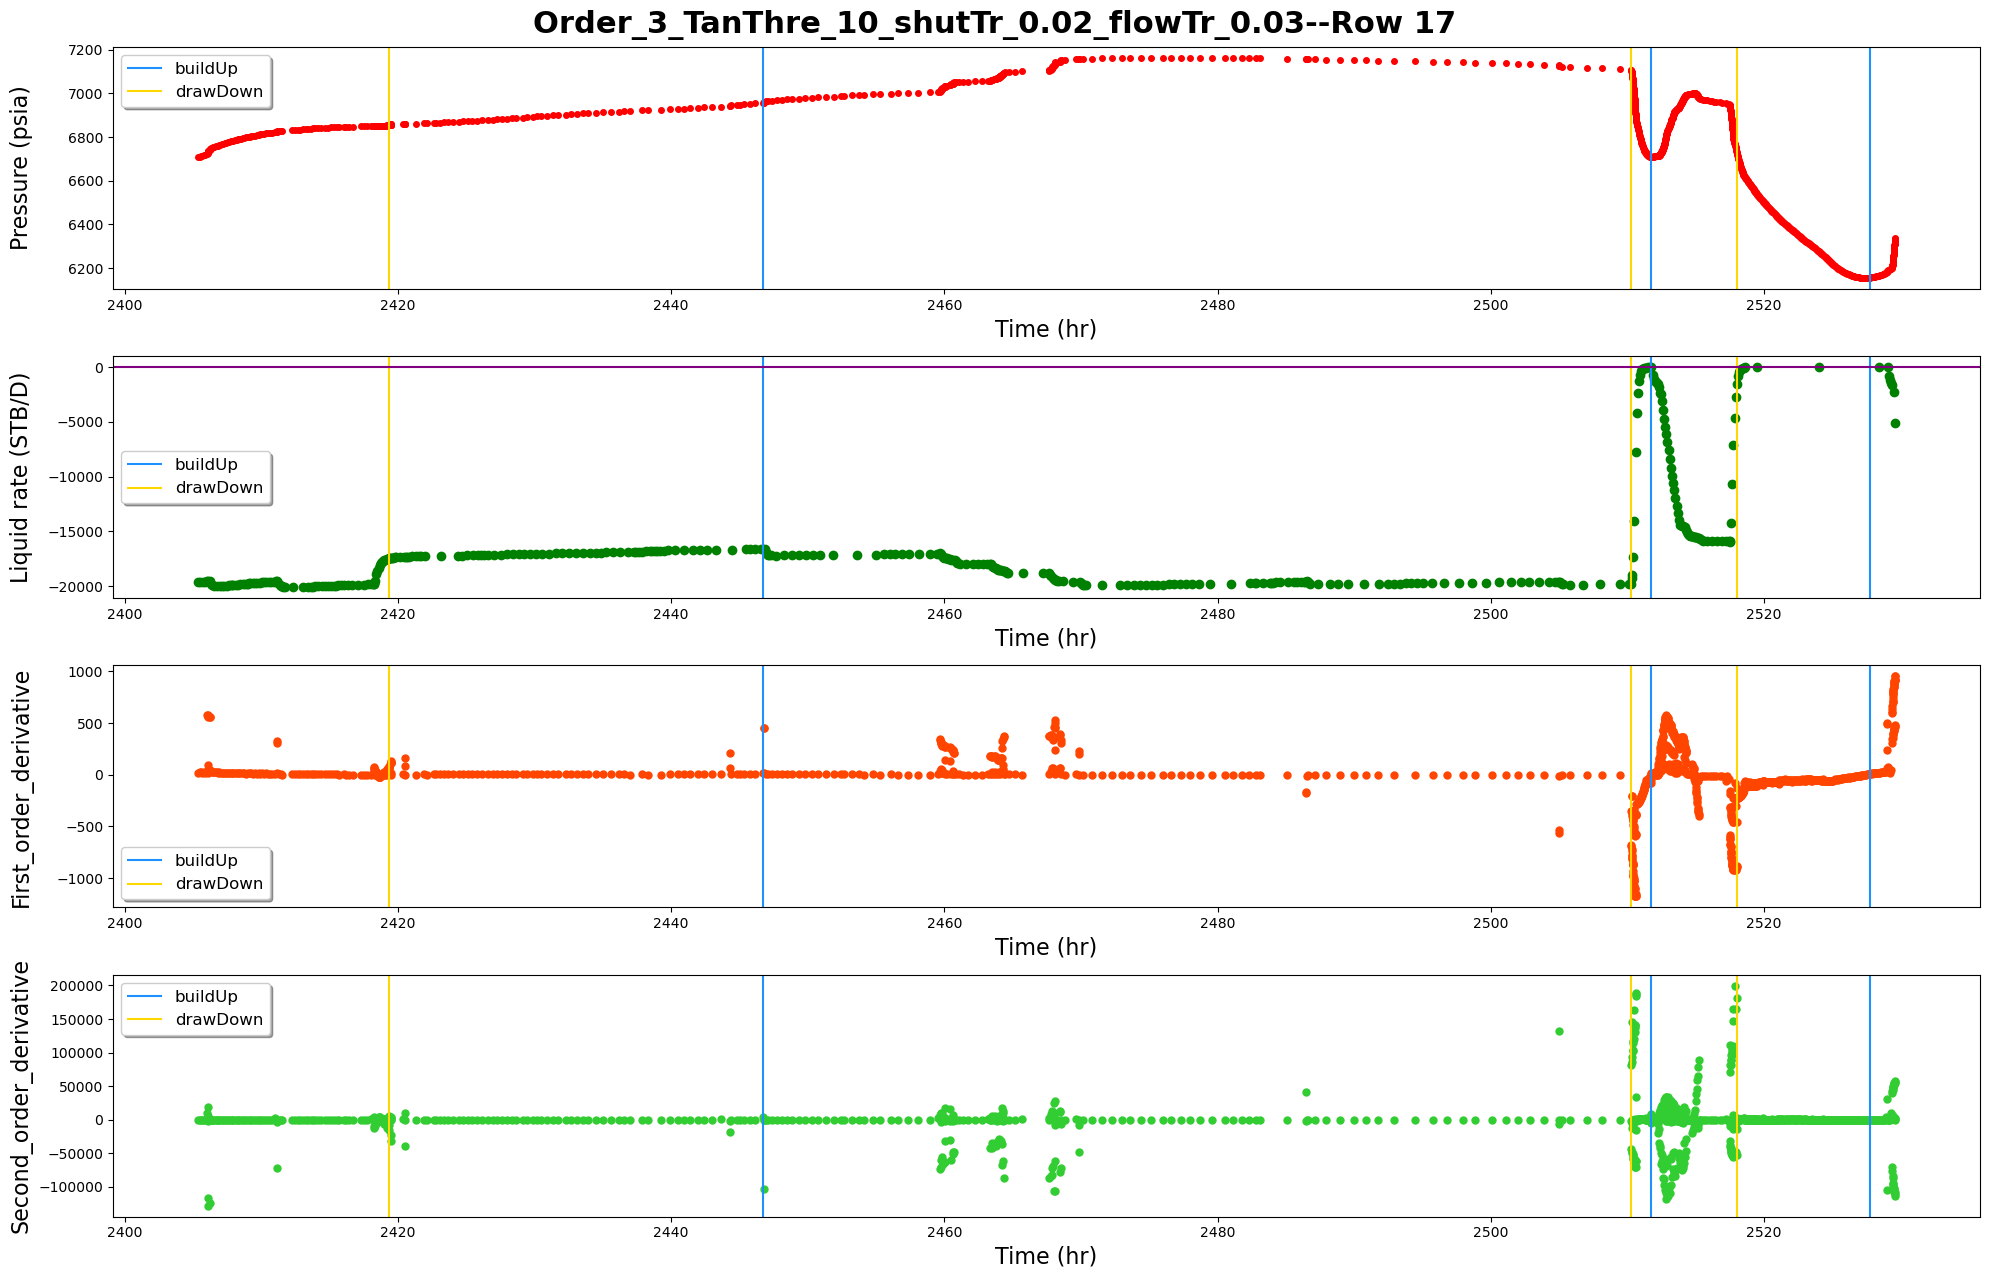

------row 18-----detected points:[20700, 21026]


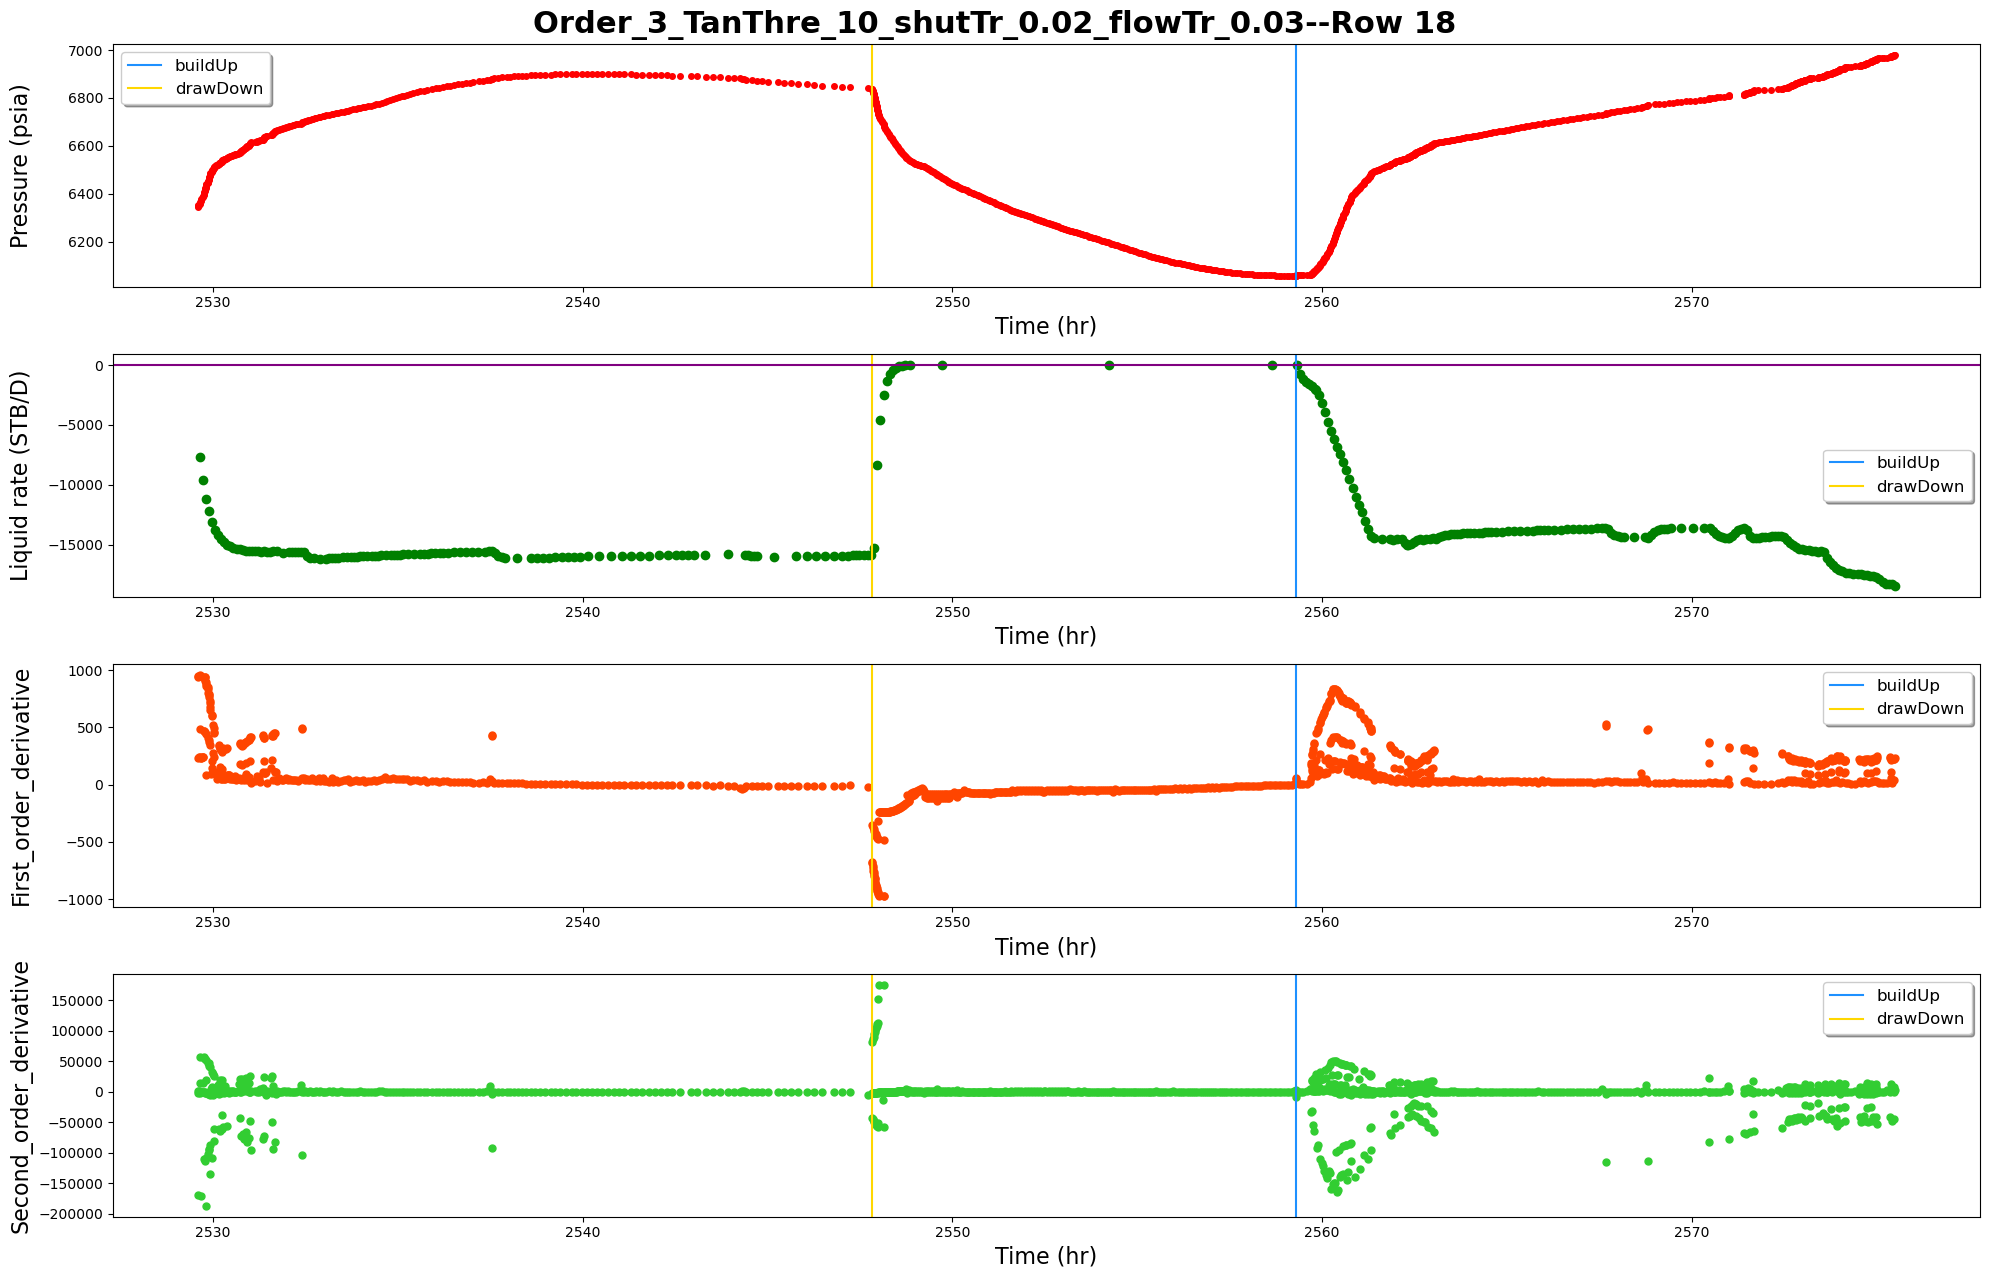

------row 19-----detected points:[21974, 22181, 22709]


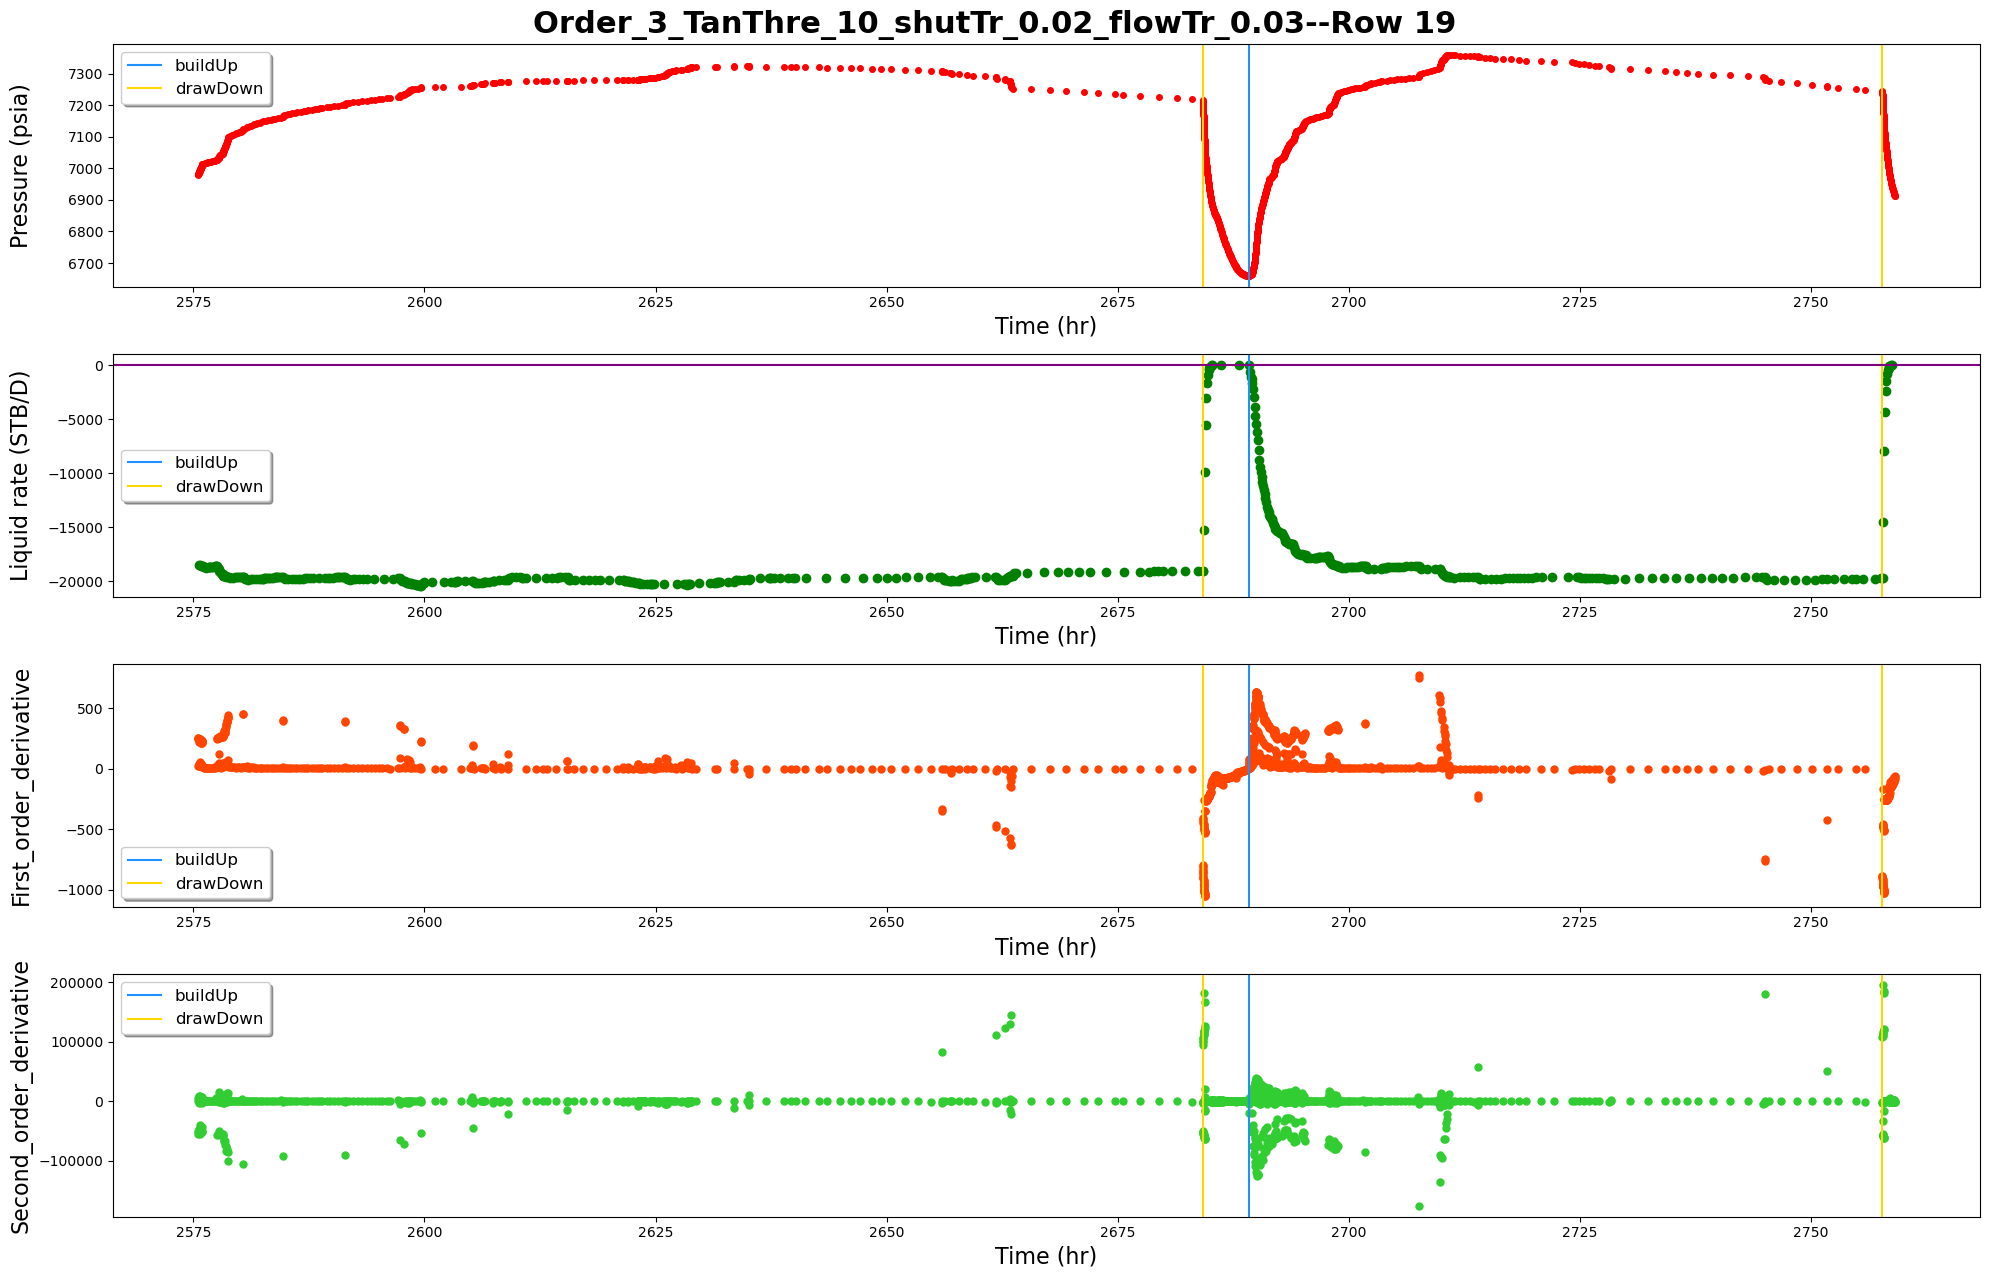

------row 20-----detected points:[23219]


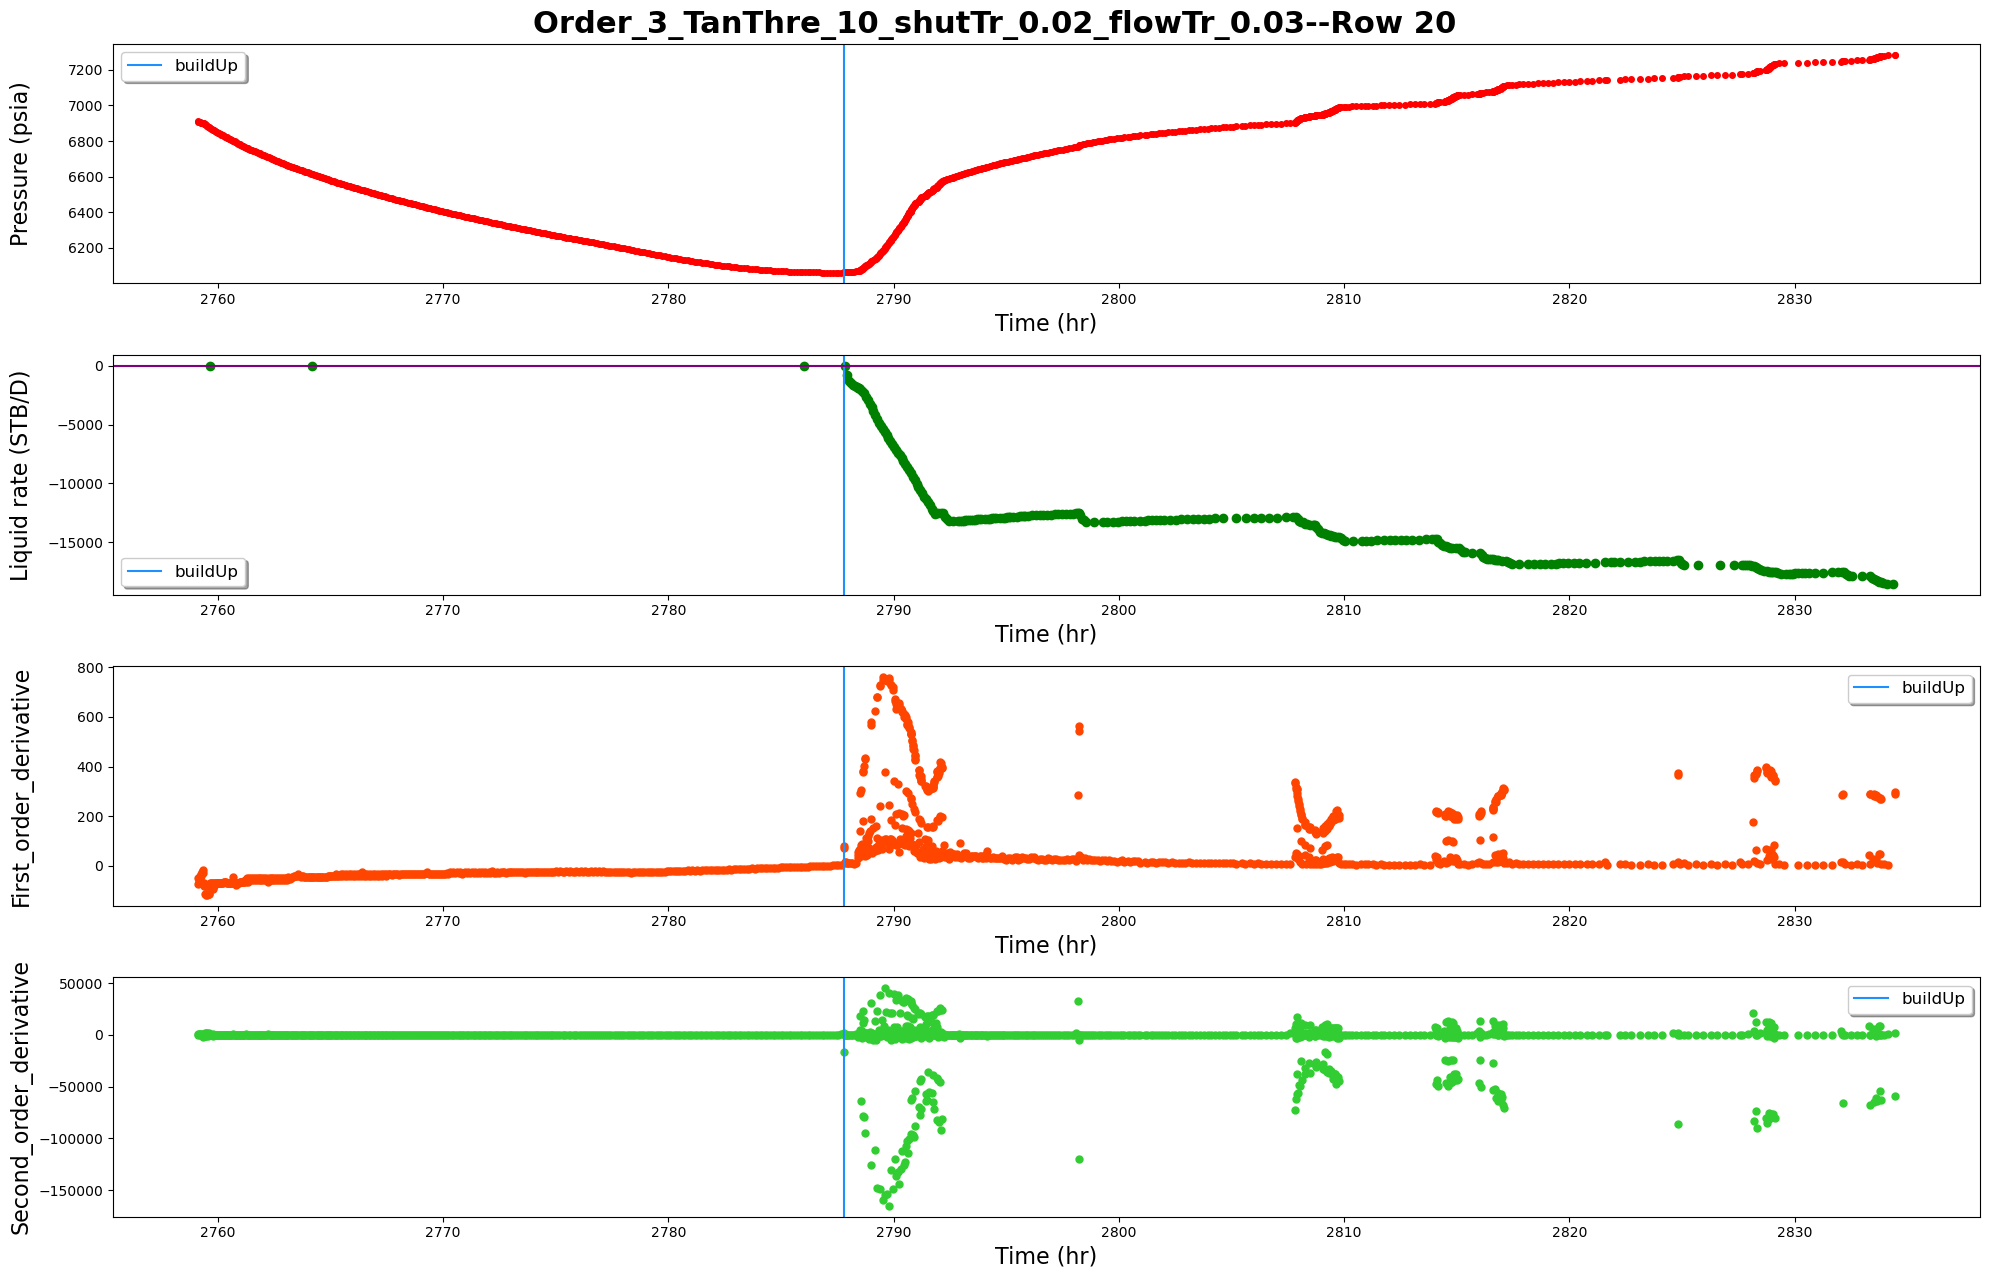

------row 21-----detected points:[24215, 24679]


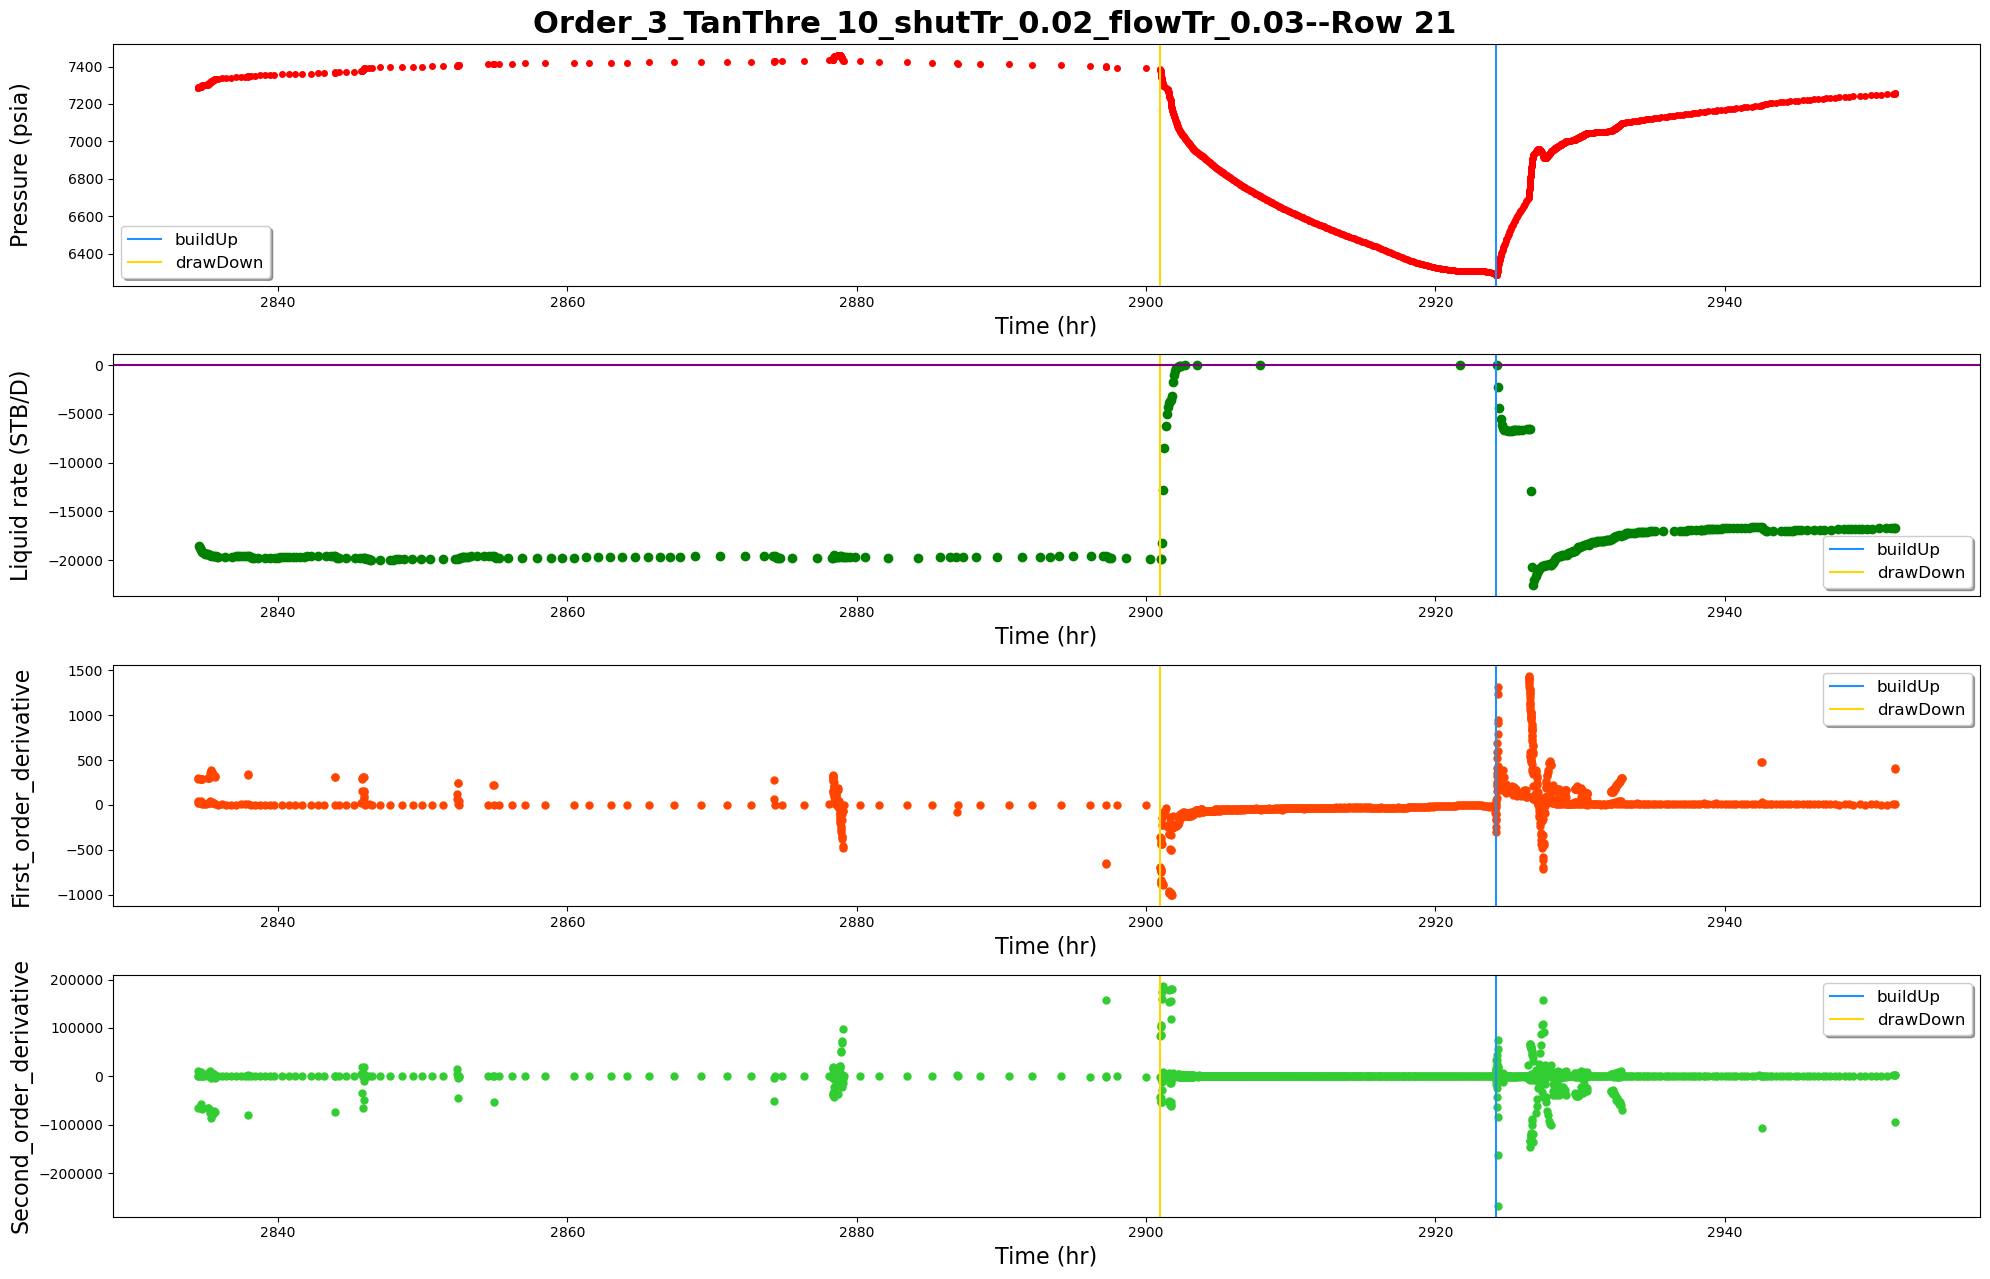

------row 22-----detected points:[25750, 25996]


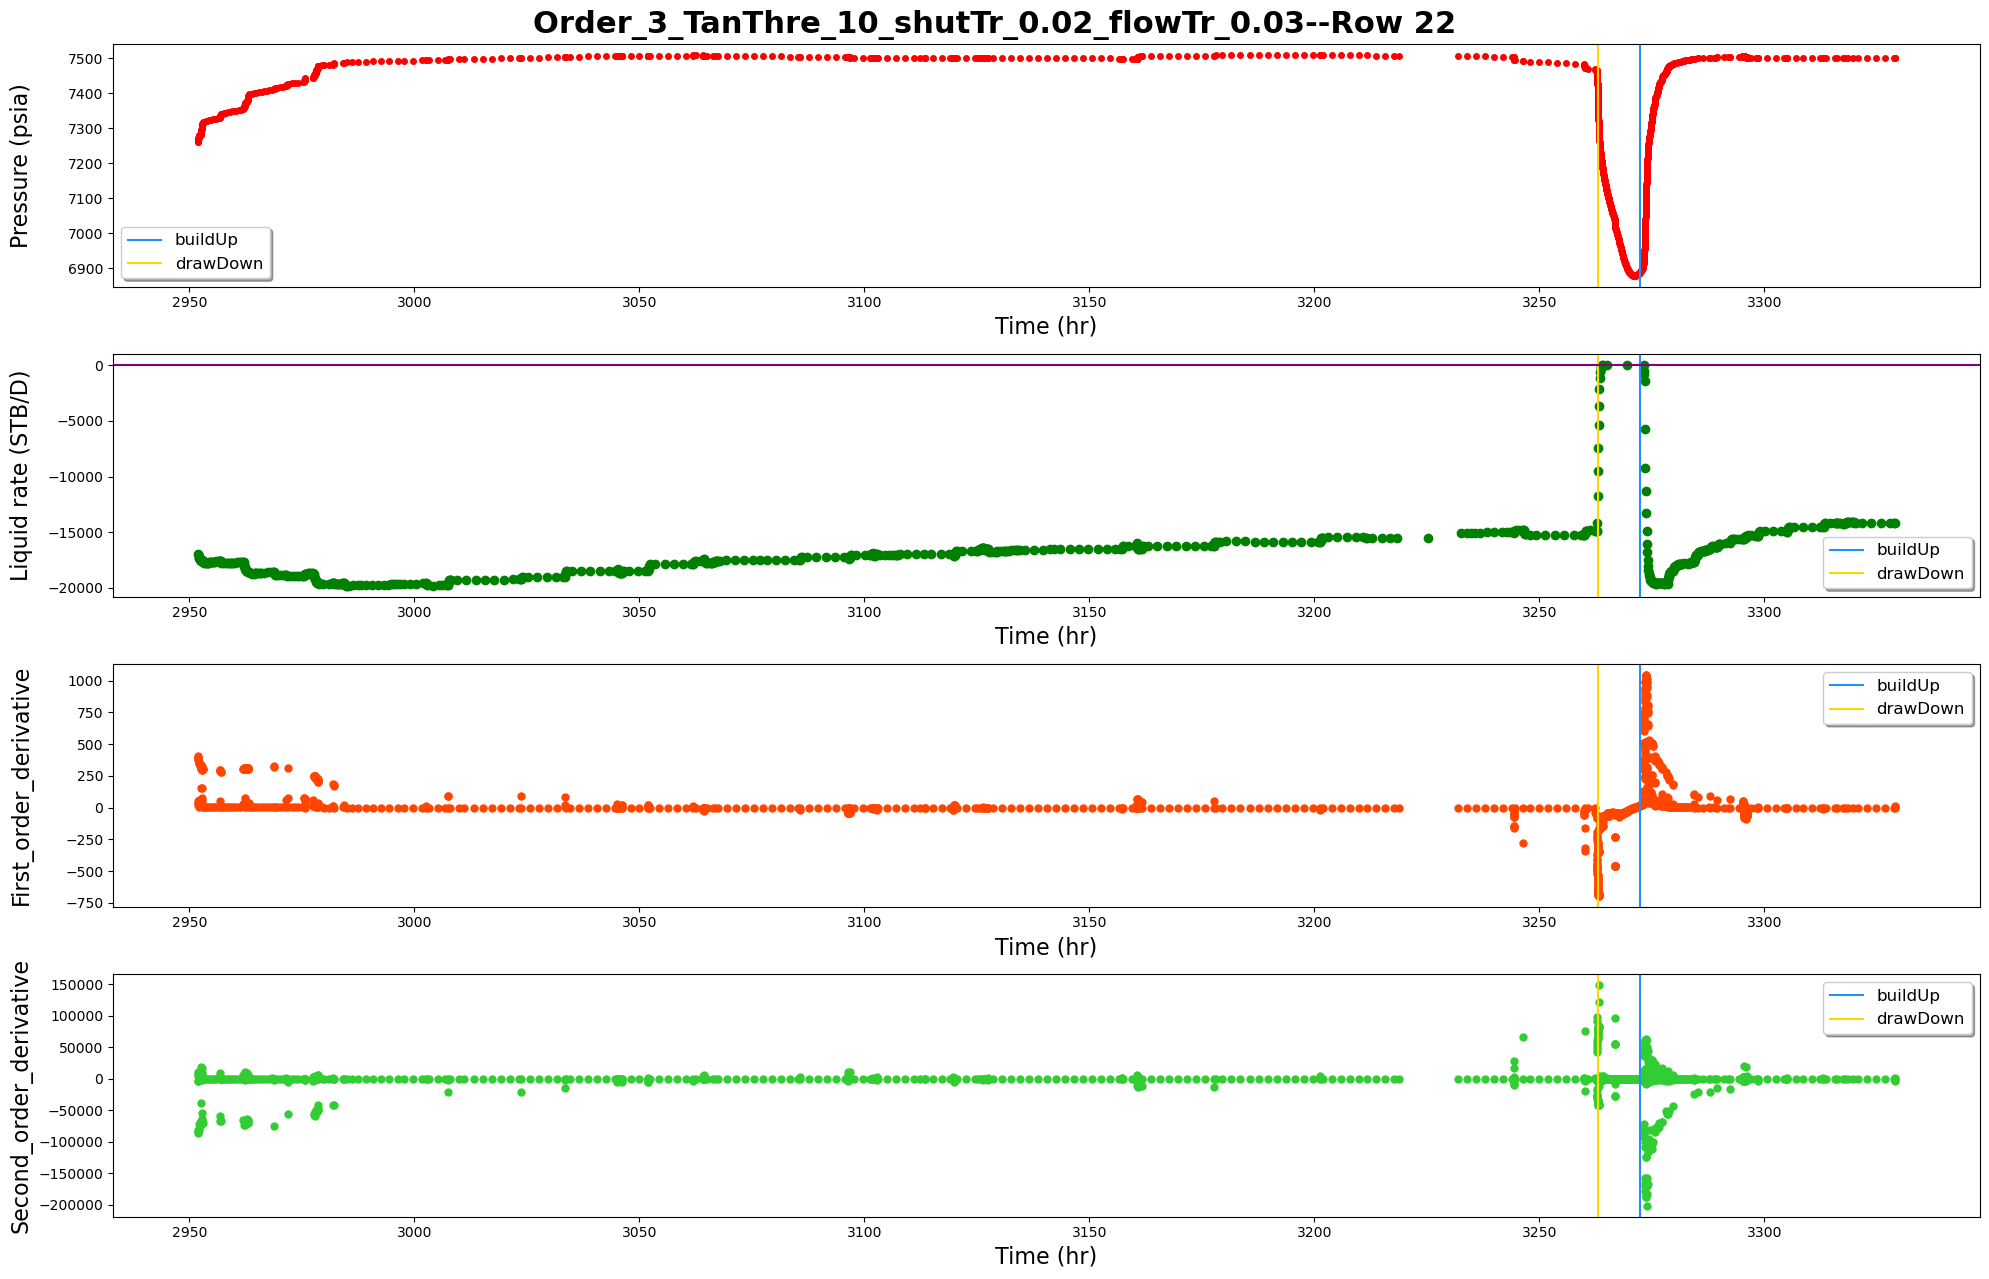

------row 23-----detected points:[26711, 26755, 27025, 27315]


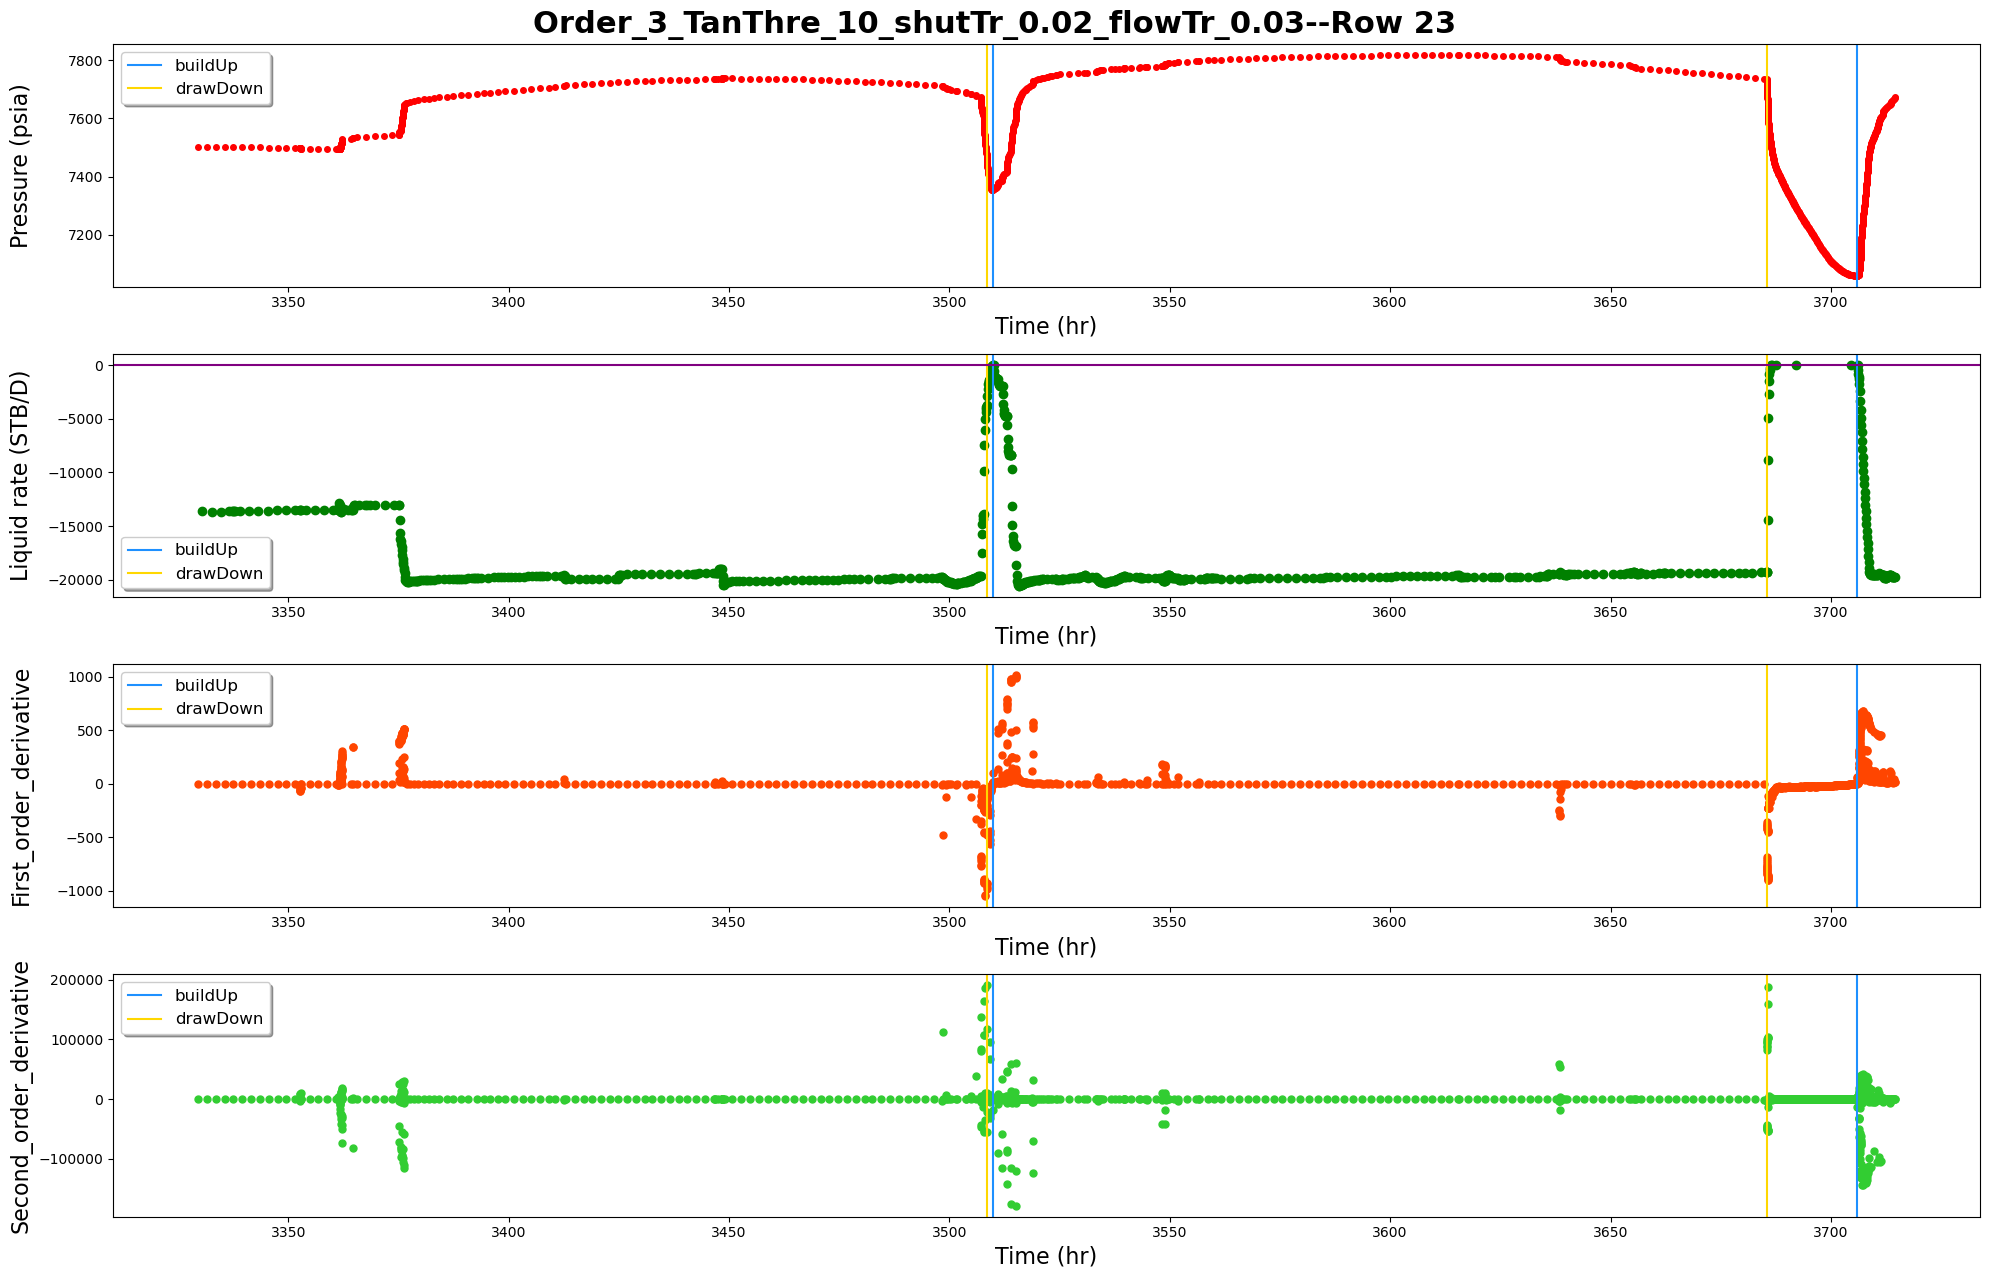

------row 24-----detected points:[27781, 27962, 28290, 28488]


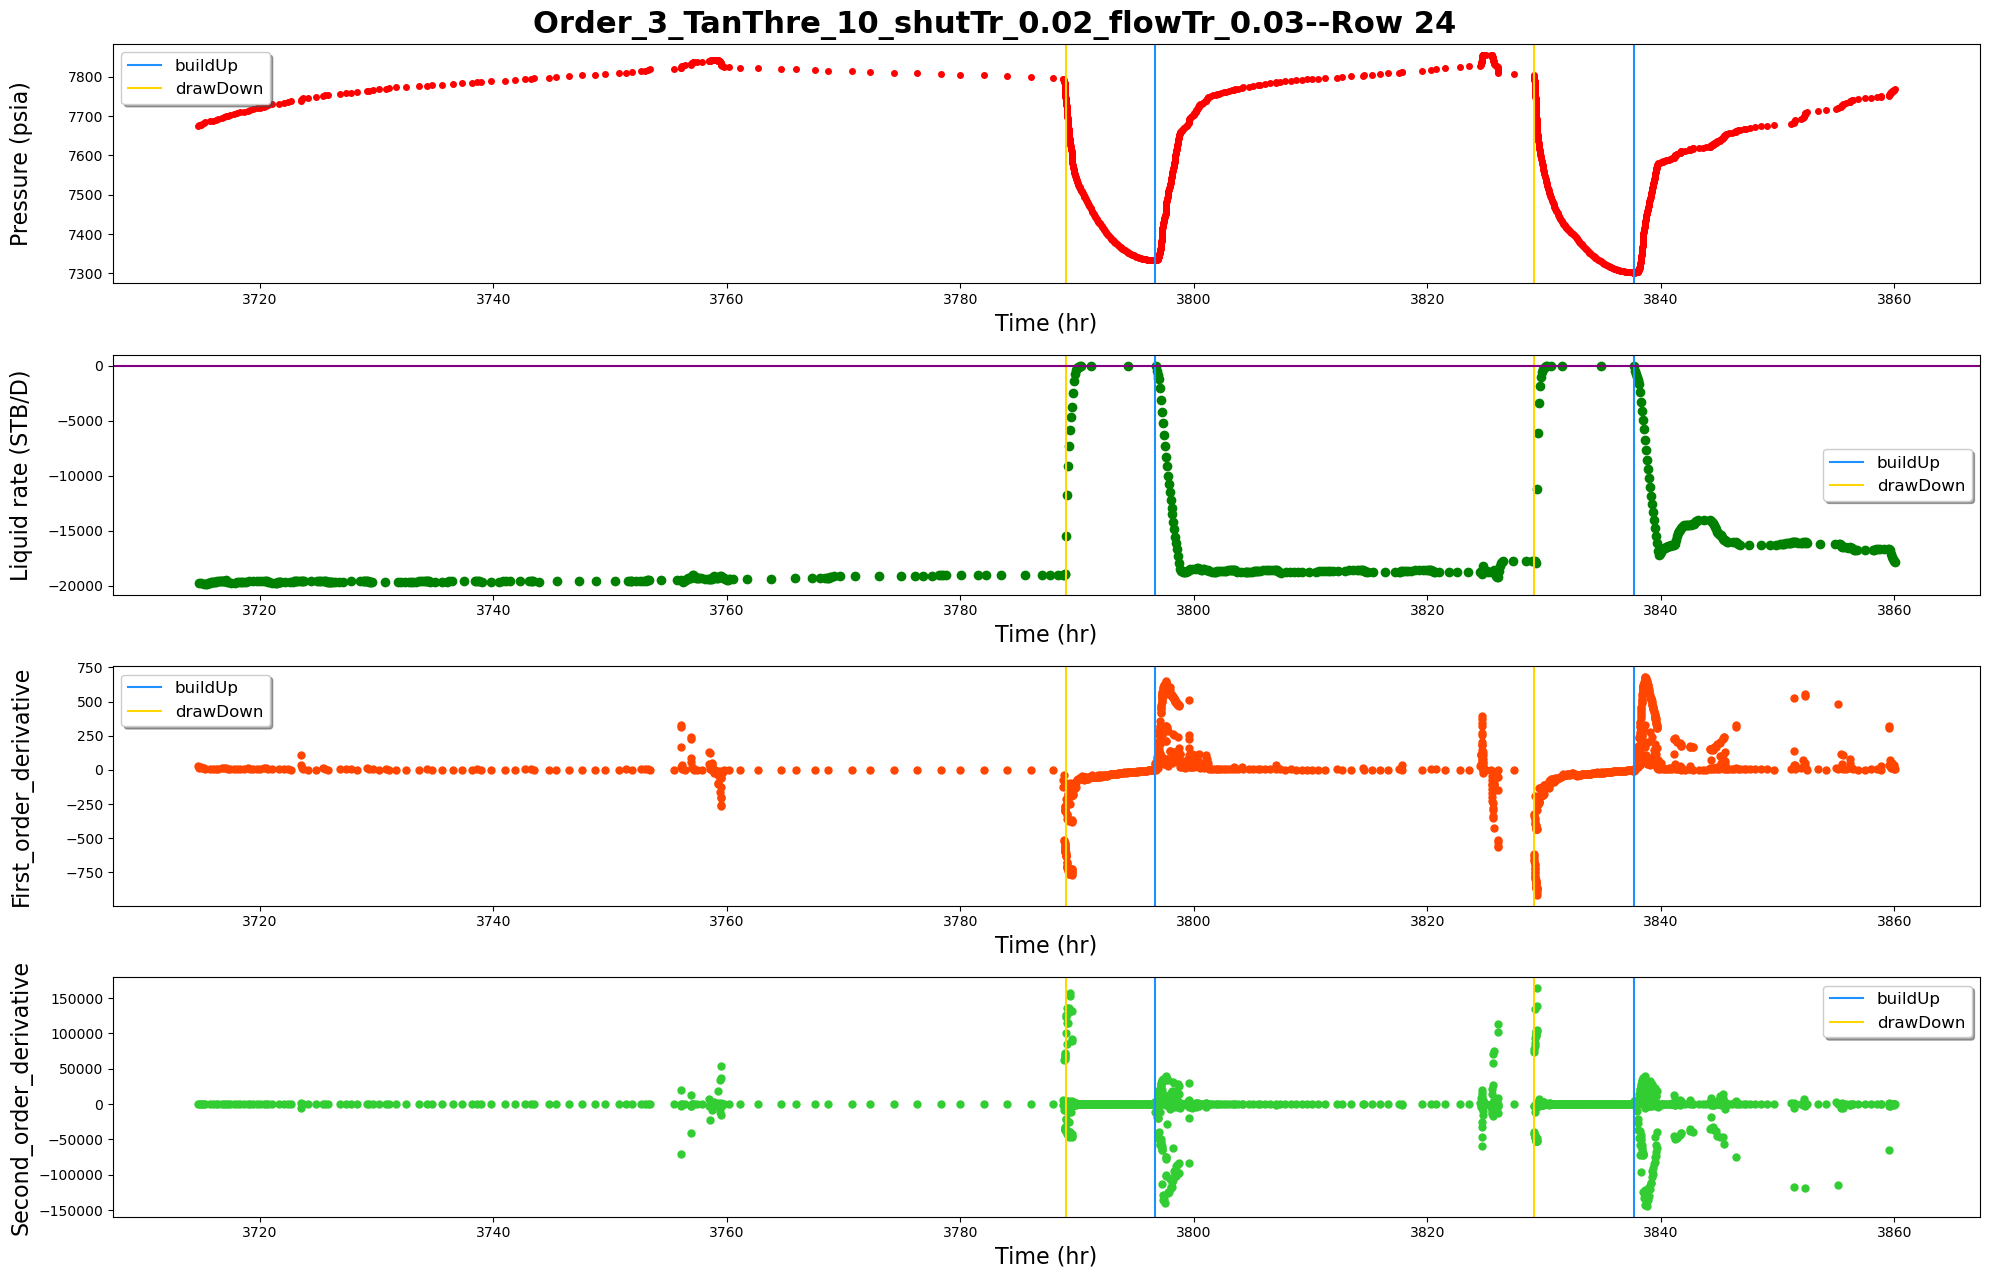

------row 25-----detected points:[28840, 29108]


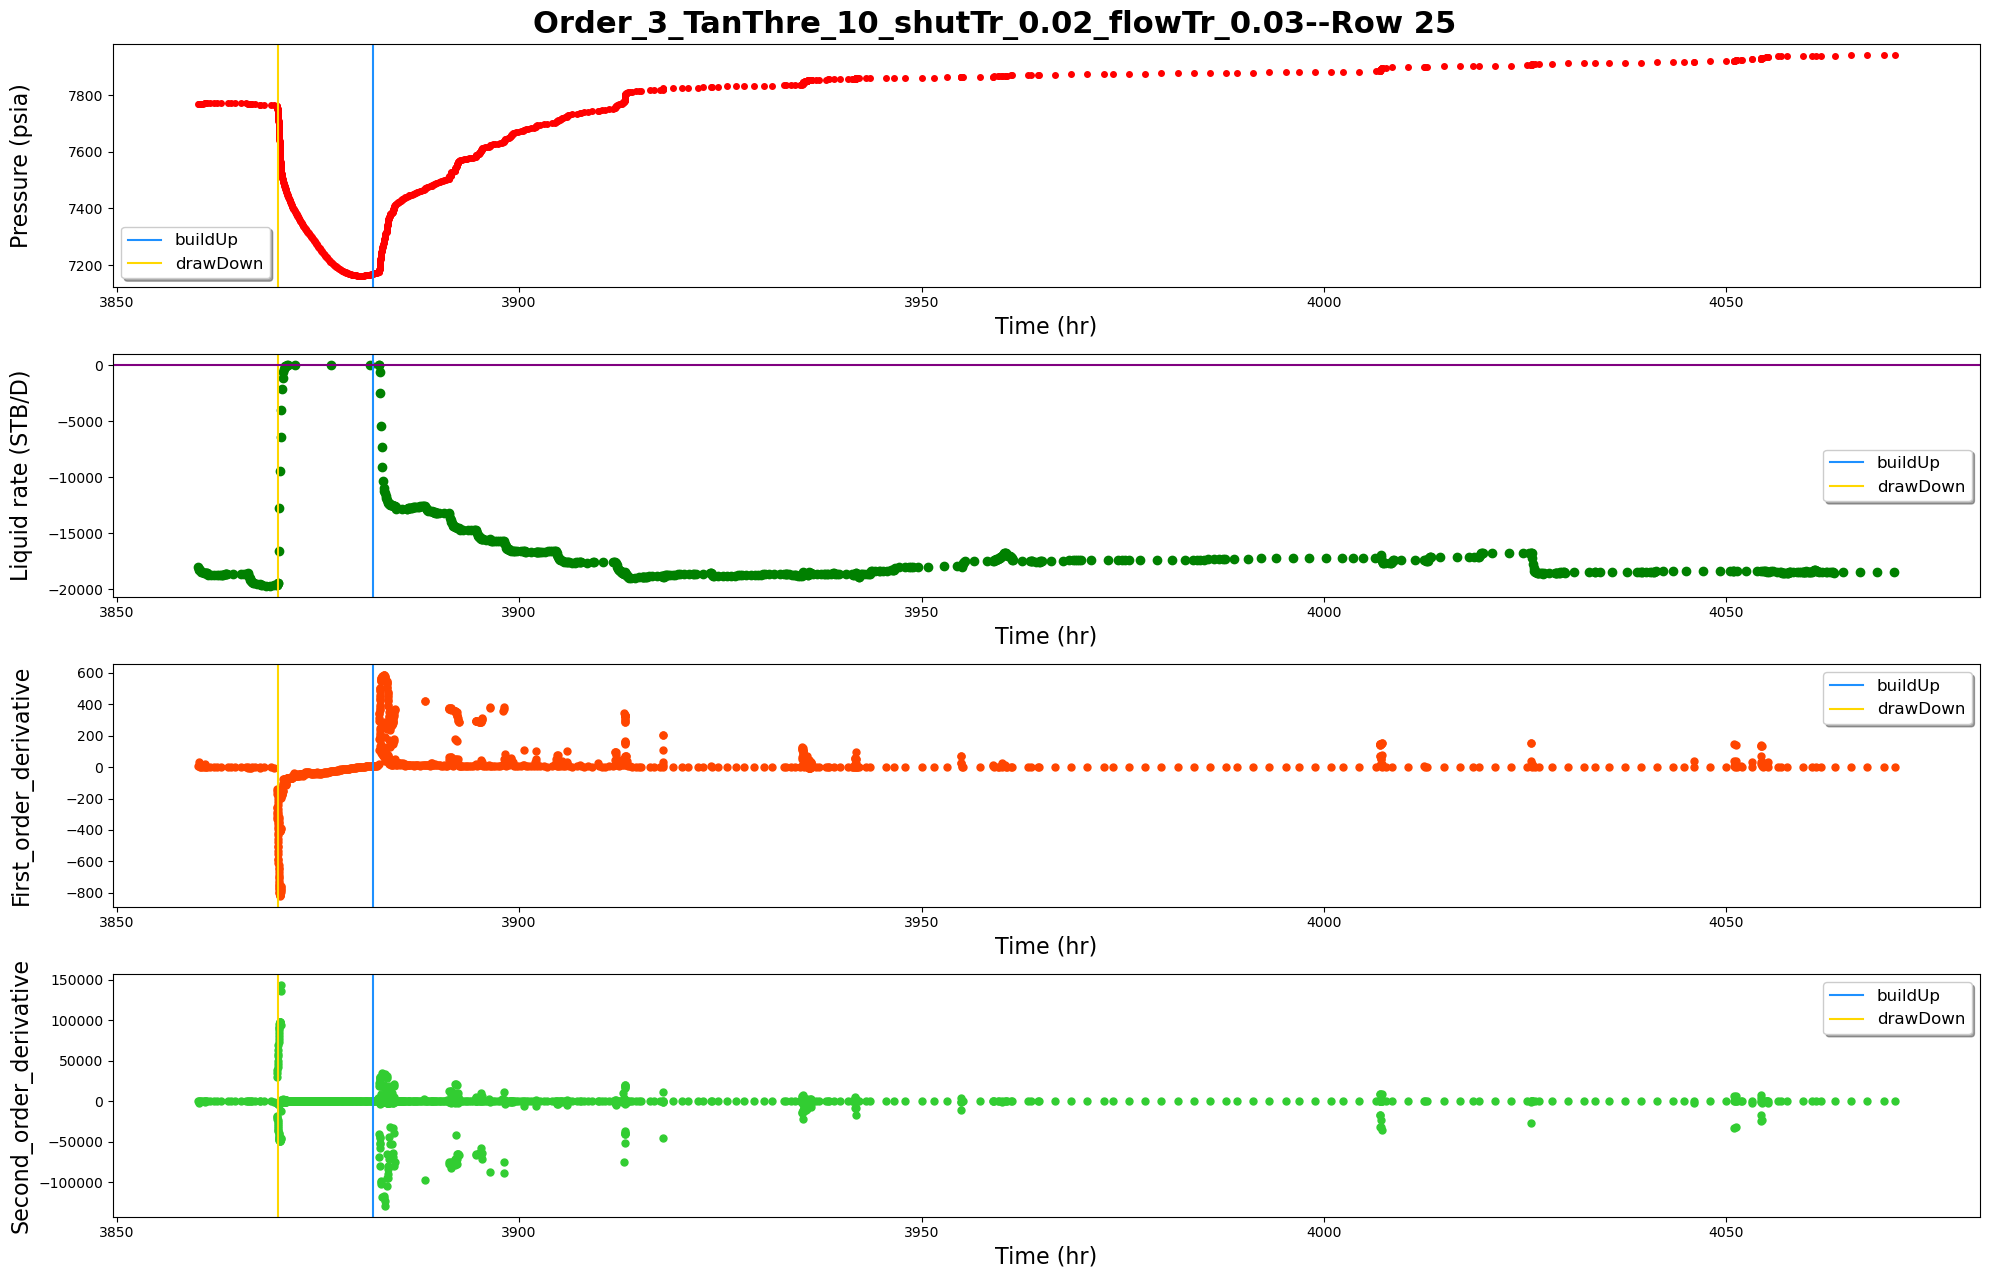

In [37]:
# points_type="allPoints"
points_type="majorTransients"
# parameters={}
parameters={"Order":polynomial_order,
            "TanThre":deltaTangent_criterion,
            "shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
detect_points_dict={"buildUp":transients.major_buildUp,
                   "drawDown":transients.major_drawDown}

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=True
folder_name=f"{method}/{points_type}/pointHalfWin_{point_halfWindow}_timeStep_{time_step}"
# folder_name="removed_transients"
%run plot_N_save.ipynb

# plot periods & multi rate break points

'buildup:170, drawdown:32'
---initializing...
---plotting...


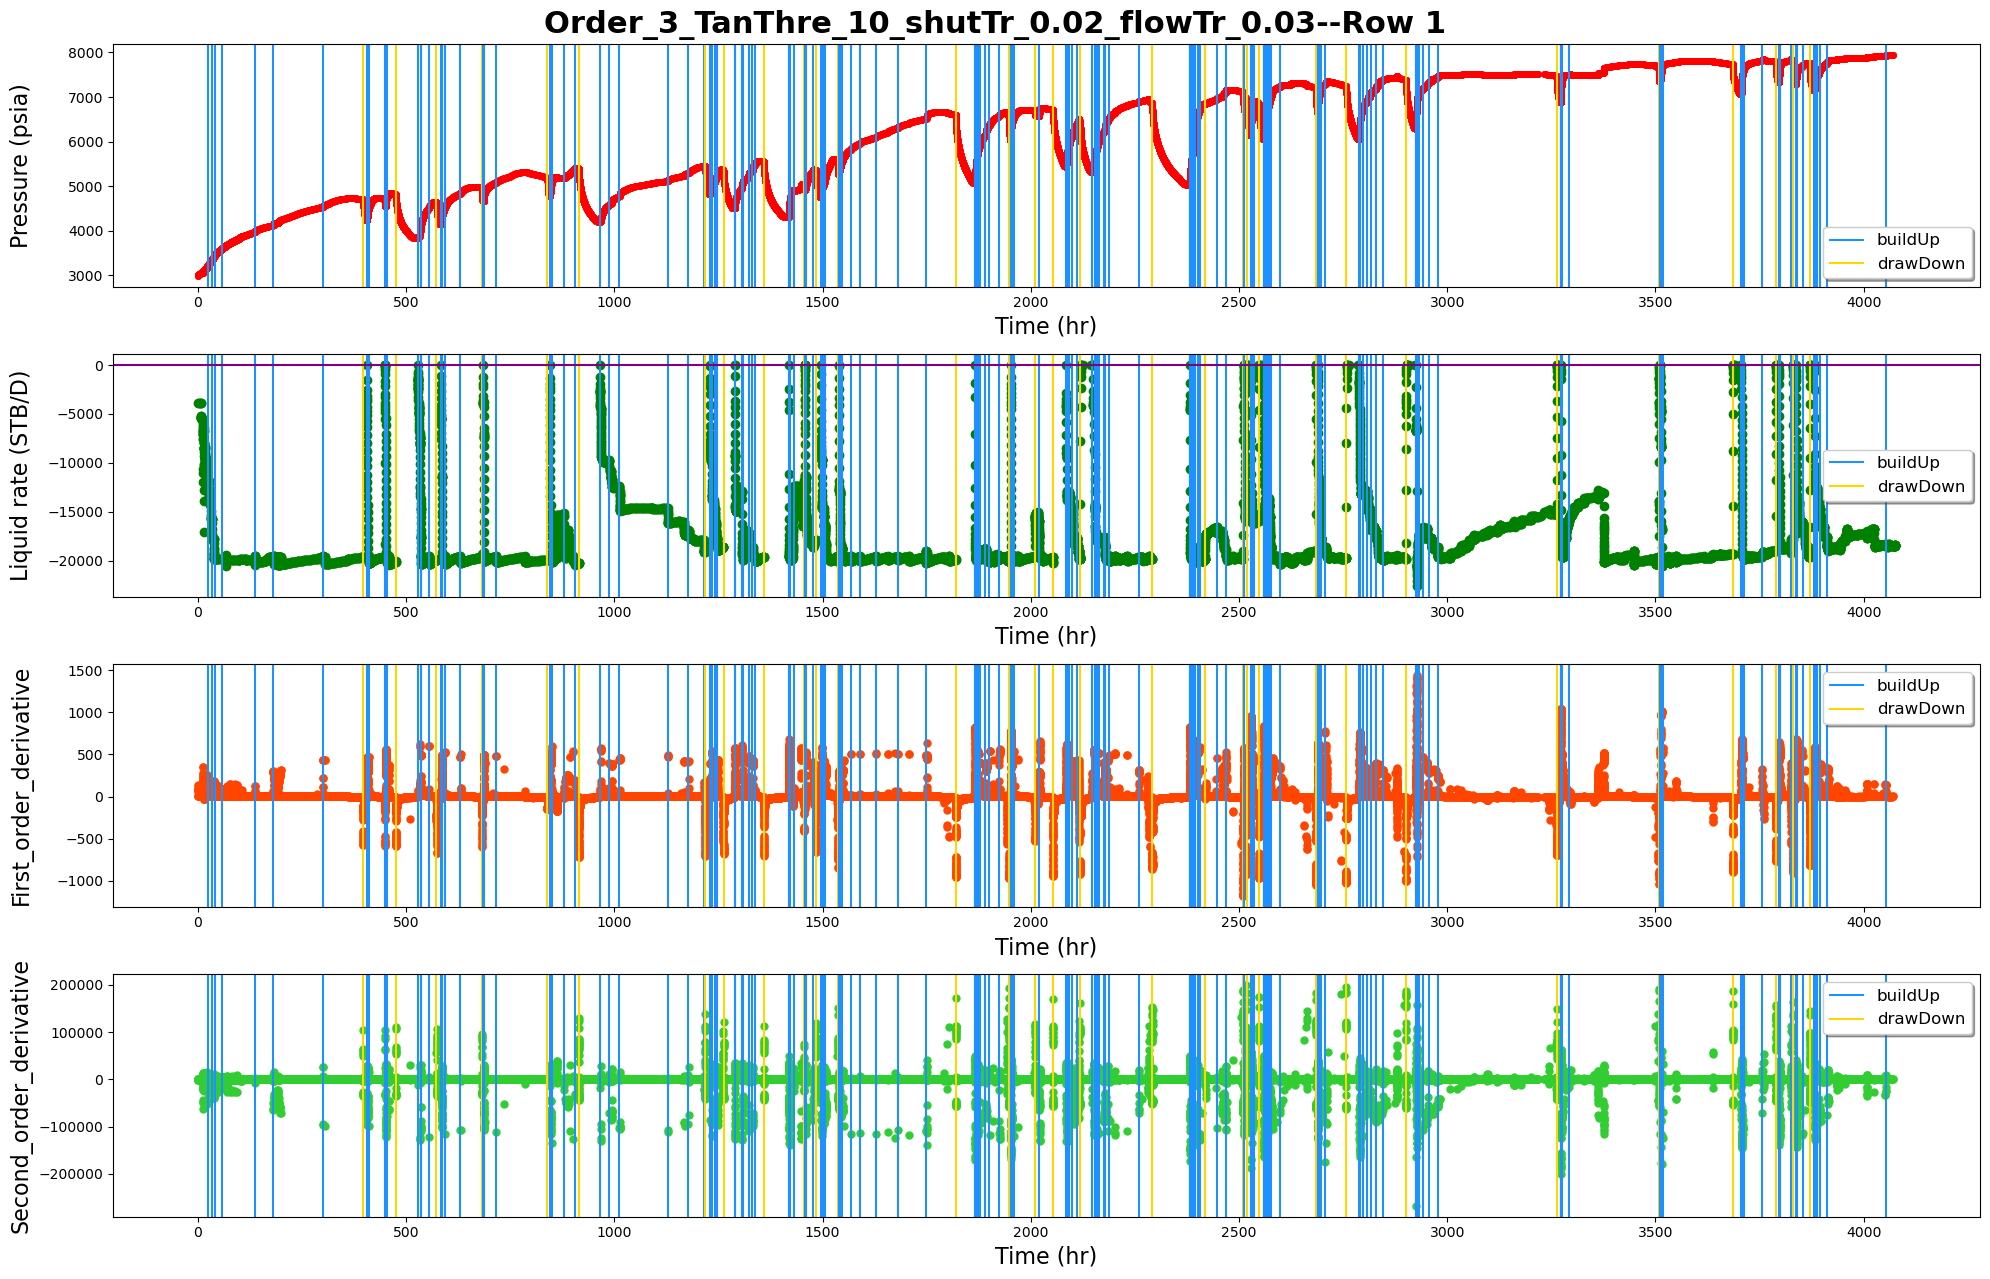

save whole....
detected 202 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[400, 576, 767, 1097]


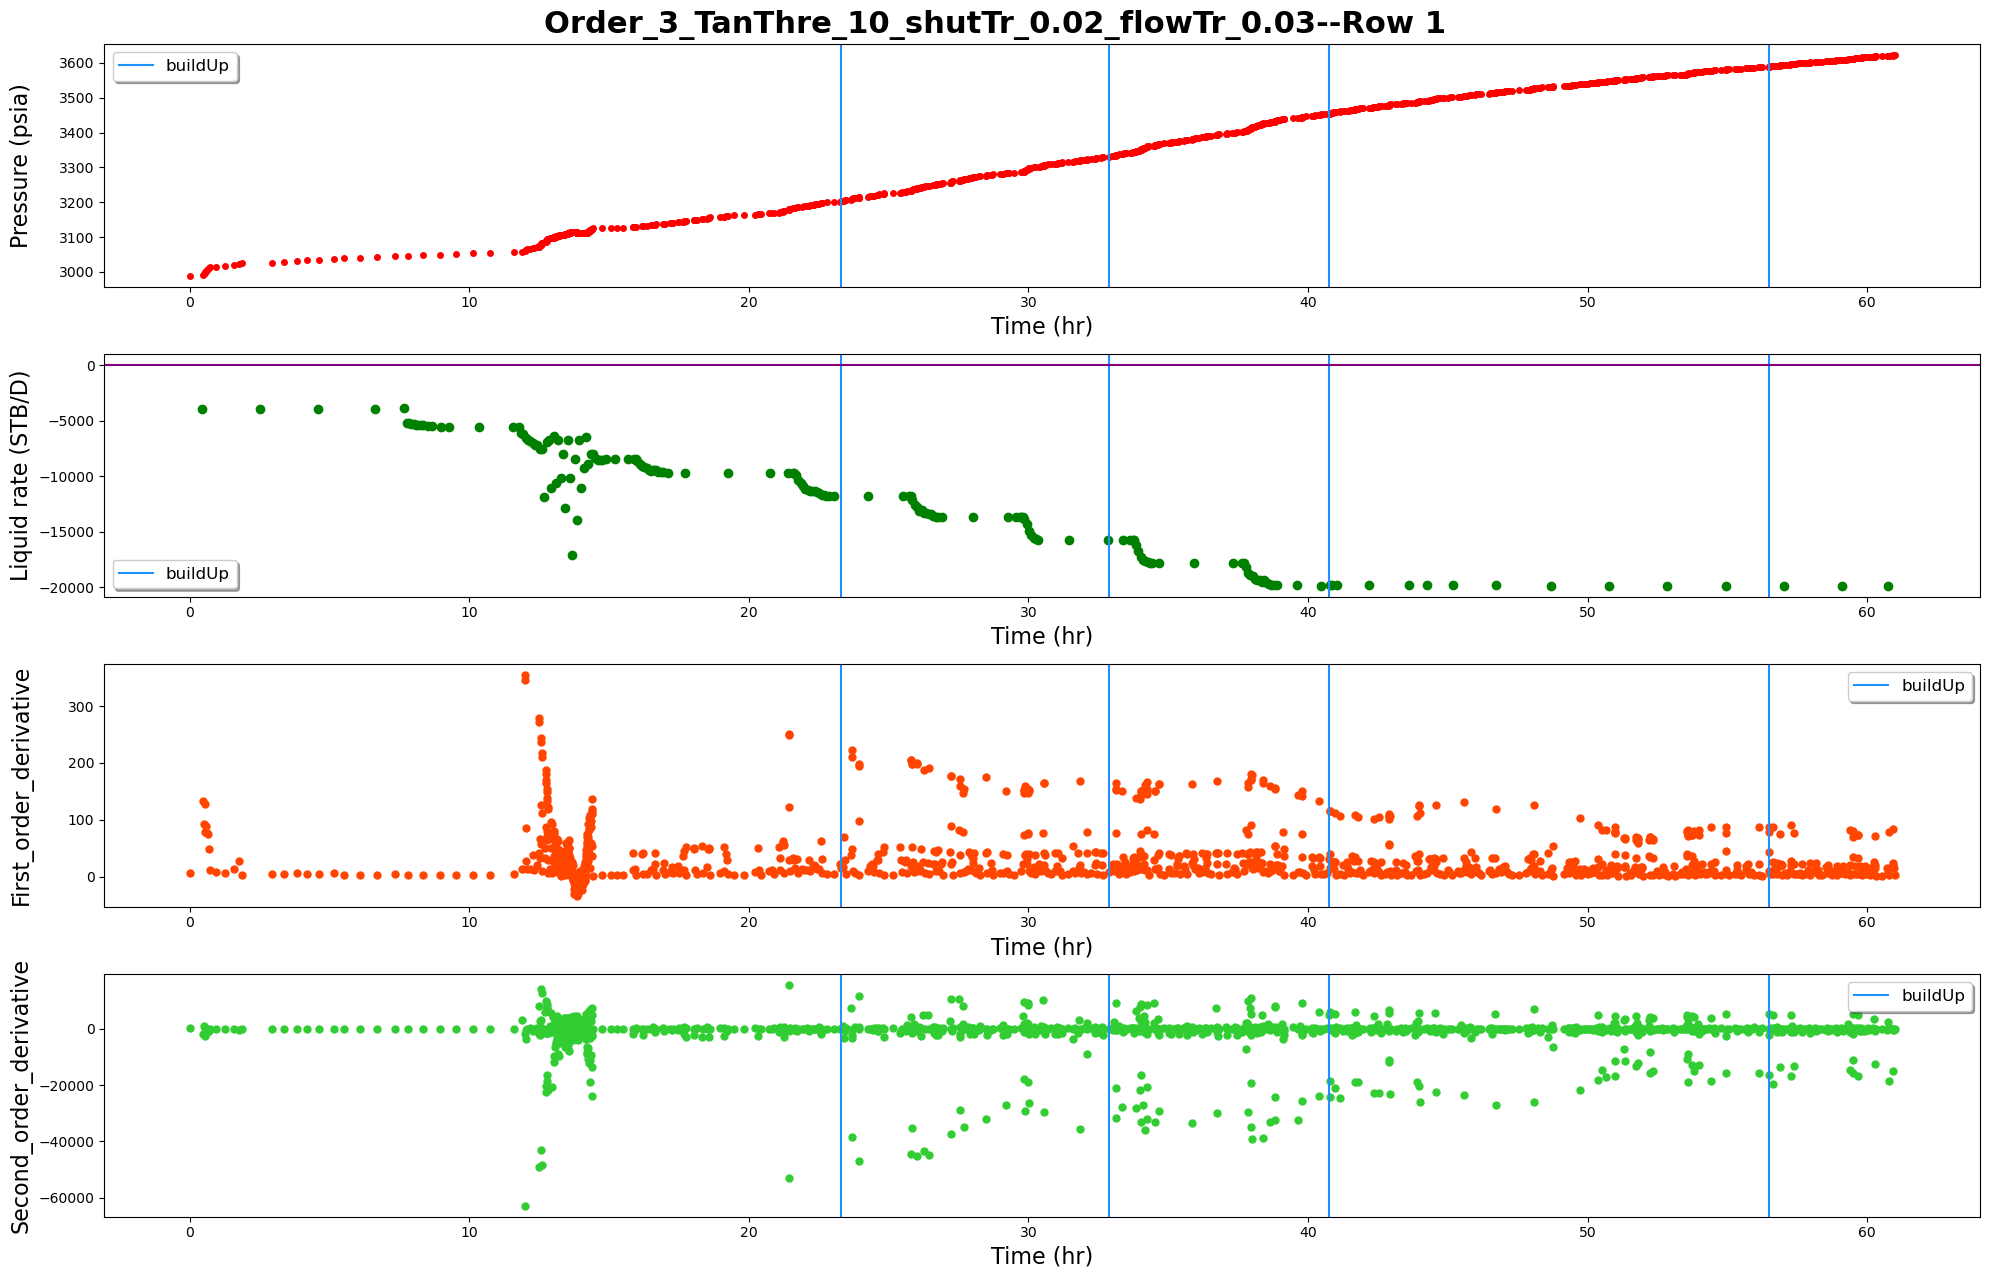

------row 2-----detected points:[1727, 1811, 2111, 2248]


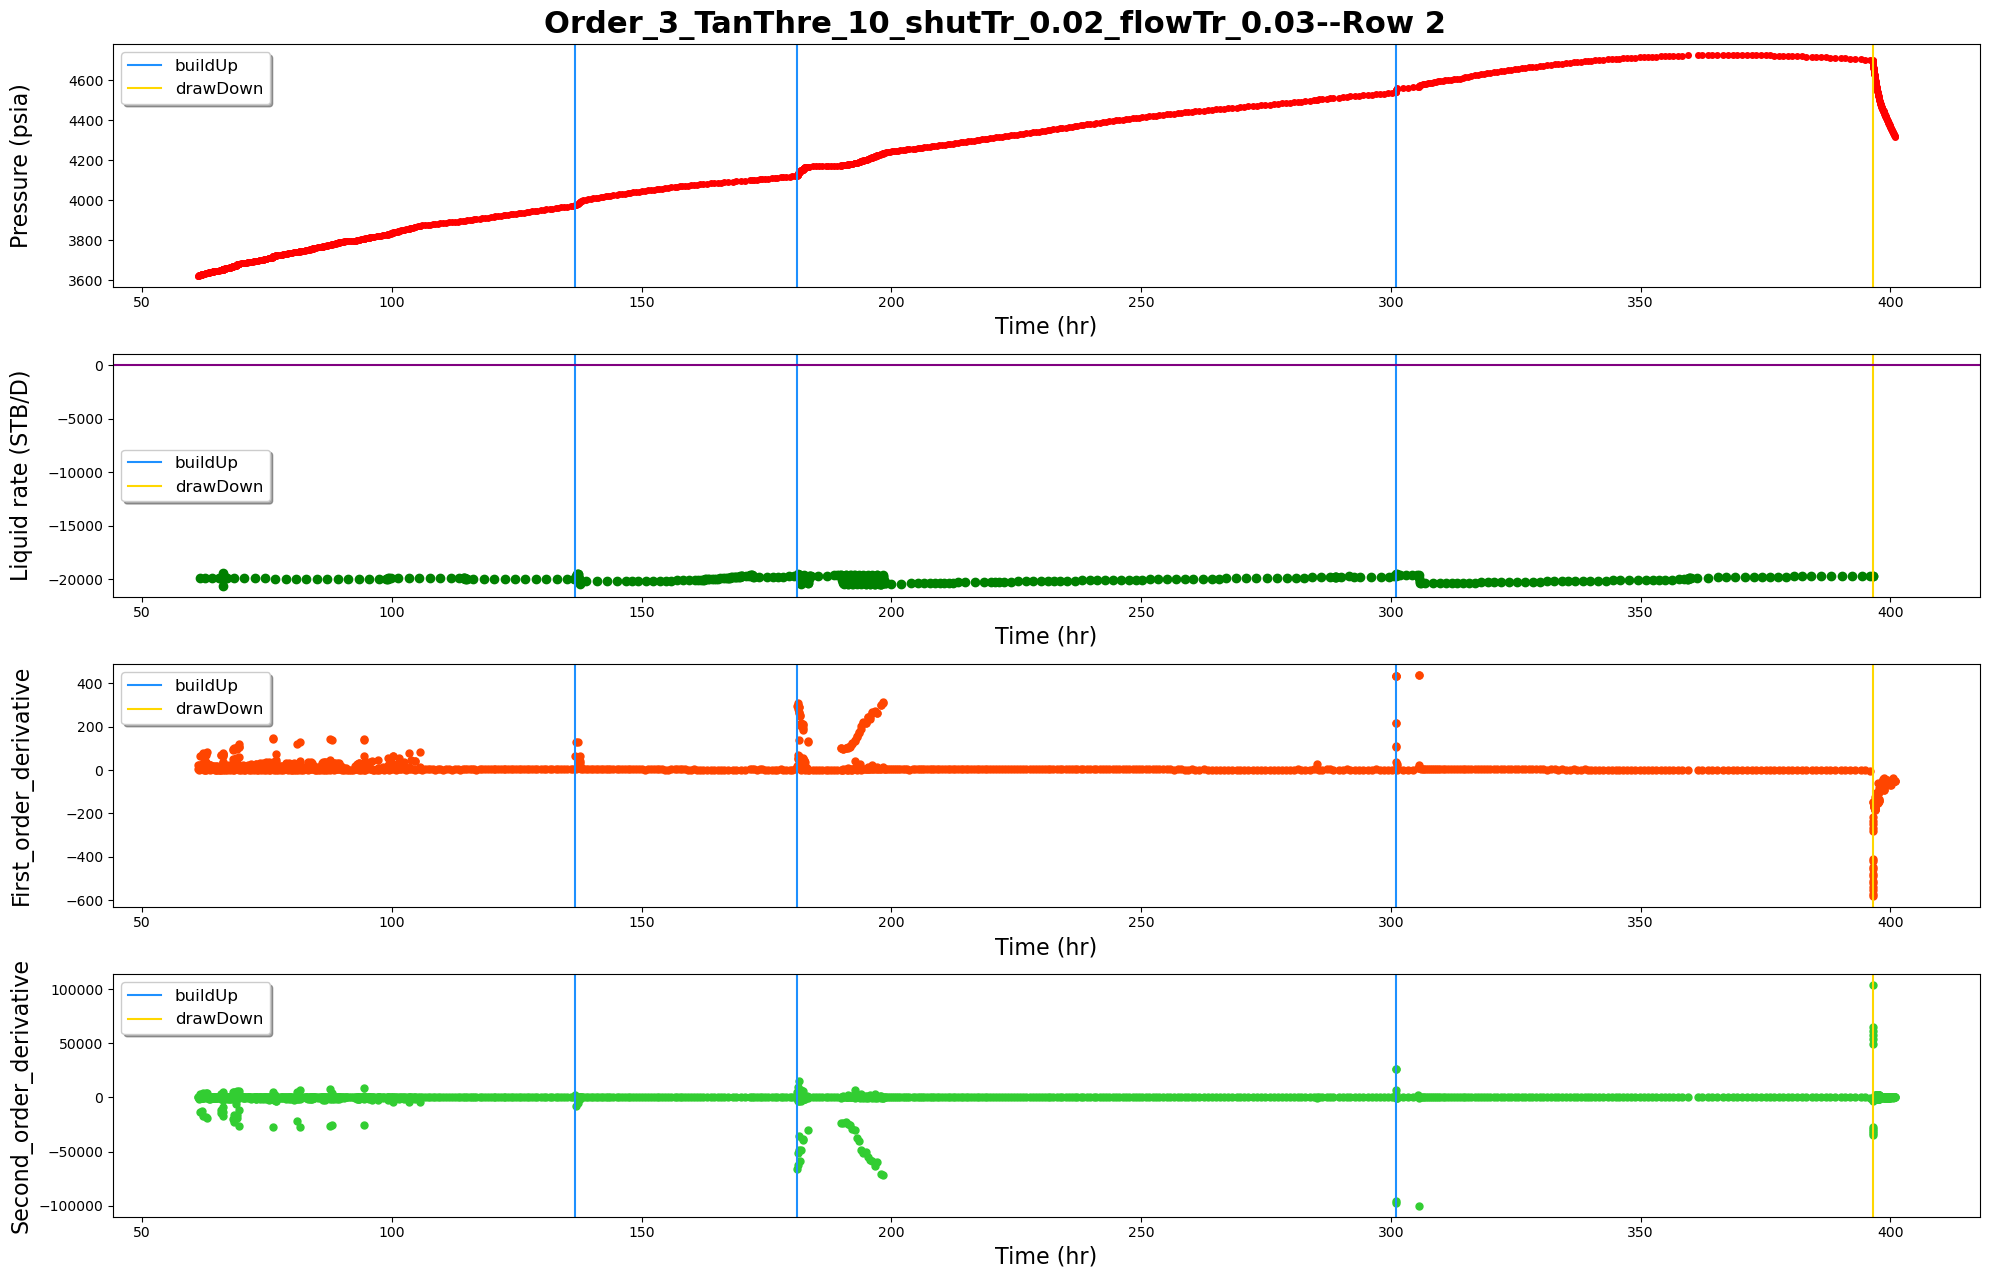

------row 3-----detected points:[2477, 2572, 2655, 2804, 2884, 2989, 3095, 3560]


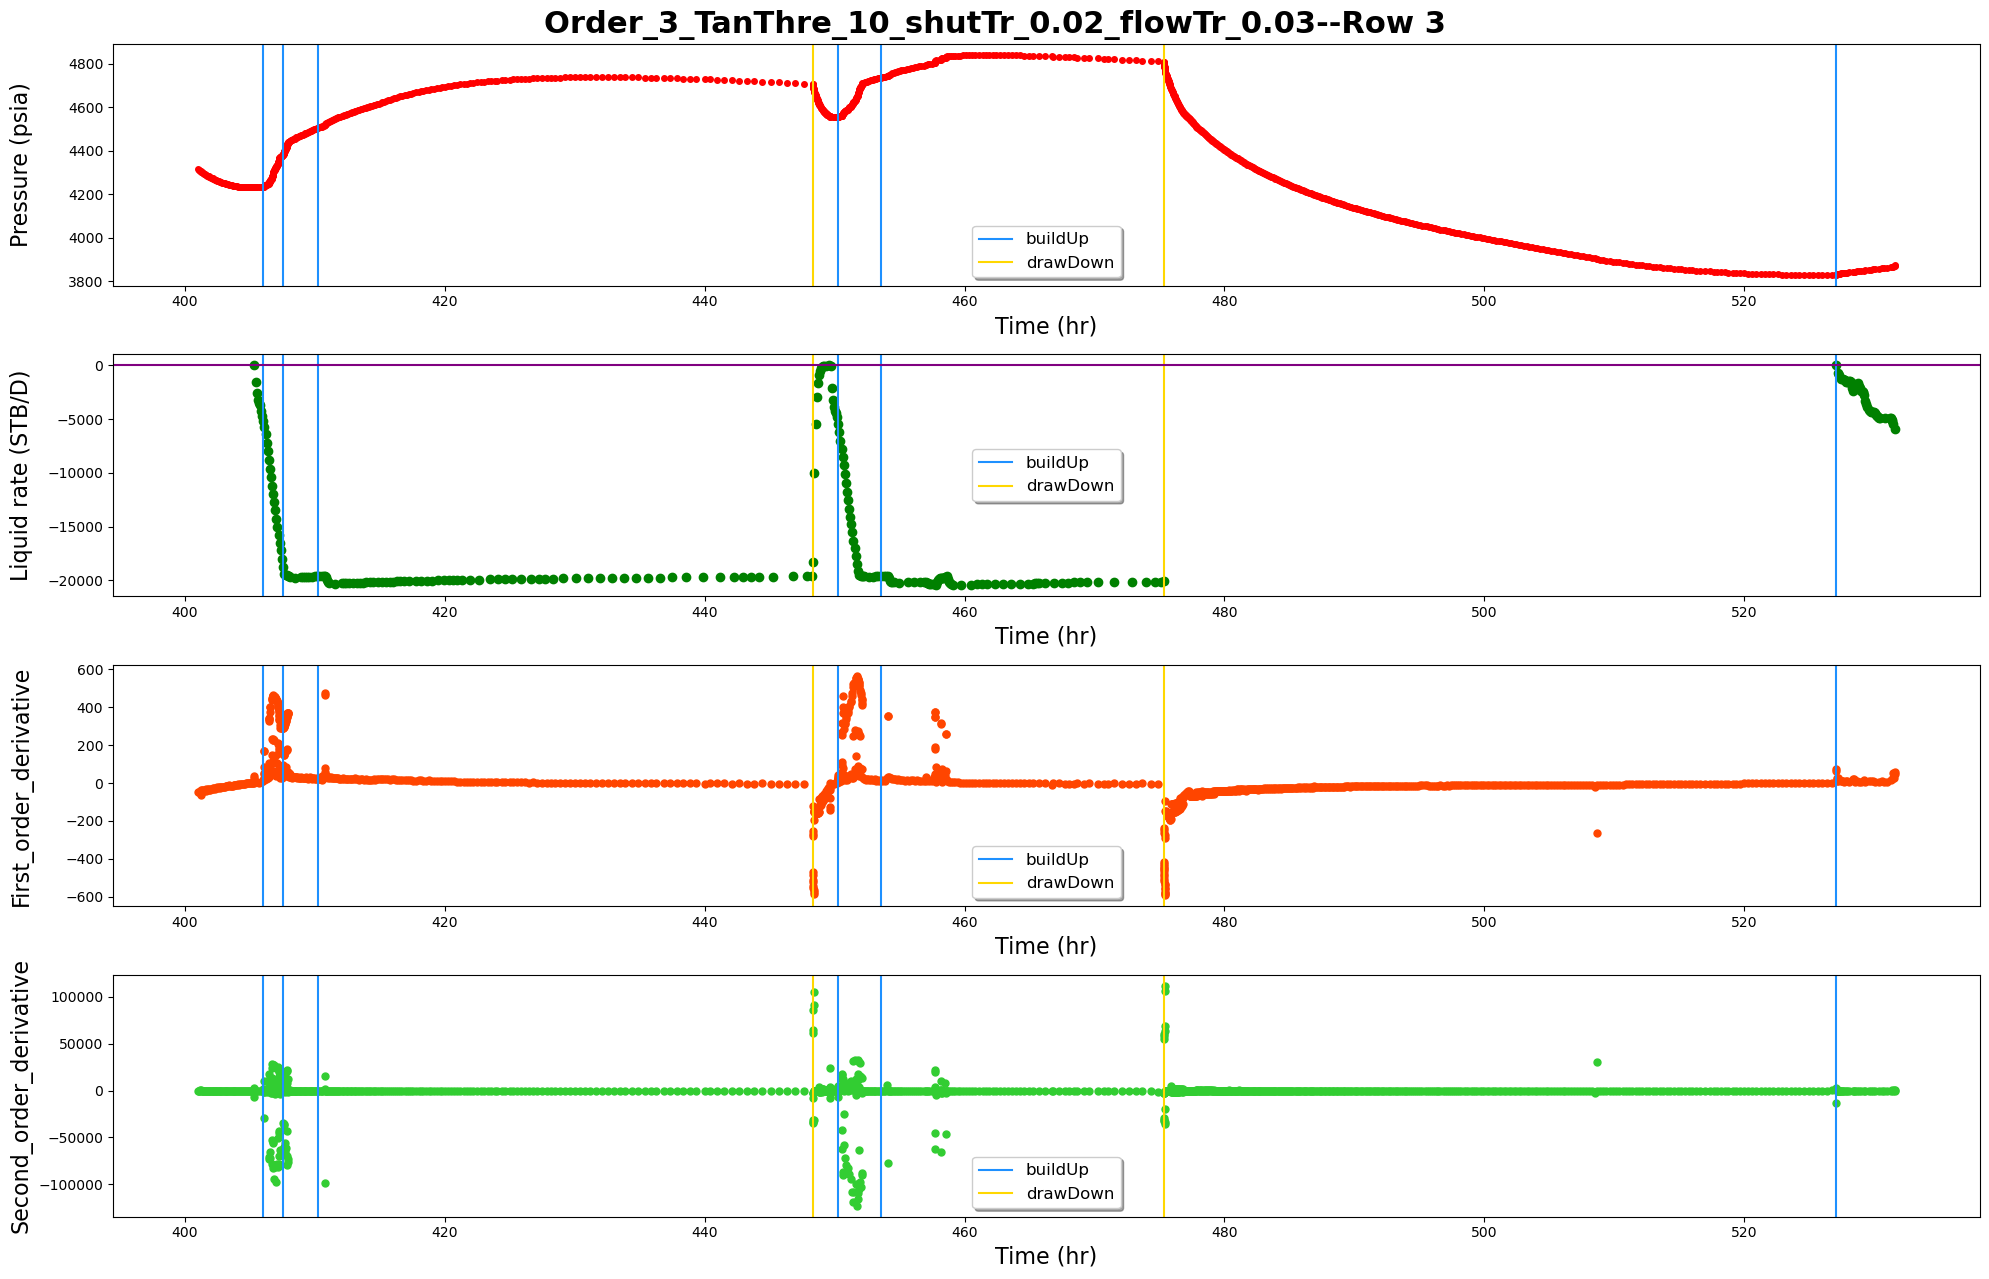

------row 4-----detected points:[3661, 3722, 3898, 3988, 4228, 4332, 4488, 4643, 4750]


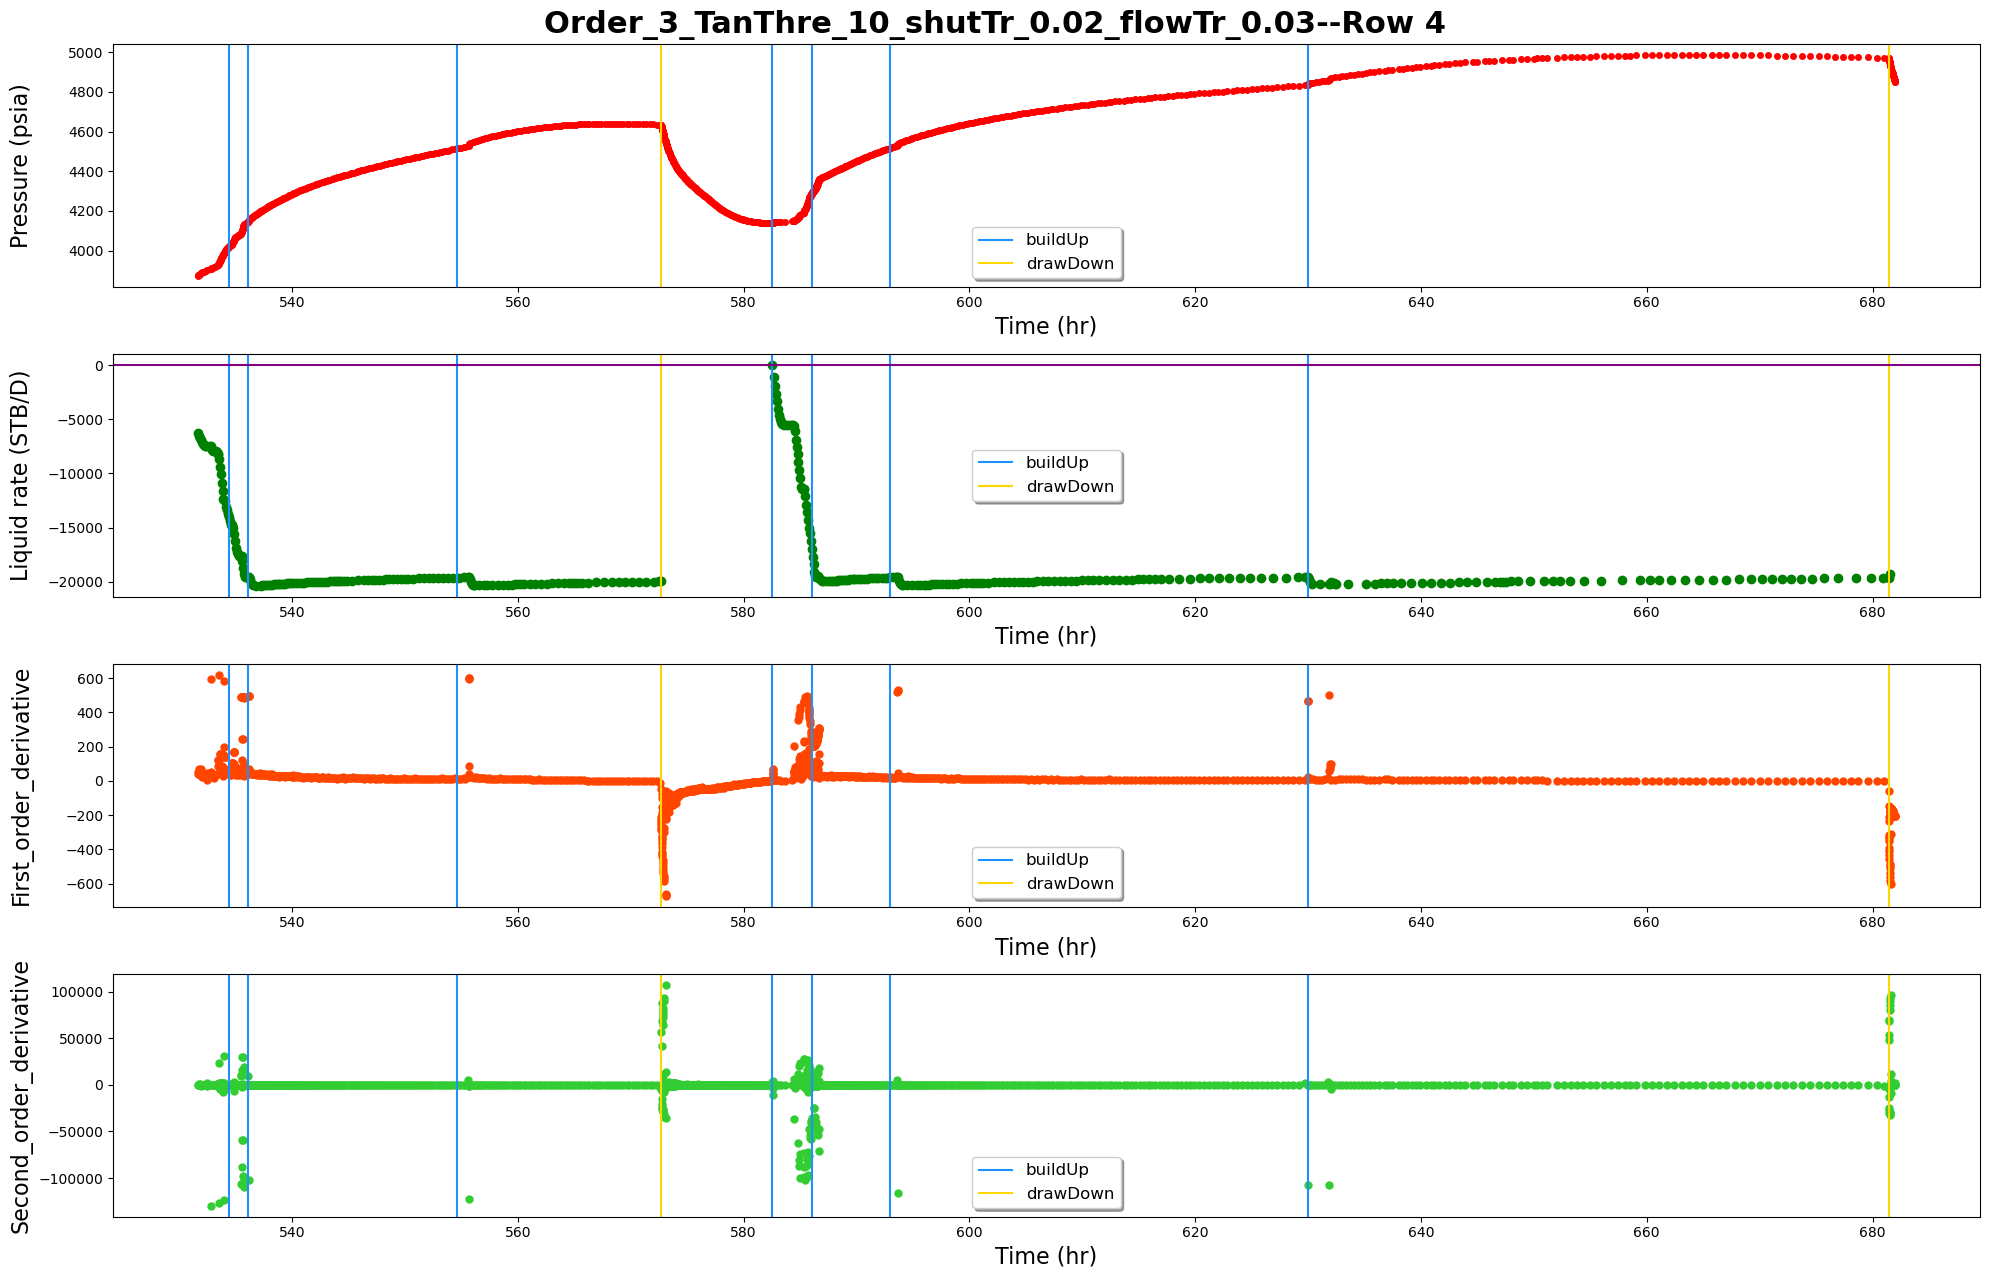

------row 5-----detected points:[4890, 4982, 5135, 5304, 5436, 5527, 5605, 5778, 5942, 5985]


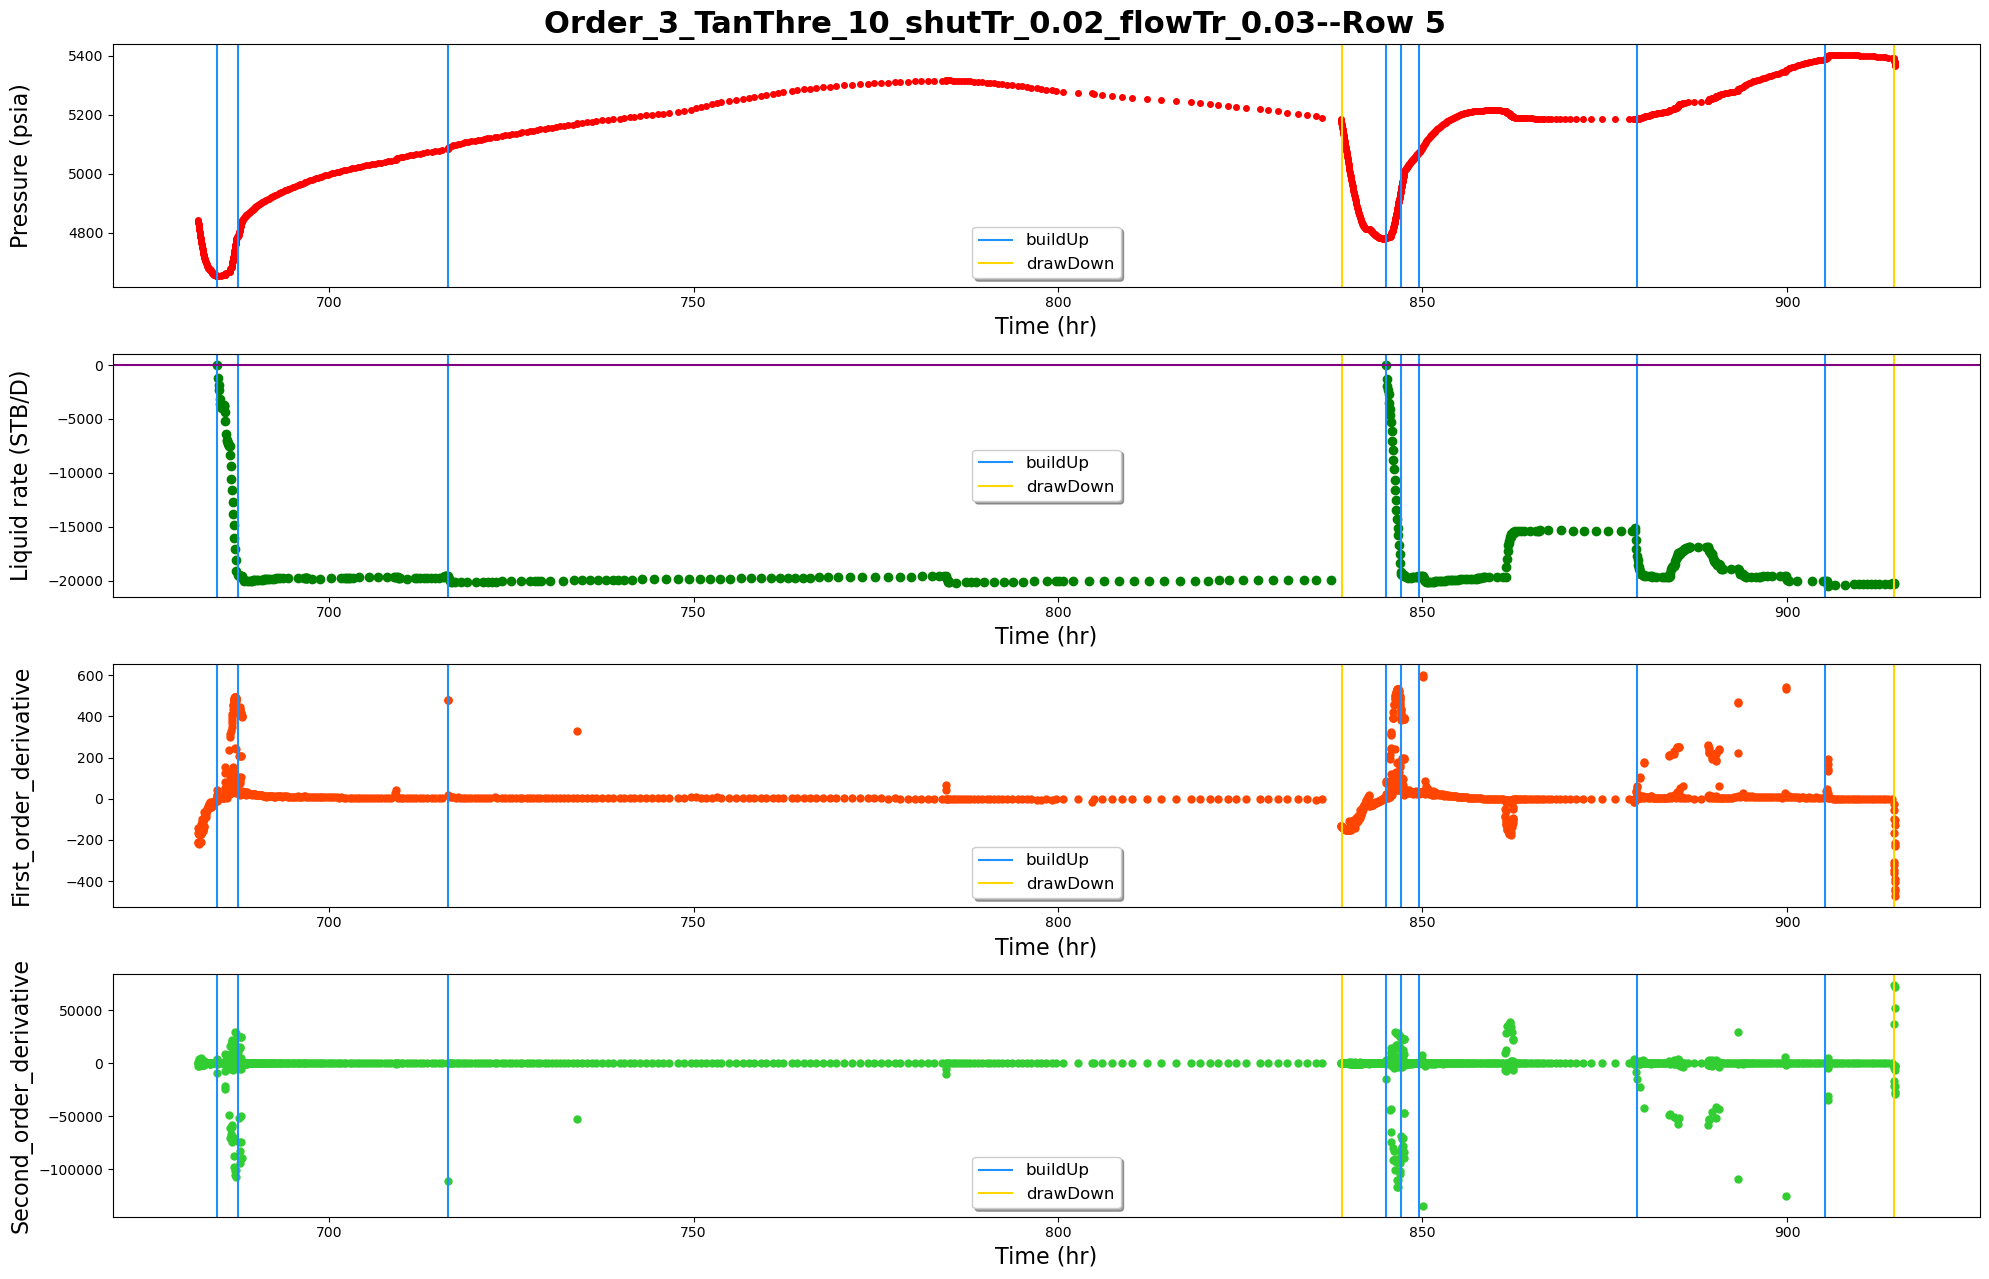

------row 6-----detected points:[6543, 6738, 6865, 7038, 7137]


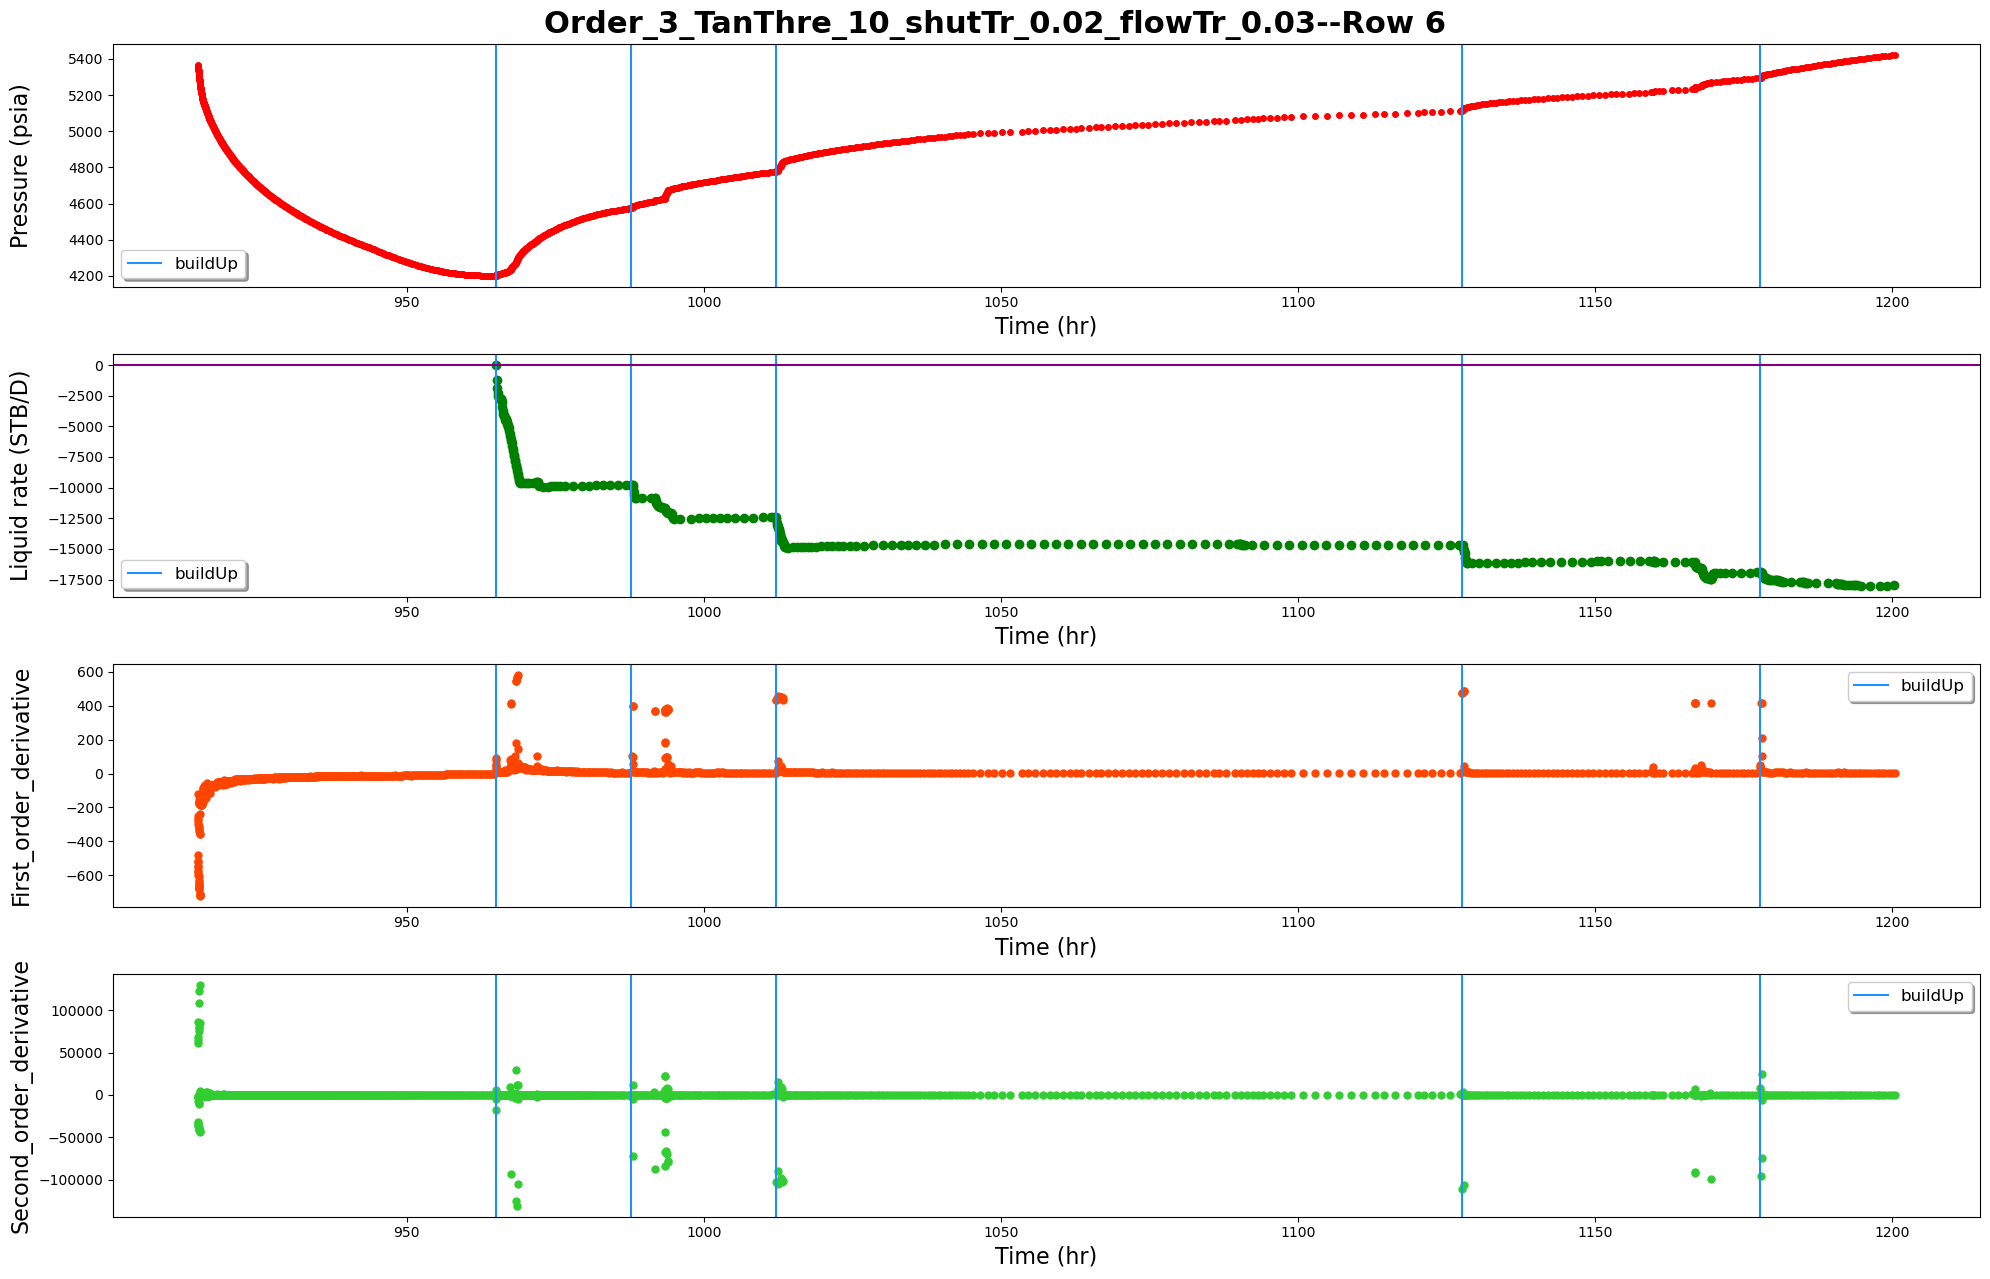

------row 7-----detected points:[7220, 7284, 7544, 7618, 7710, 7809, 8003, 8361]


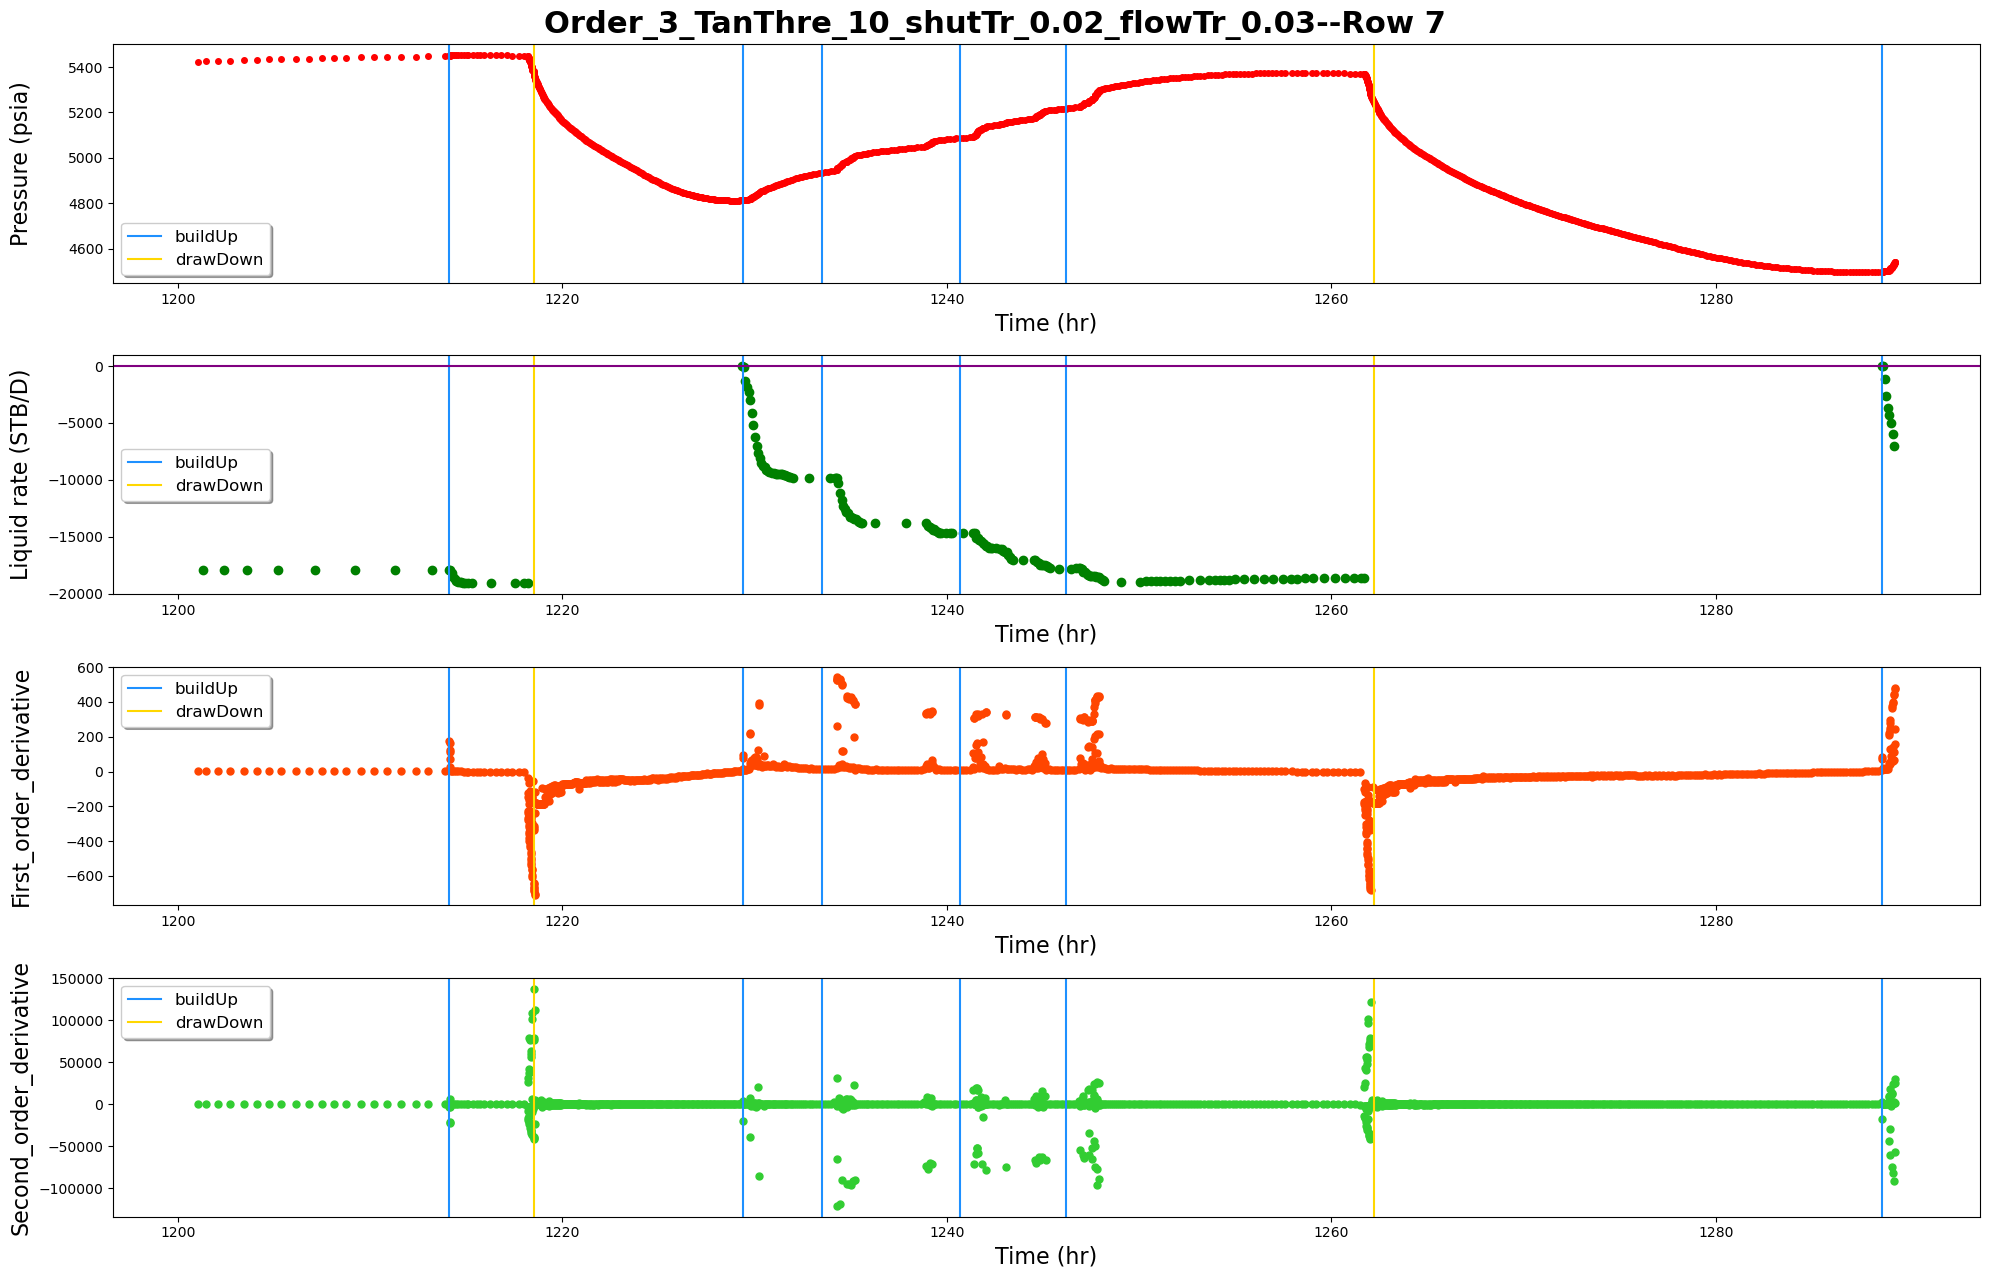

------row 8-----detected points:[8447, 8595, 8657, 8792, 8863, 8936, 9024]


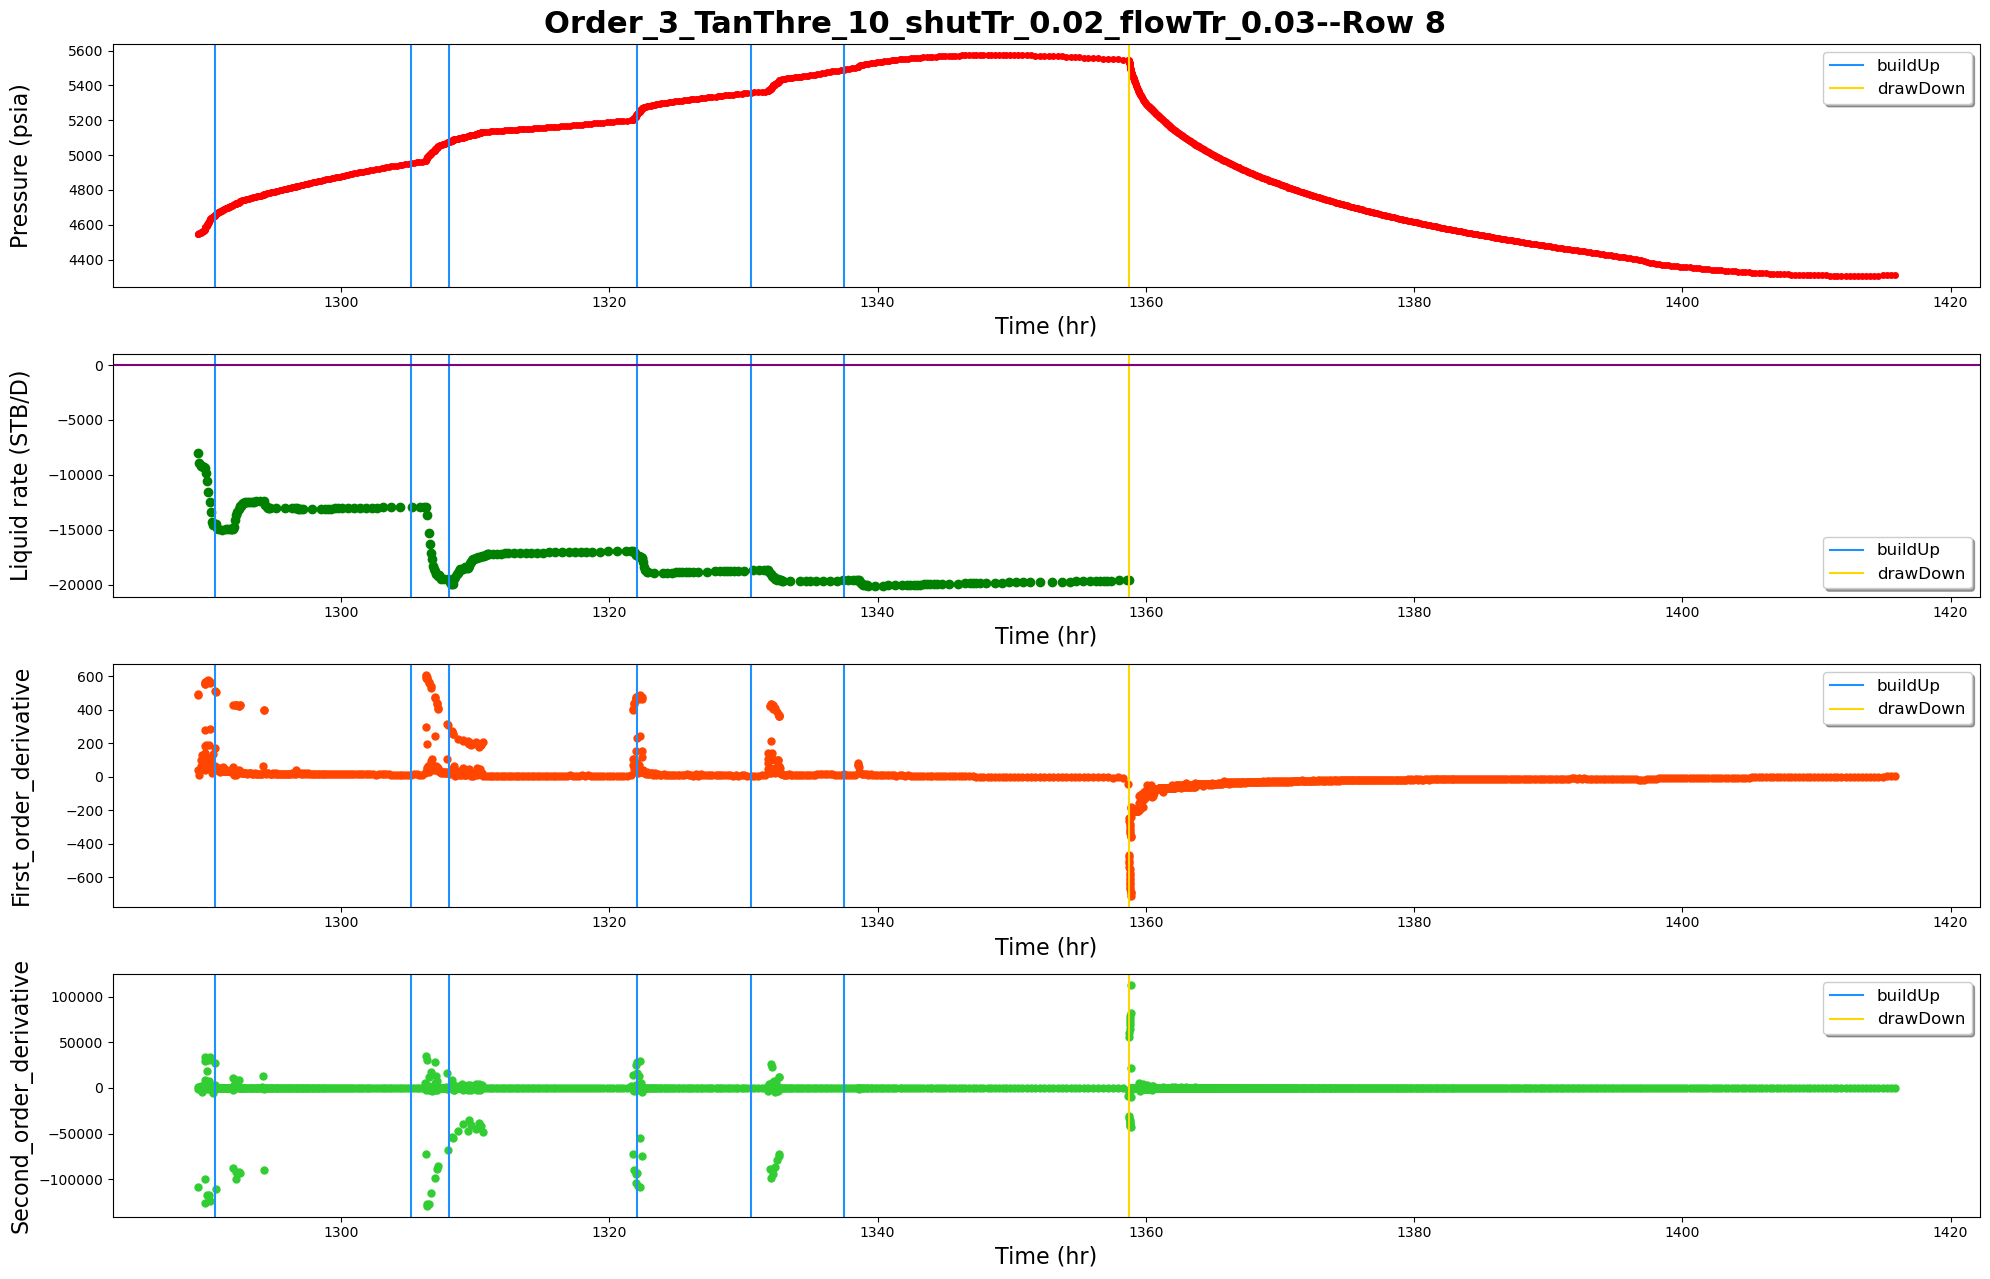

------row 9-----detected points:[9606, 9680, 9836, 10014, 10149, 10224, 10299, 10448, 10527]


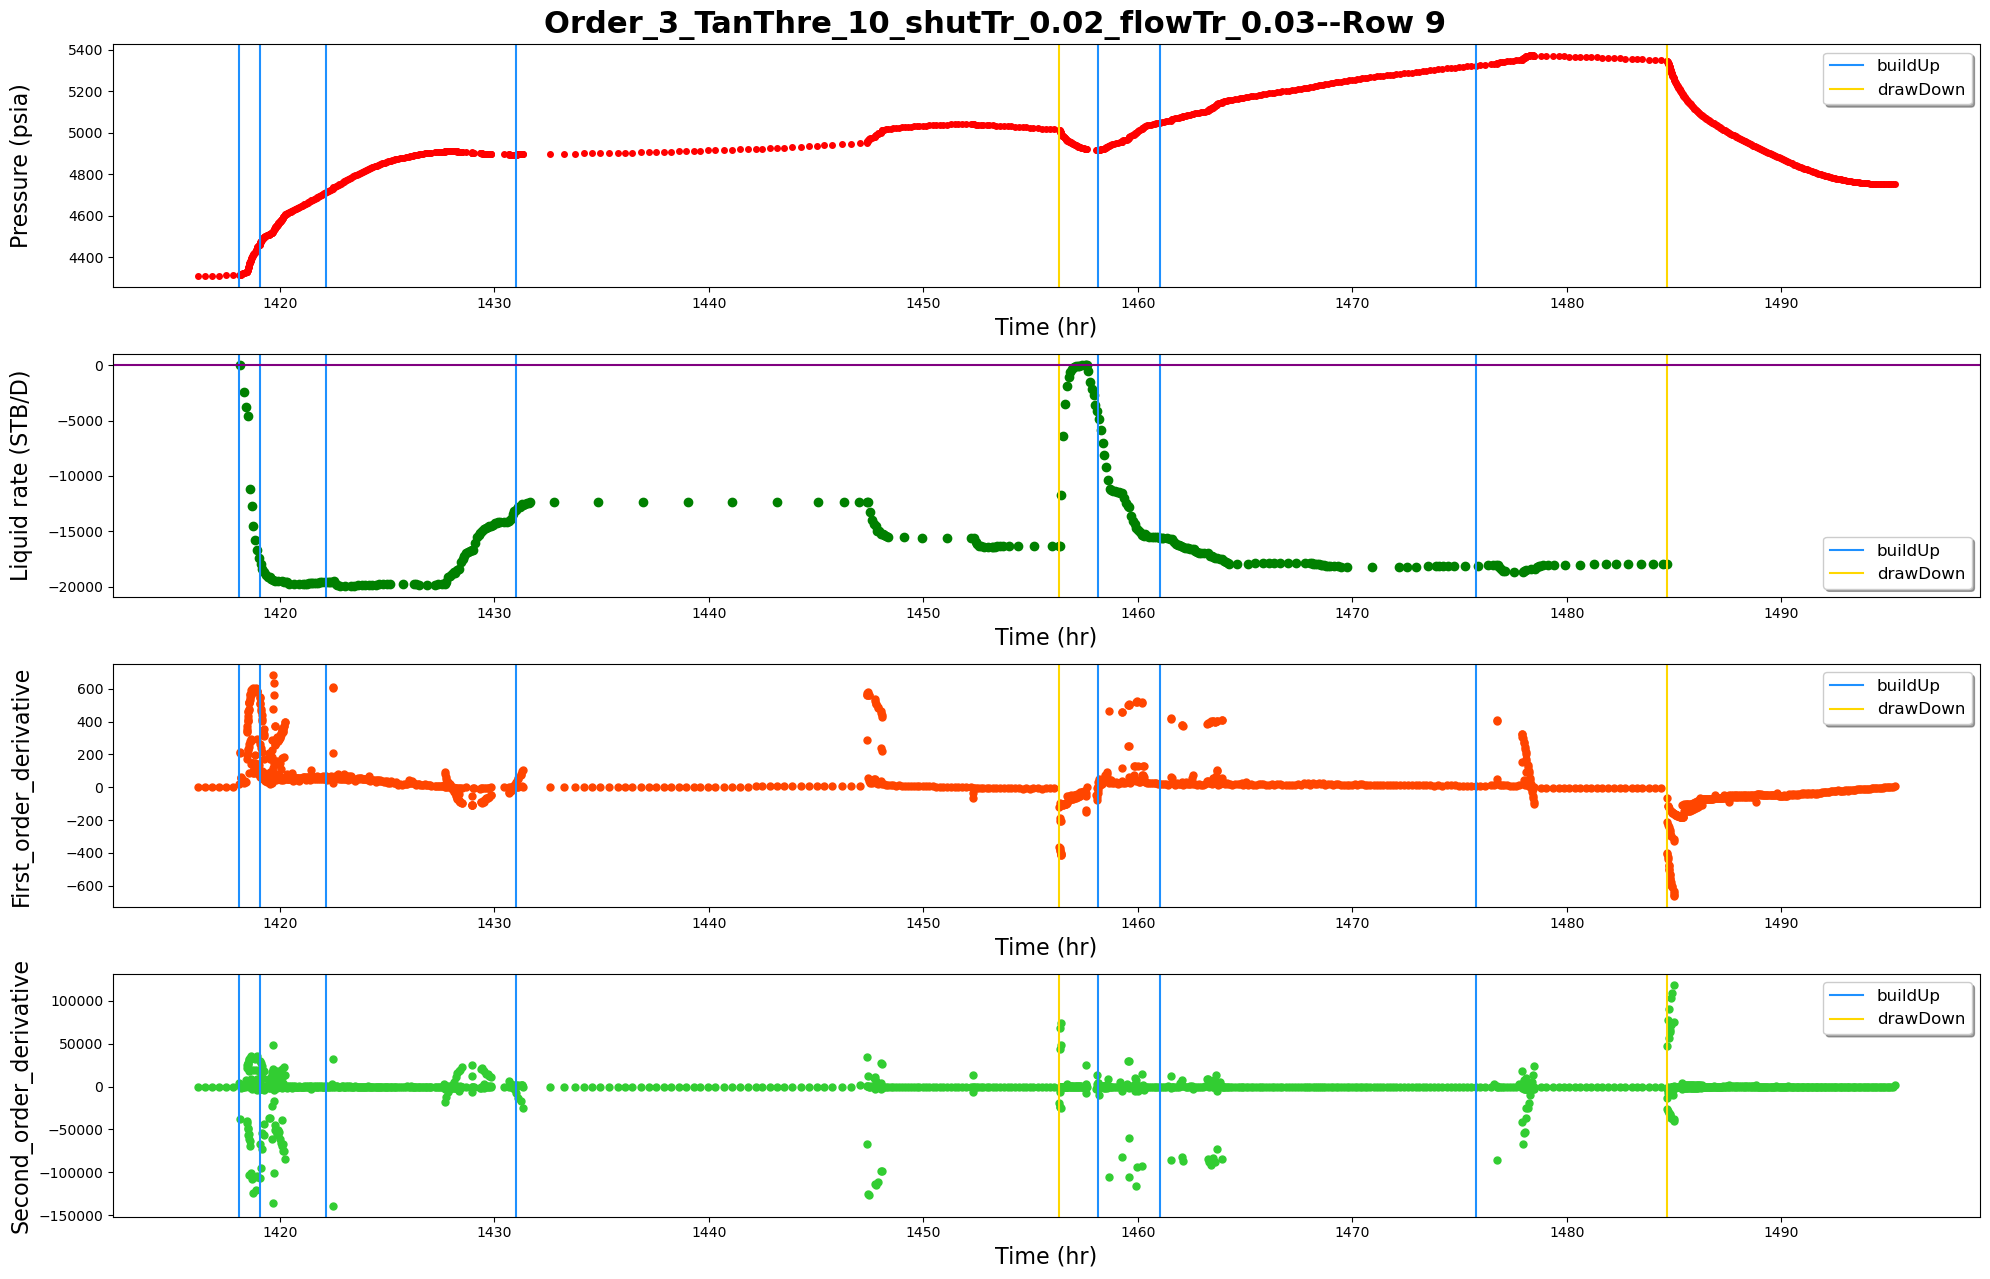

------row 10-----detected points:[10800, 10872, 10942, 11021, 11340, 11480, 11603, 11741, 11906, 11971]


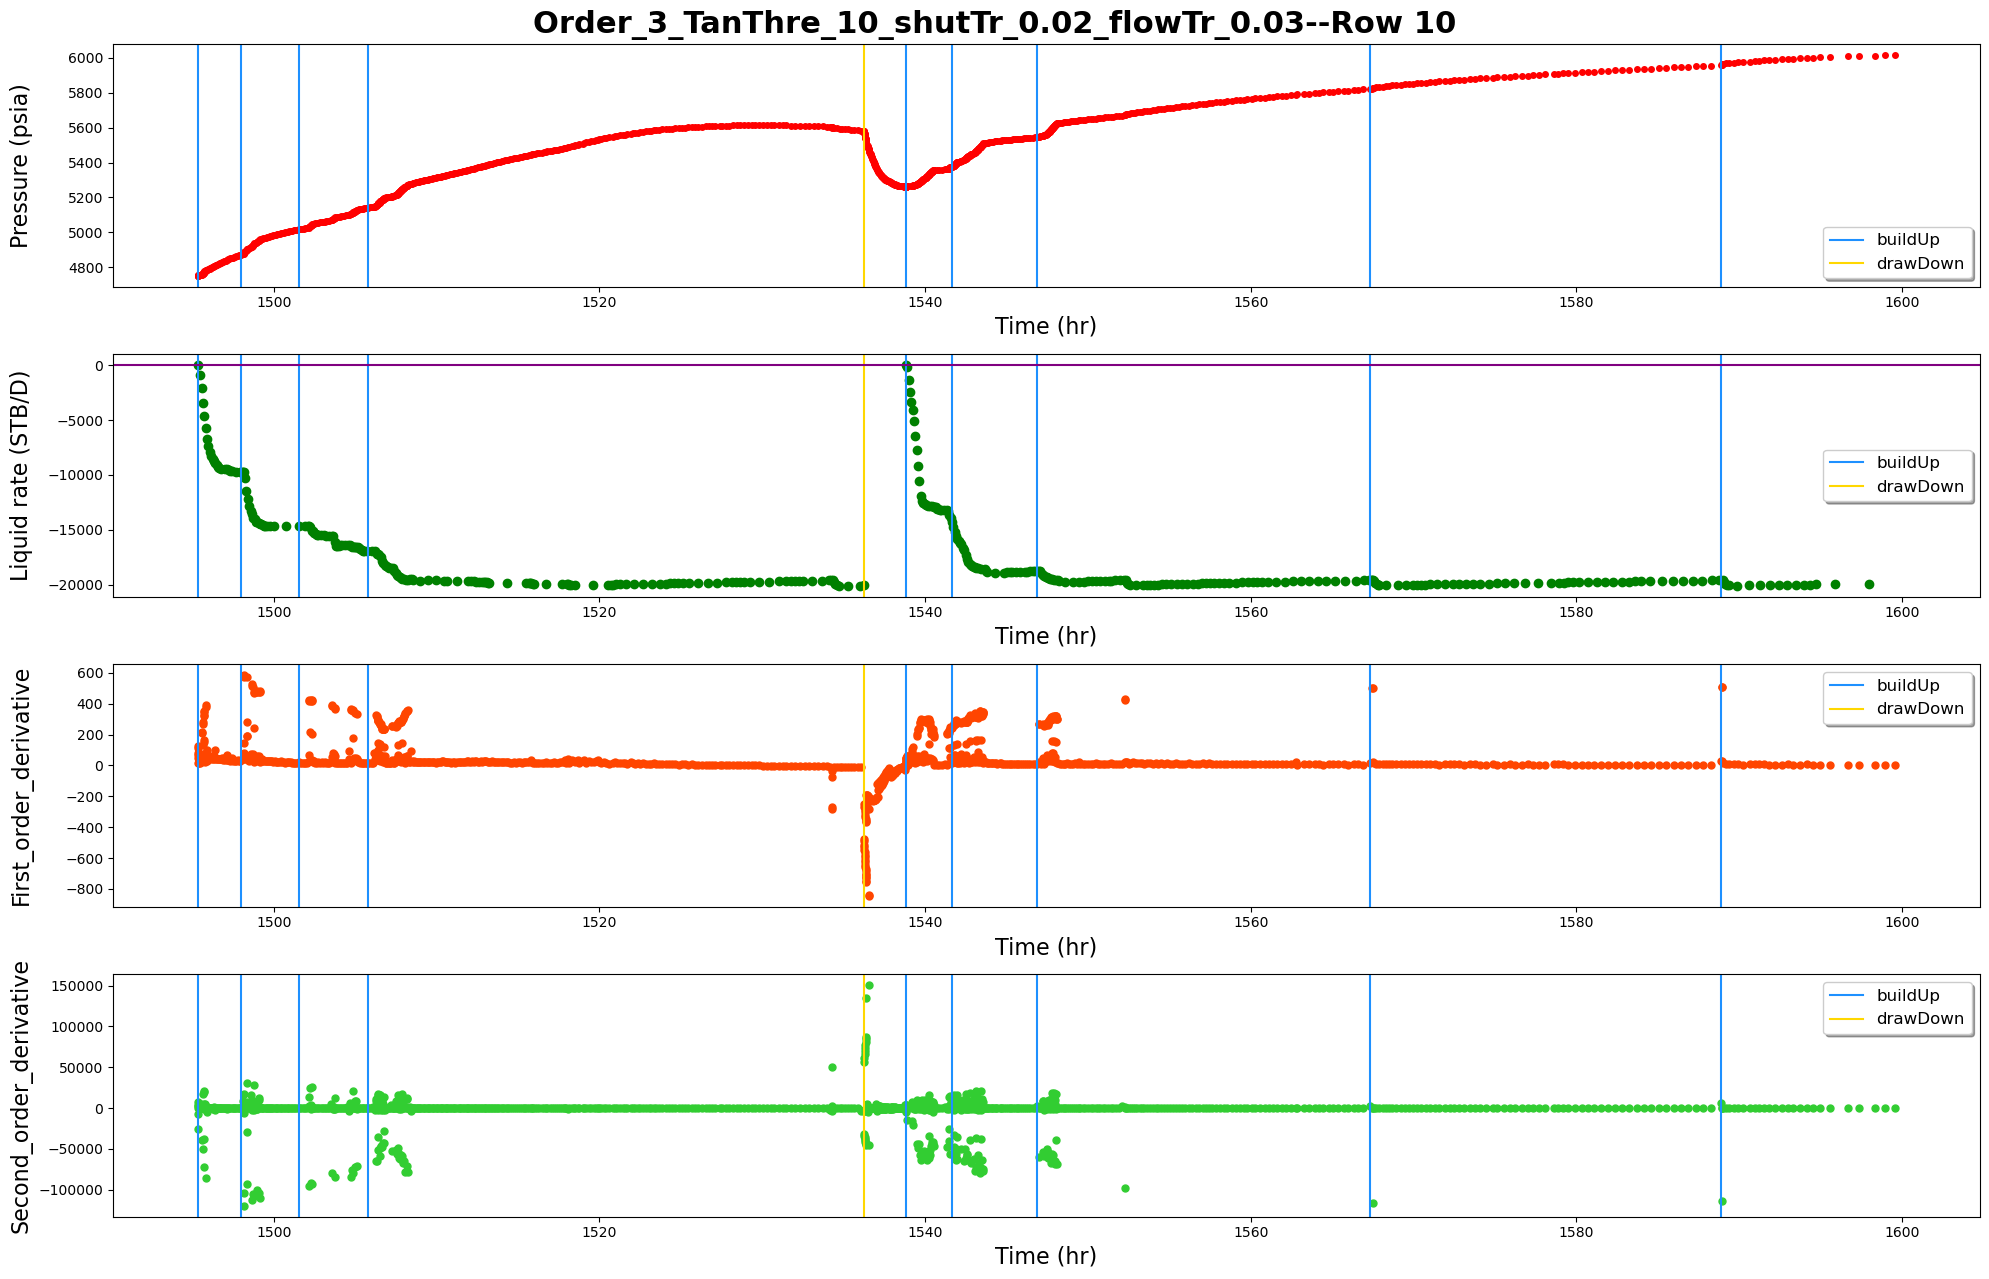

------row 11-----detected points:[12039, 12137, 12233, 12362, 13038, 13096, 13142]


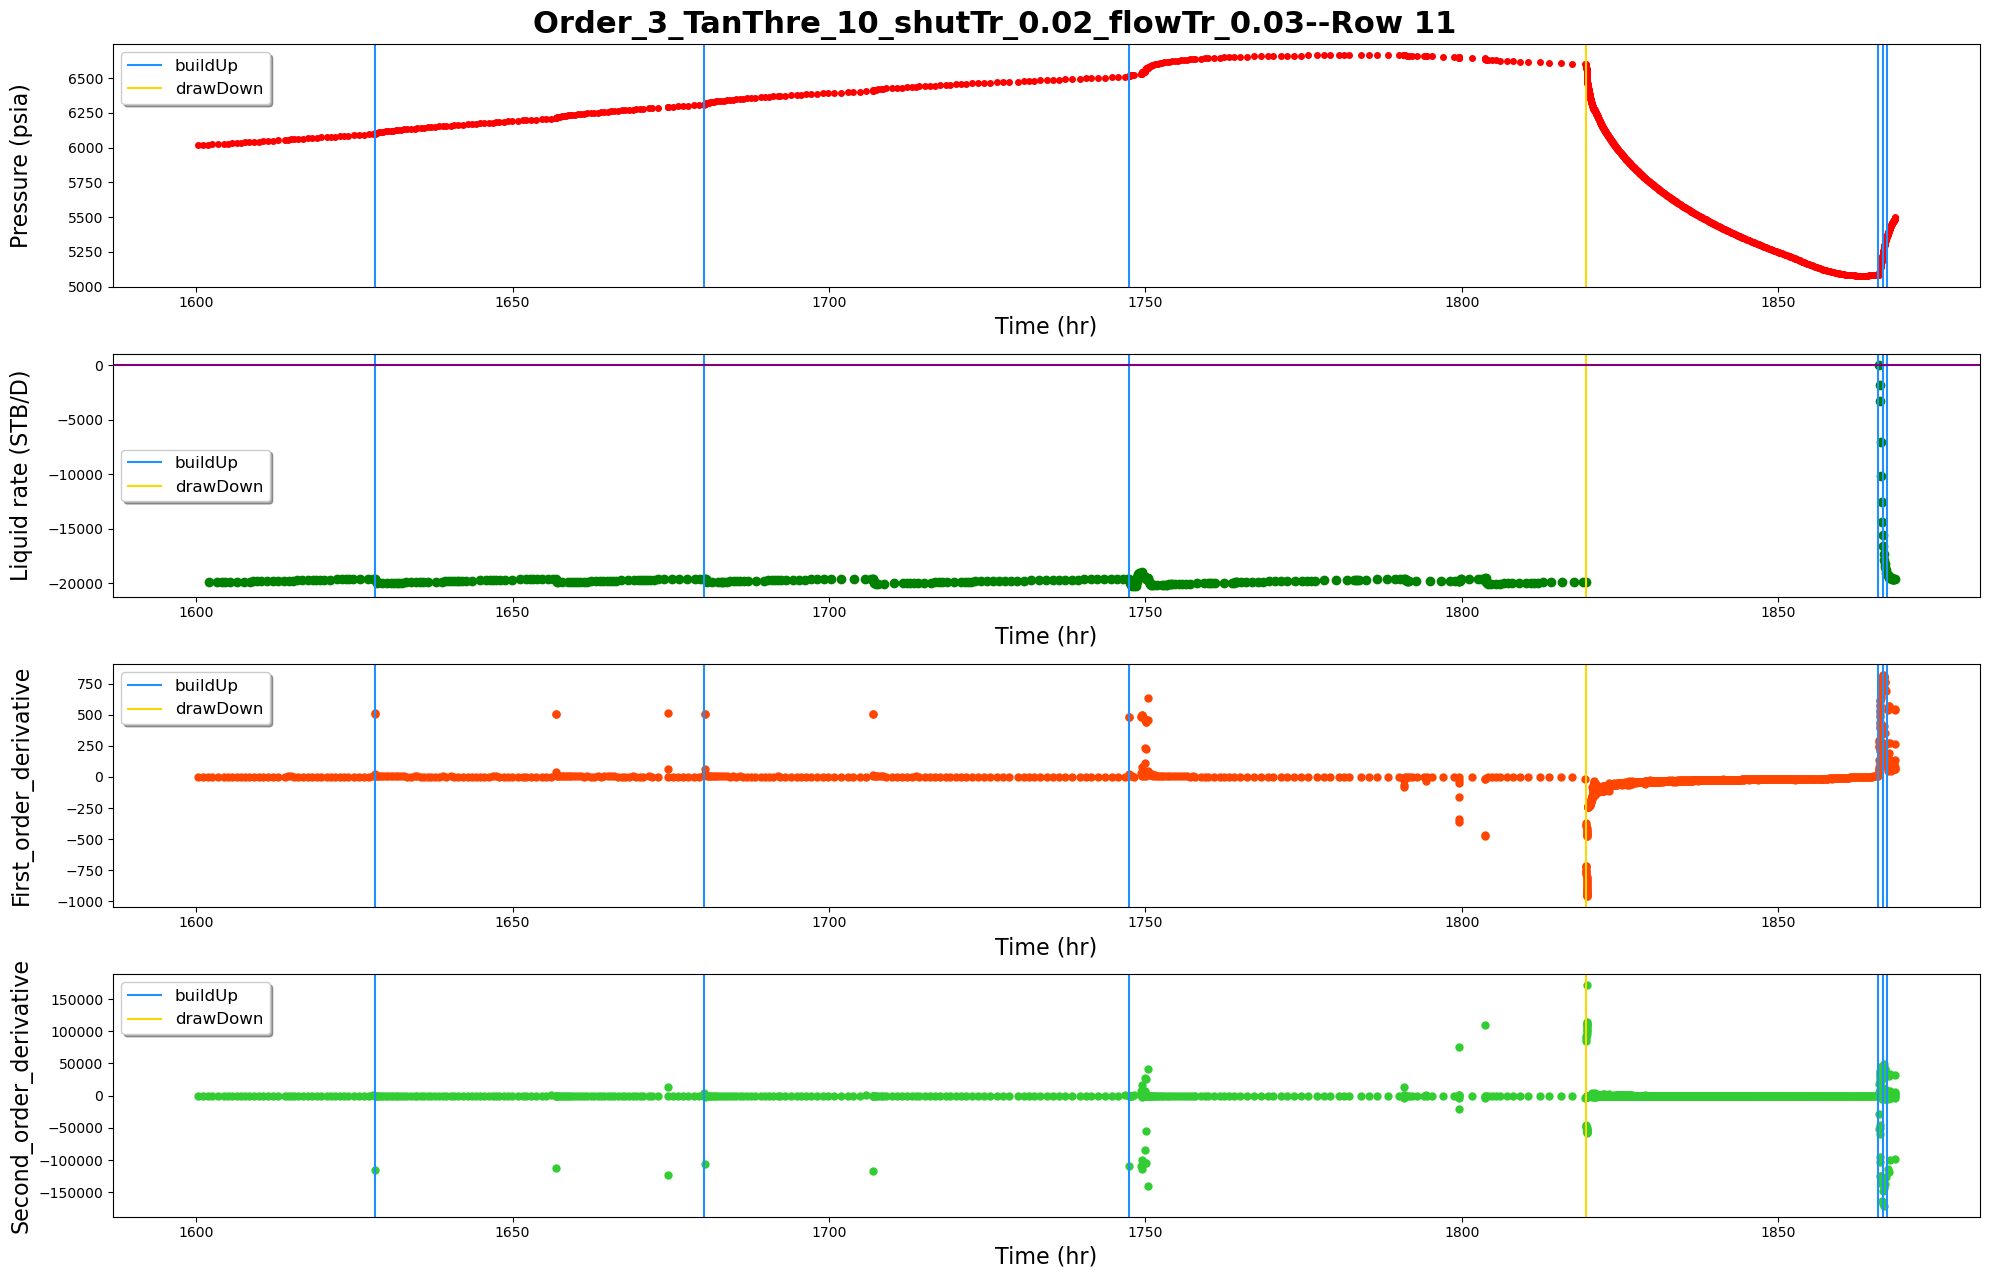

------row 12-----detected points:[13265, 13329, 13401, 13522, 13662, 13763, 13909, 14085, 14184, 14267, 14329]


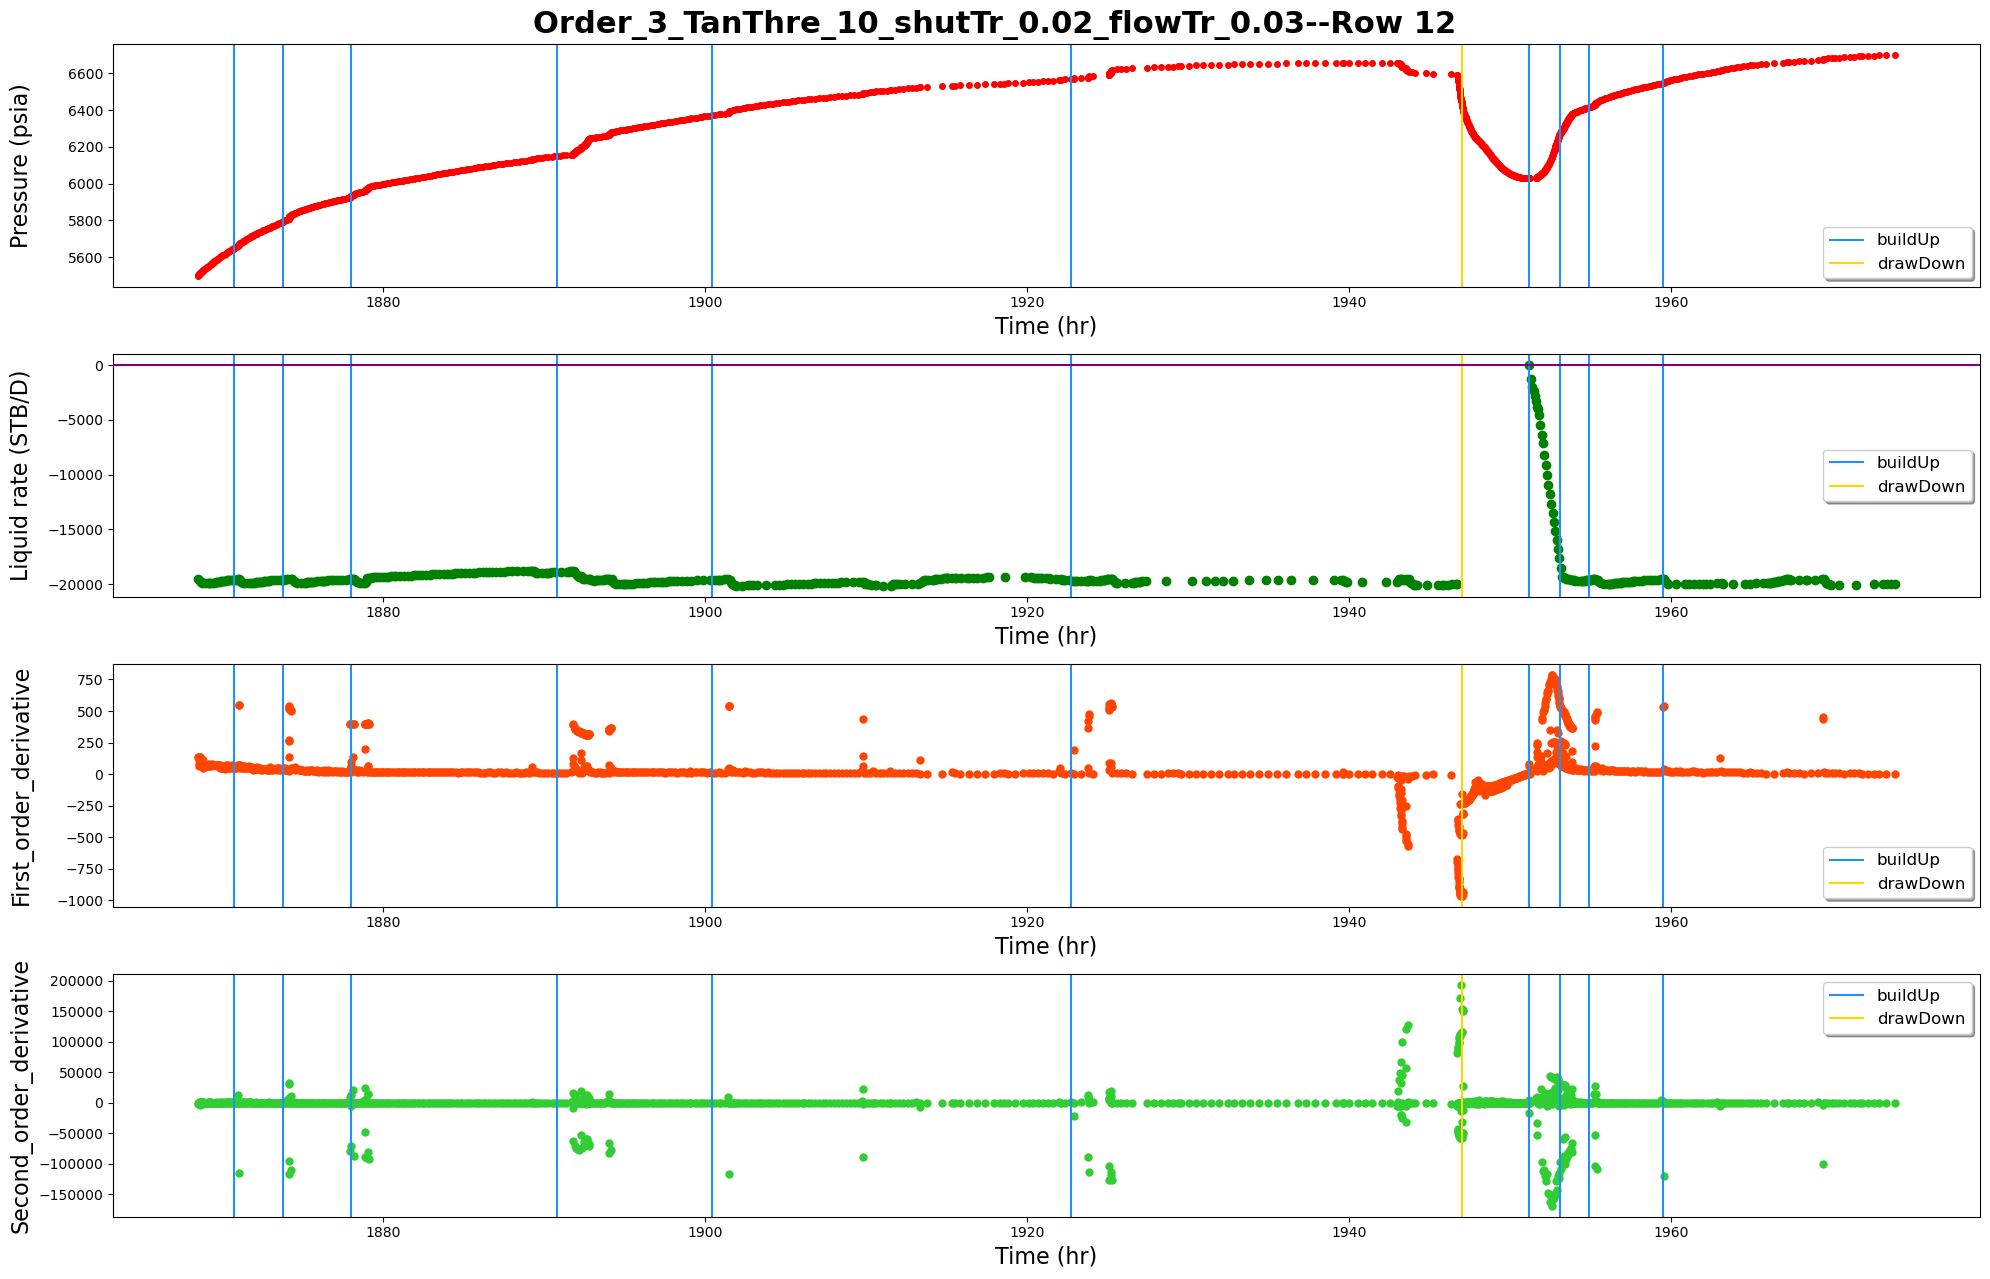

------row 13-----detected points:[14471, 14574, 14774, 15329, 15422, 15570]


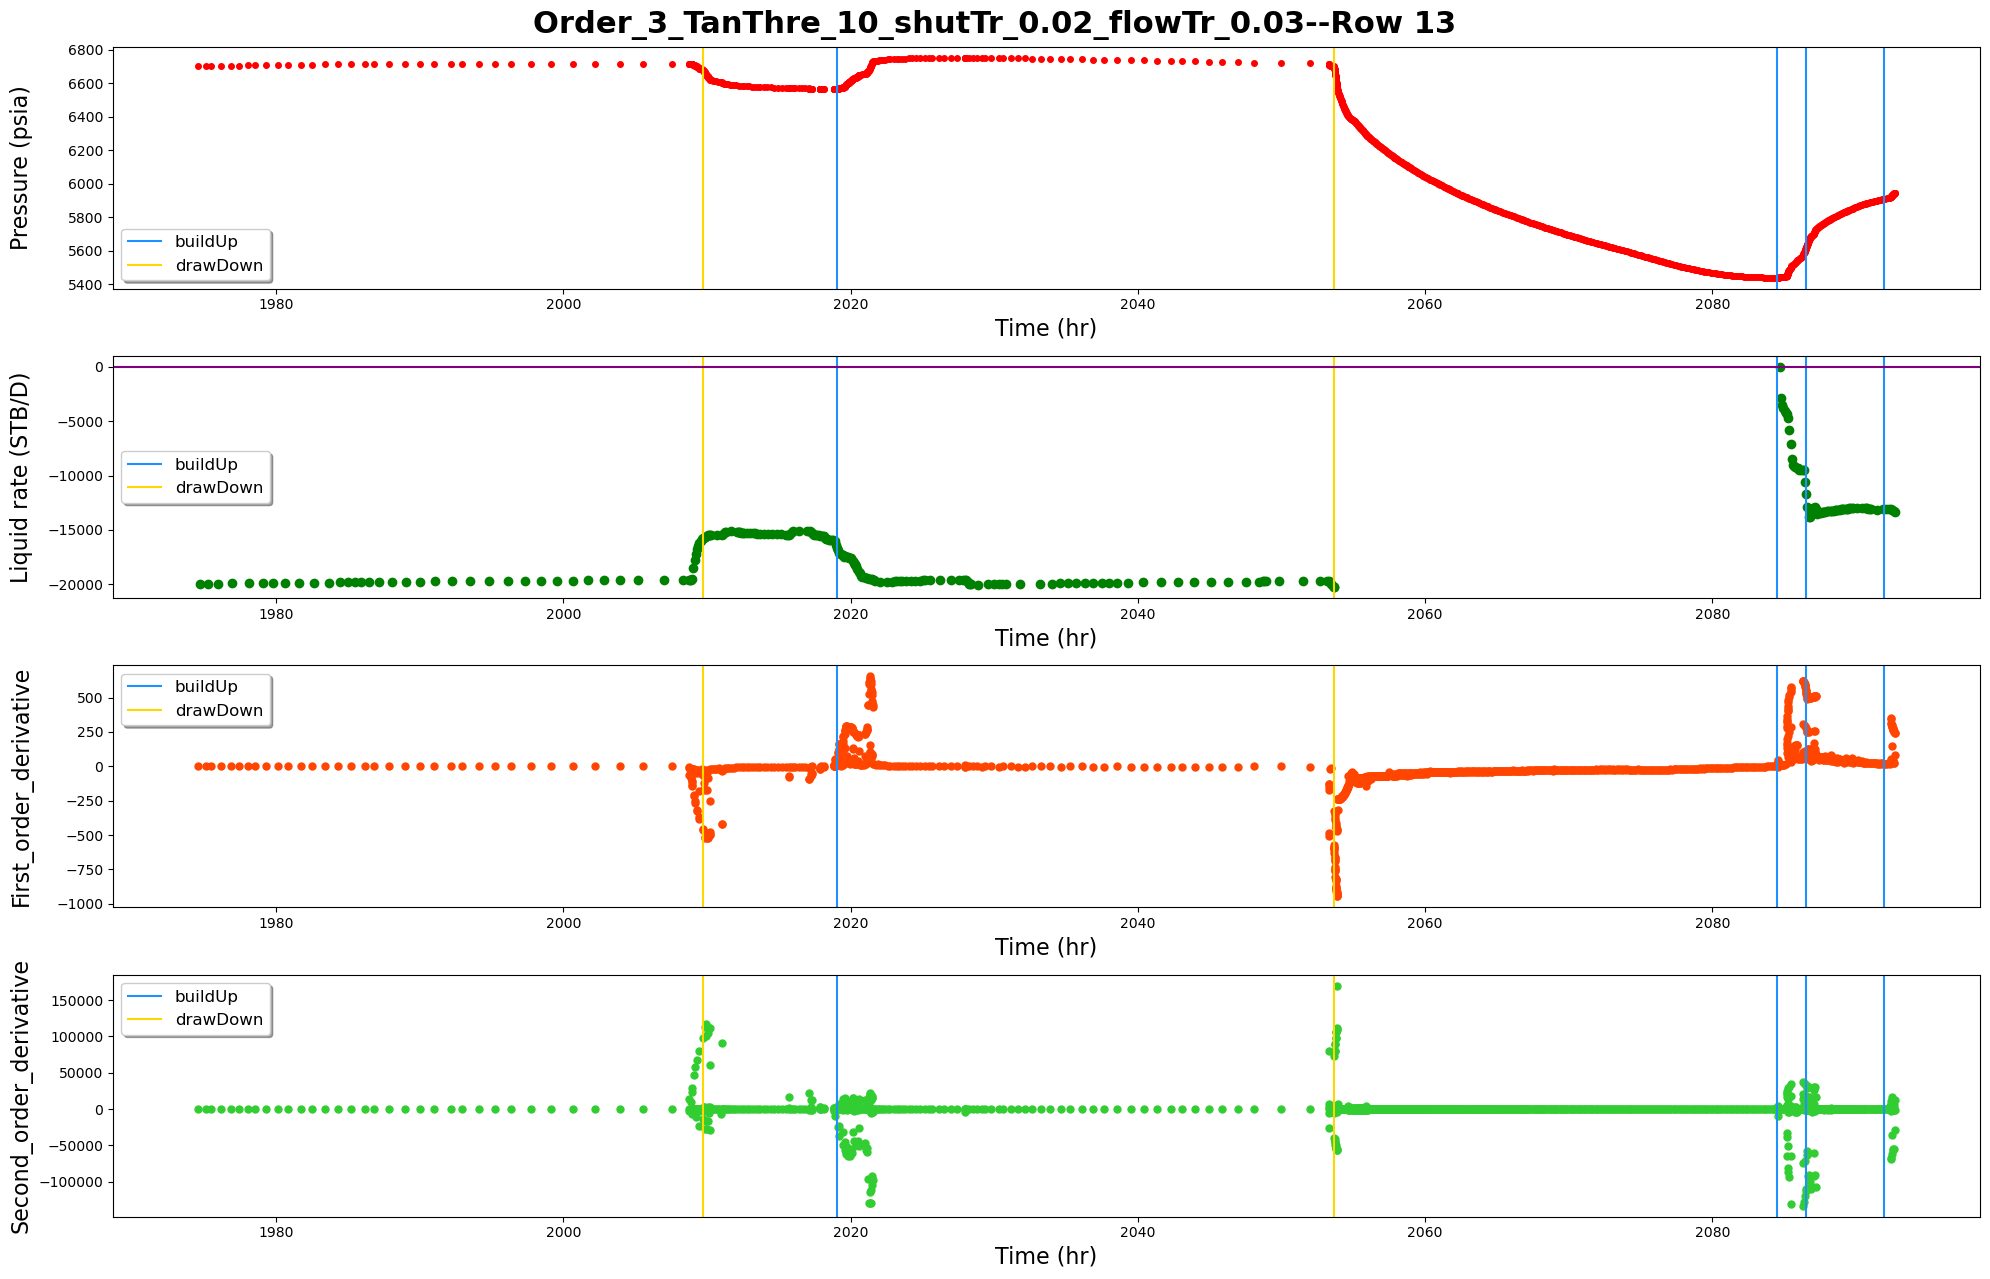

------row 14-----detected points:[15734, 15934, 16096, 16580, 16667, 16741]


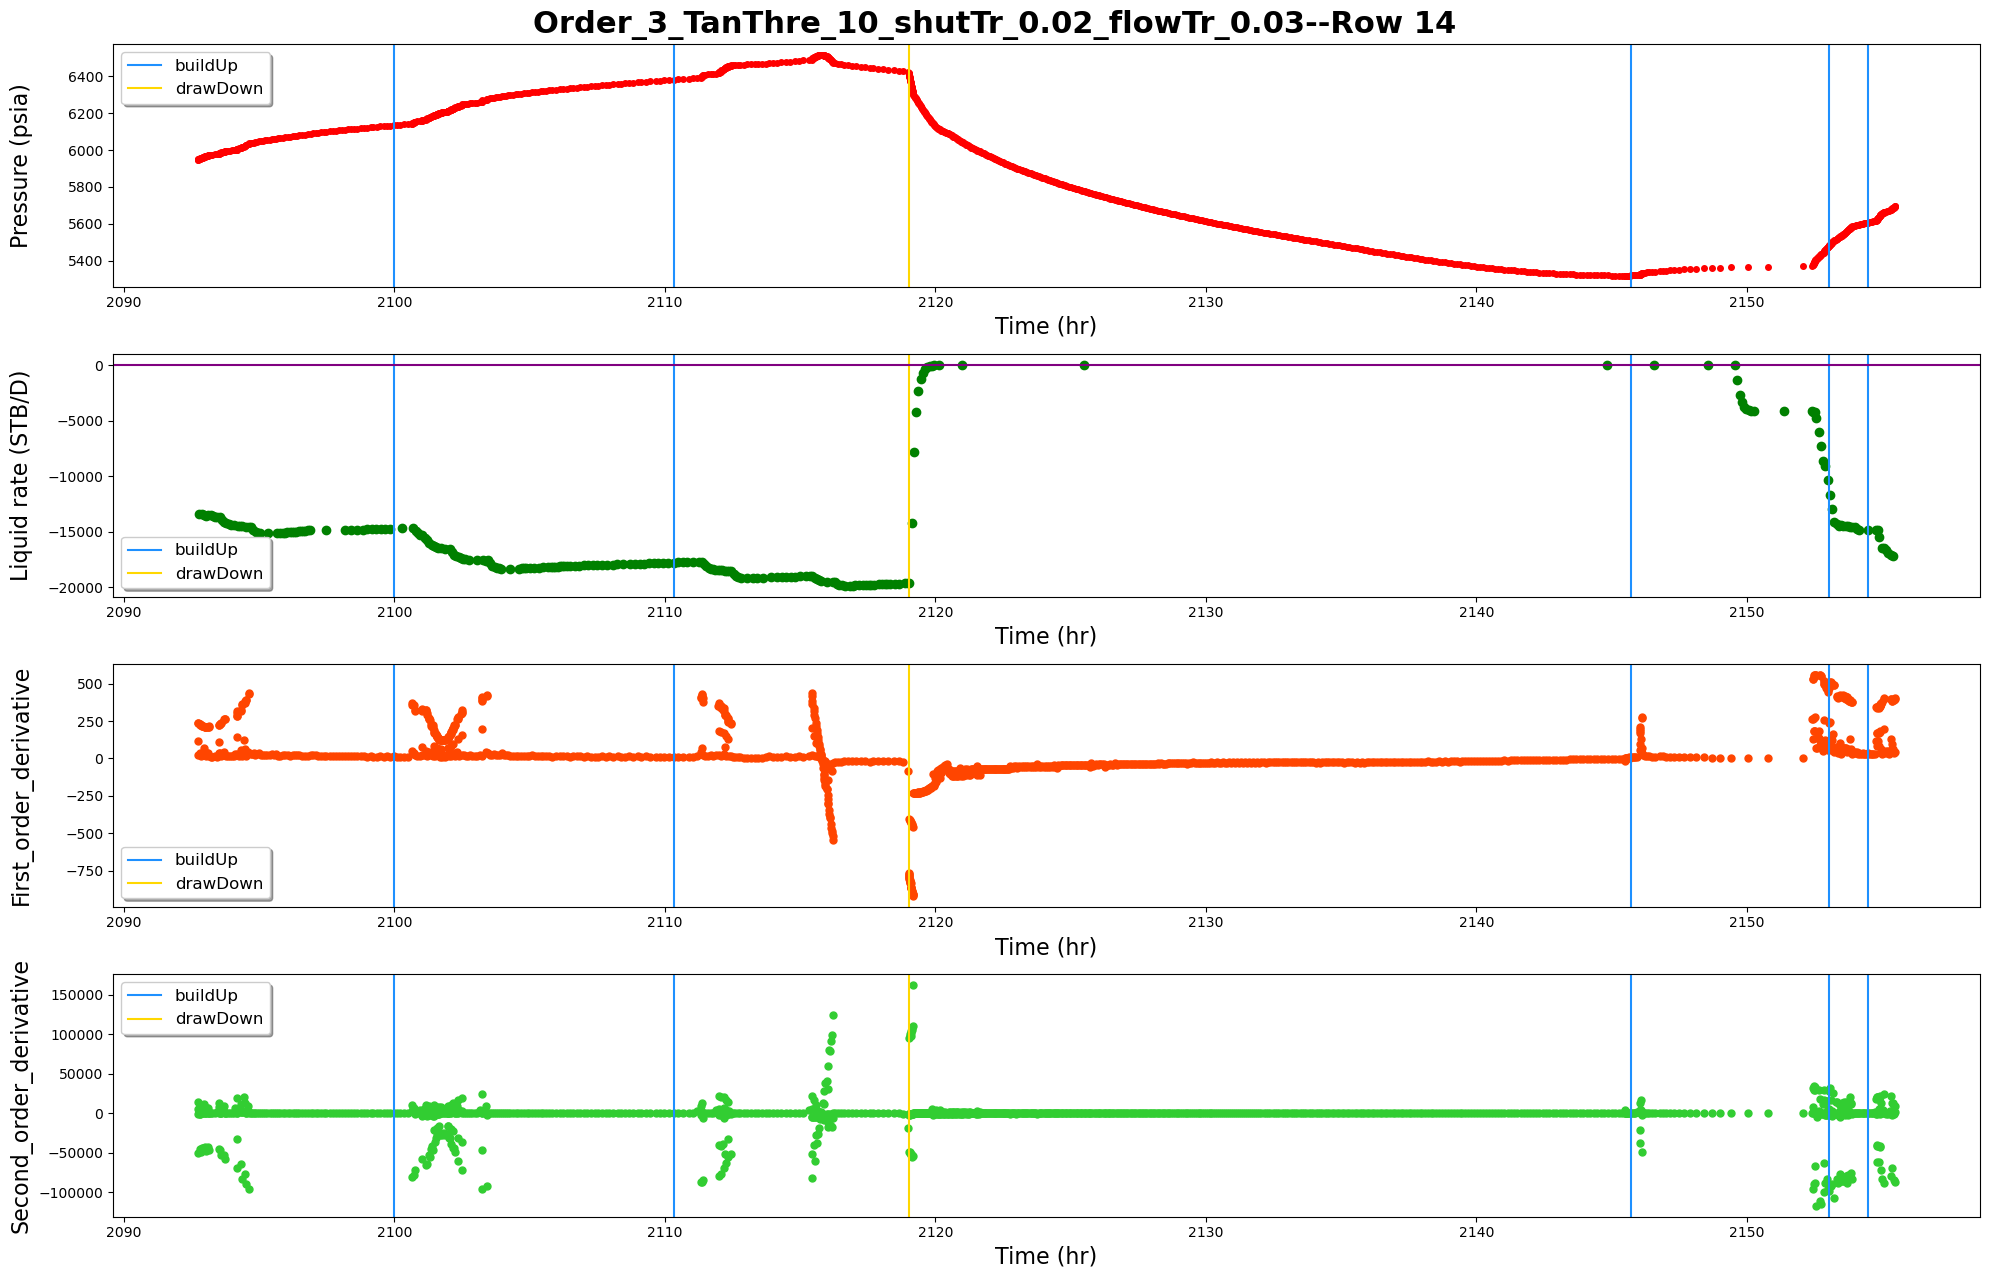

------row 15-----detected points:[16830, 16898, 16964, 17059, 17161, 17282, 17462, 17589]


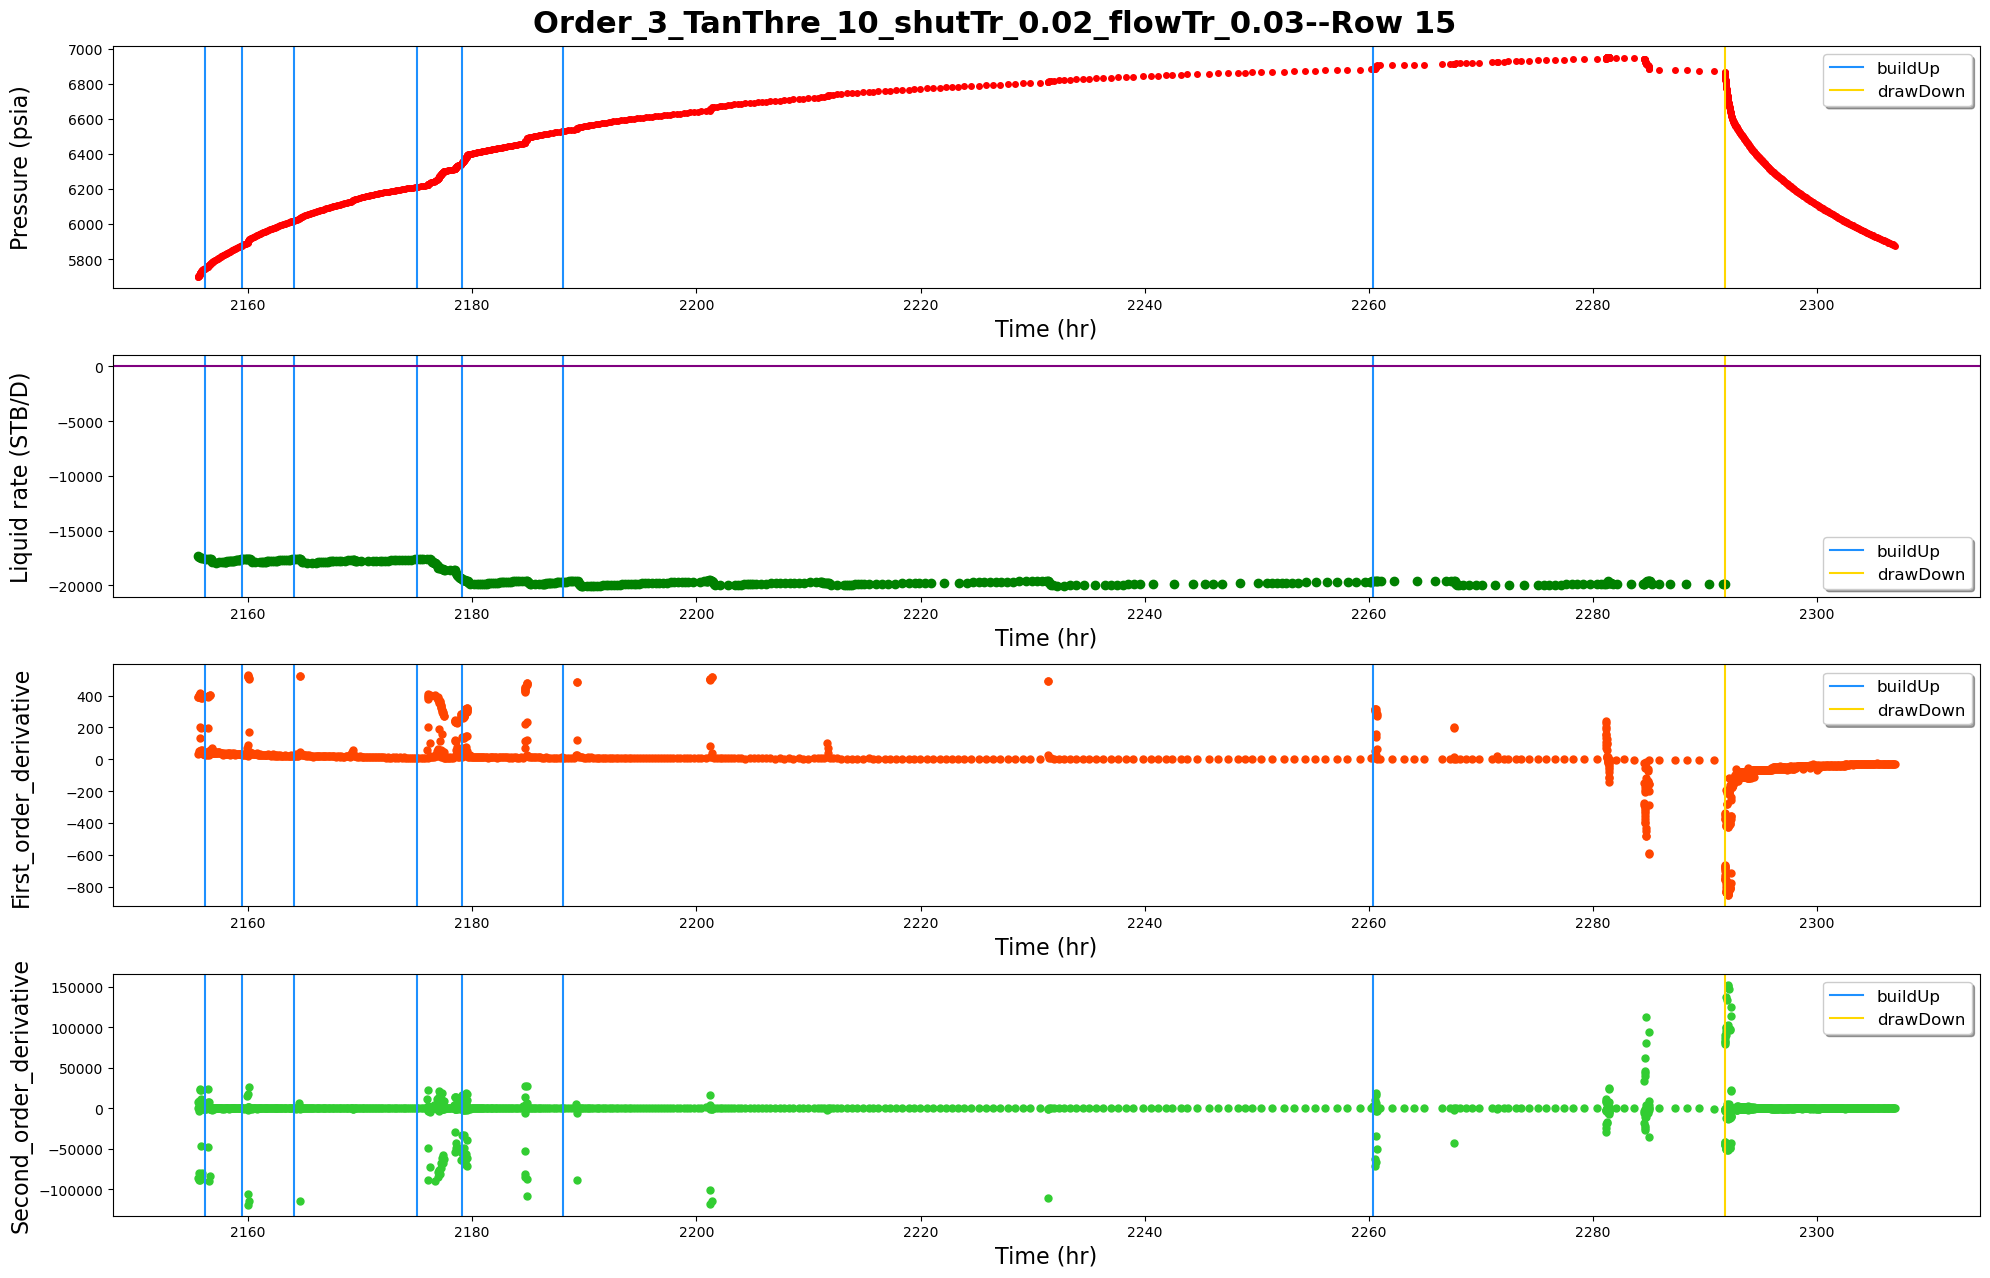

------row 16-----detected points:[18433, 18497, 18542, 18640, 18713, 18773, 18875, 18945, 19025, 19143]


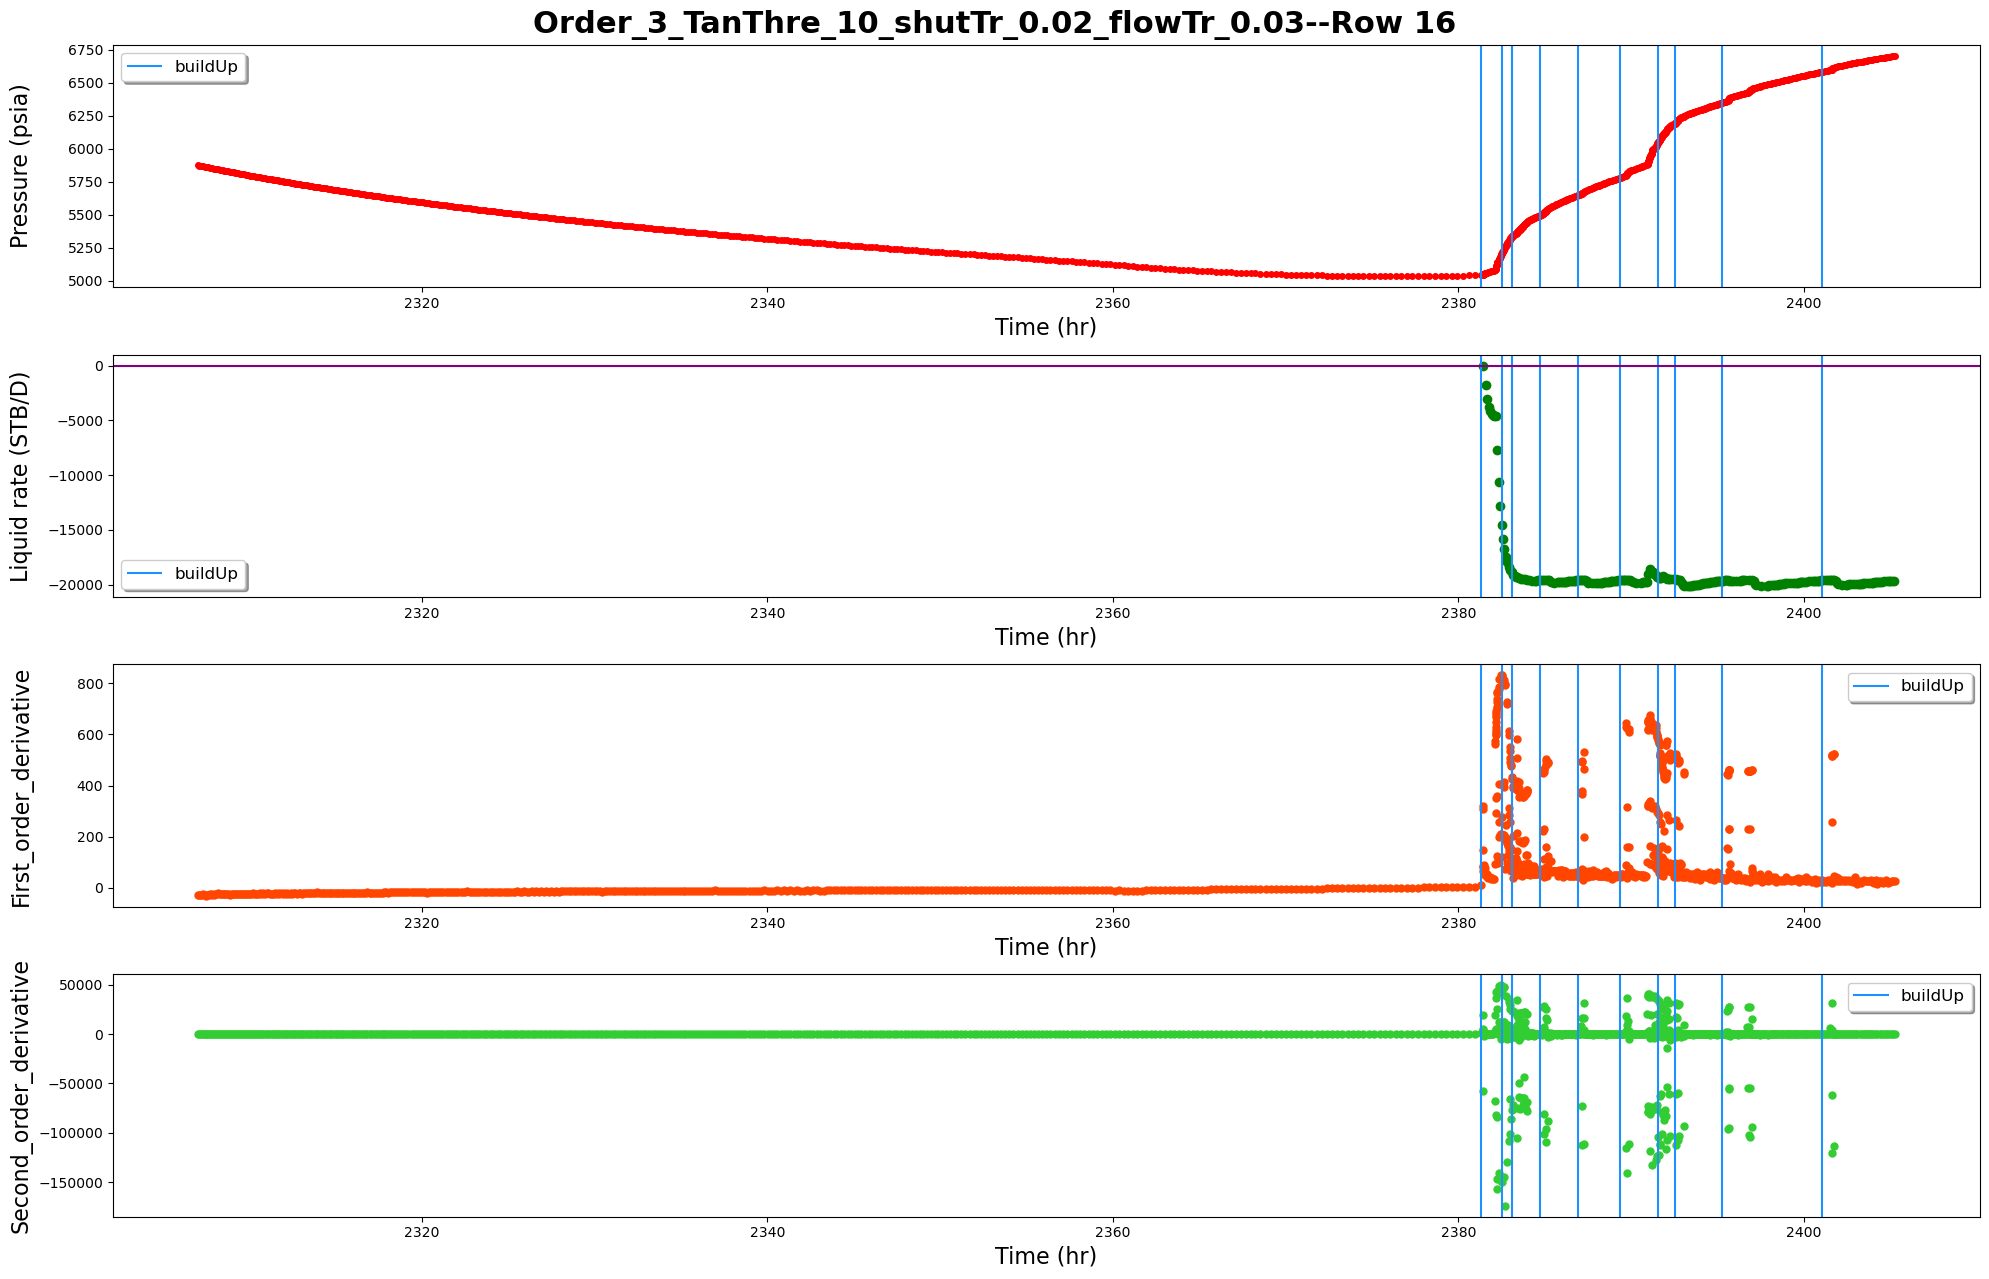

------row 17-----detected points:[19202, 19290, 19355, 19428, 19556, 19642, 19761, 19854, 20077, 20330, 20384]


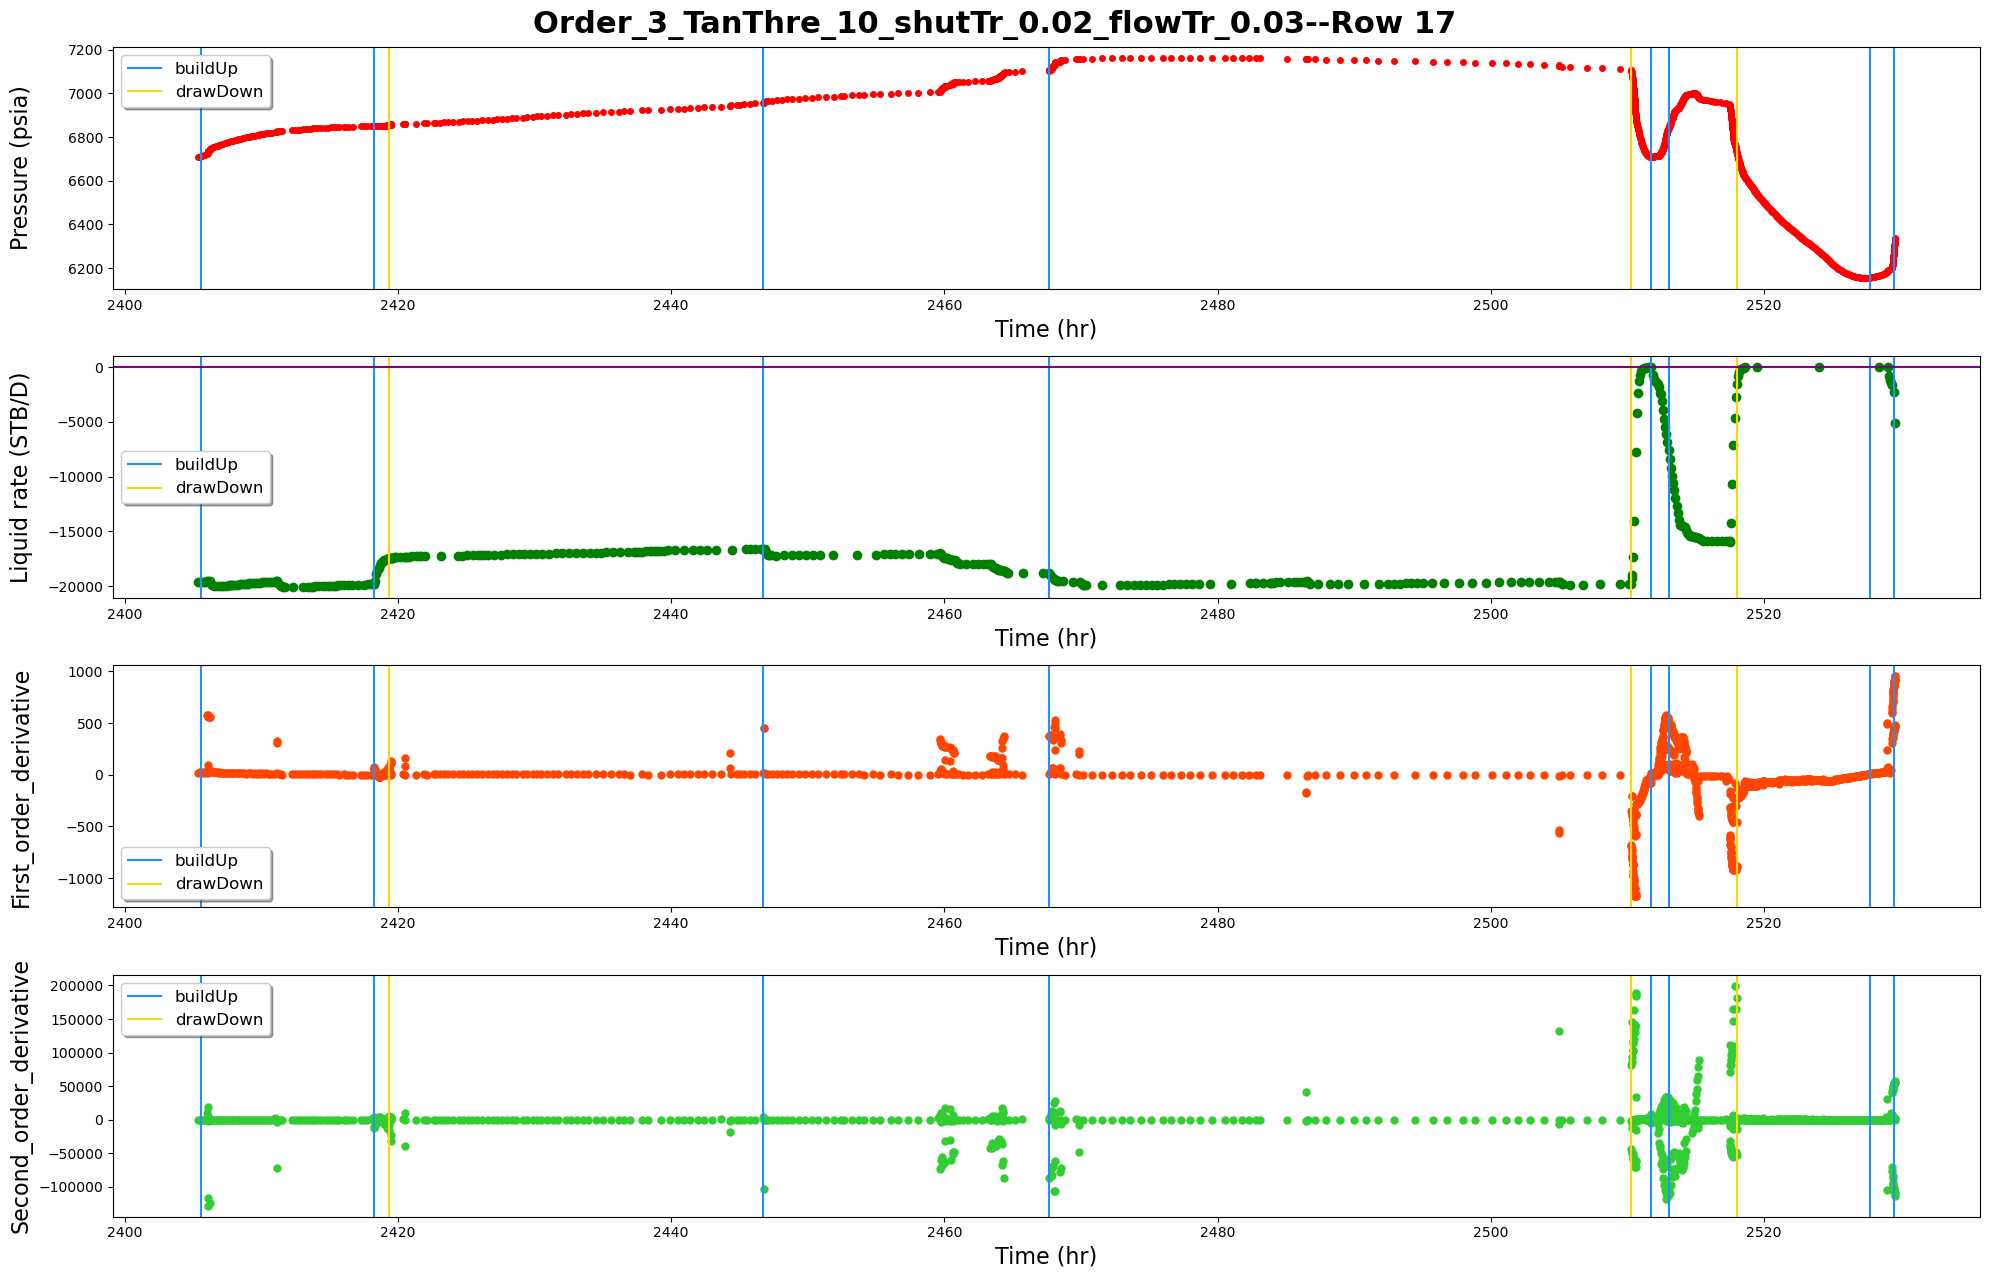

------row 18-----detected points:[20457, 20557, 20628, 20700, 21026, 21120, 21168, 21263, 21369, 21478]


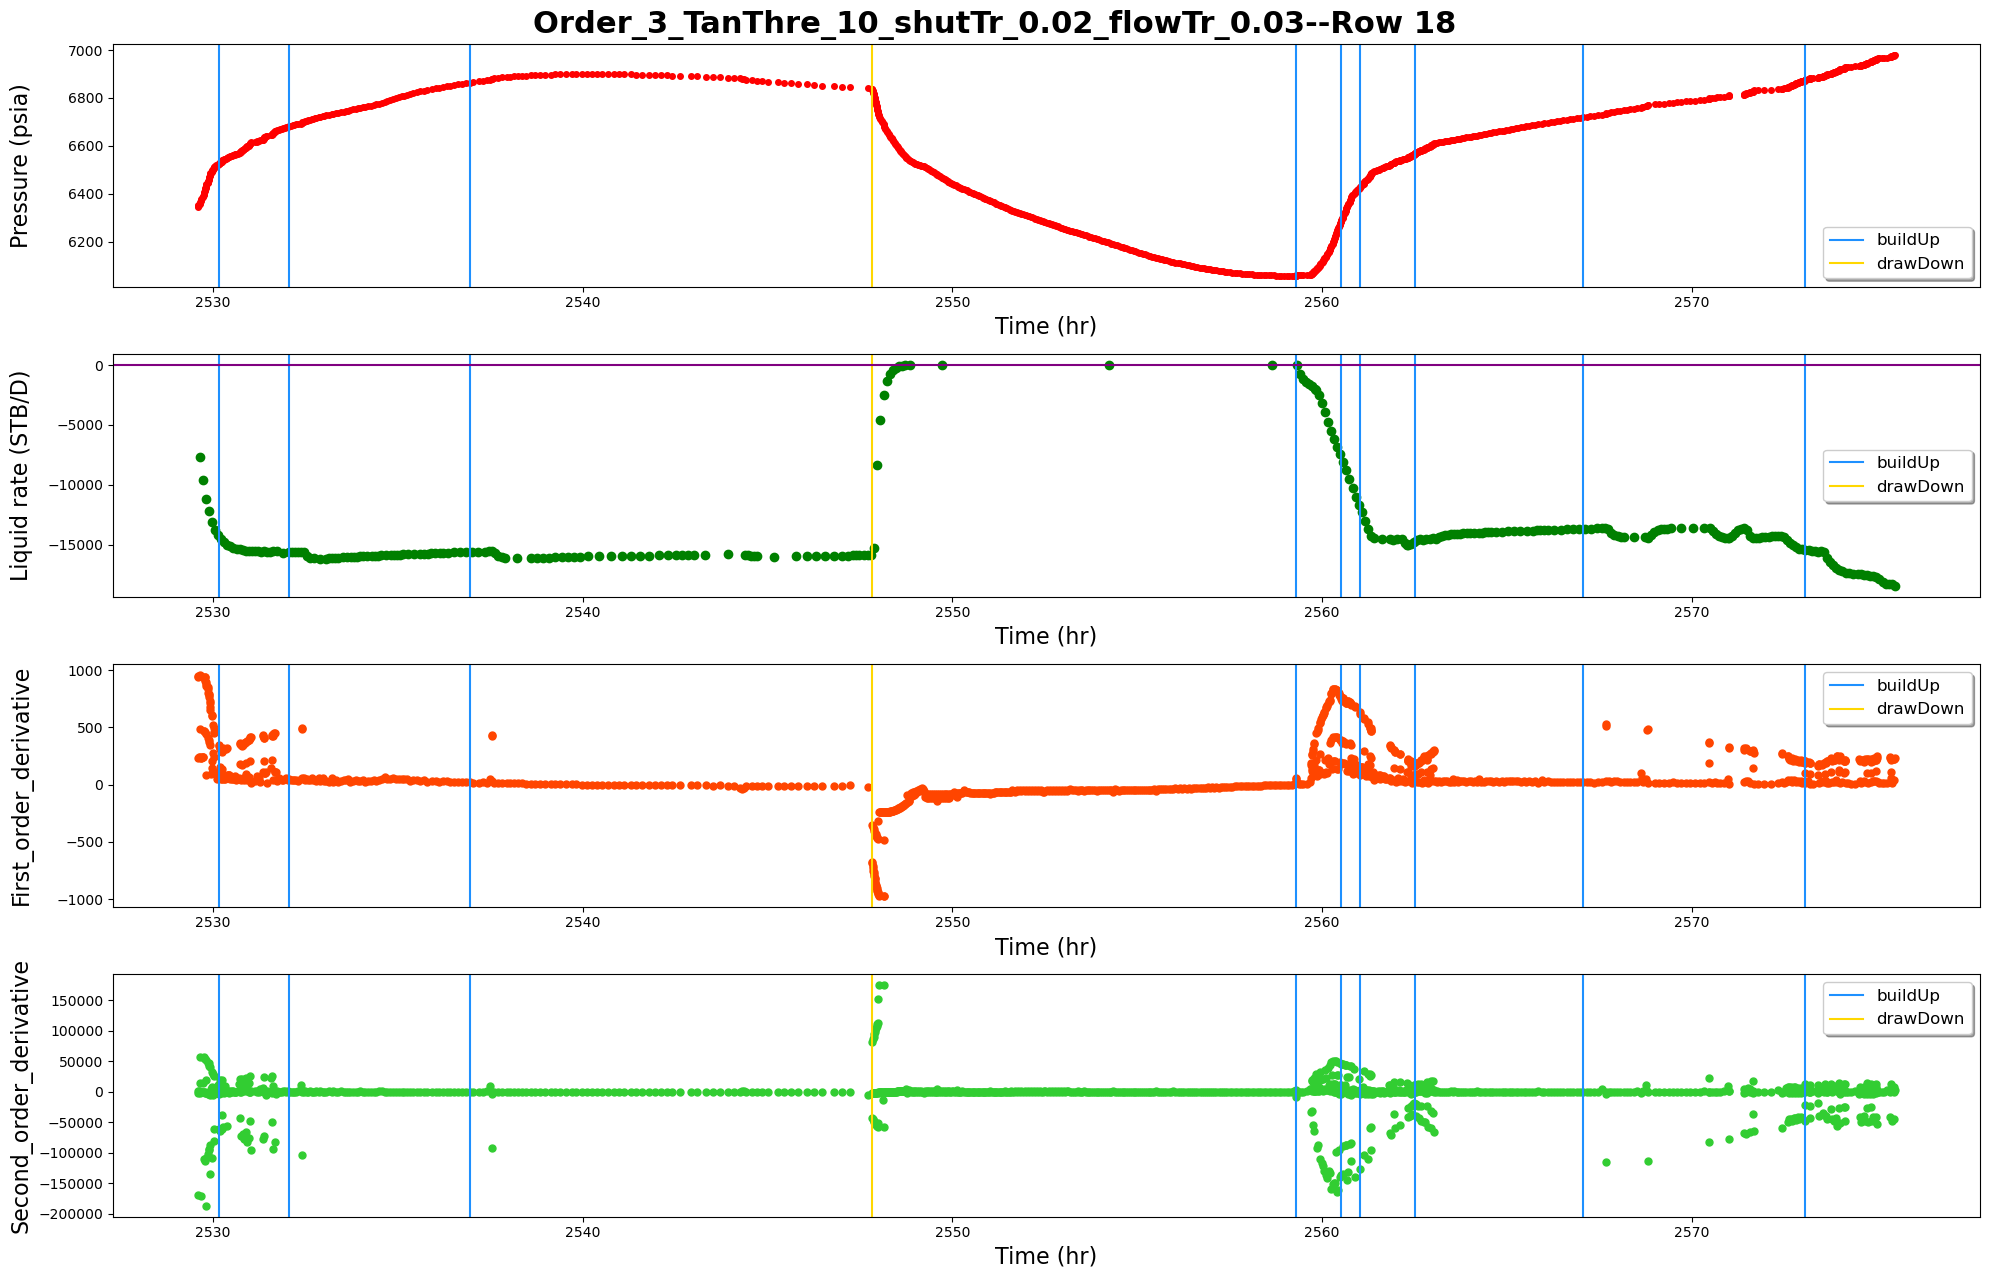

------row 19-----detected points:[21646, 21778, 21974, 22181, 22294, 22402, 22523, 22611, 22709]


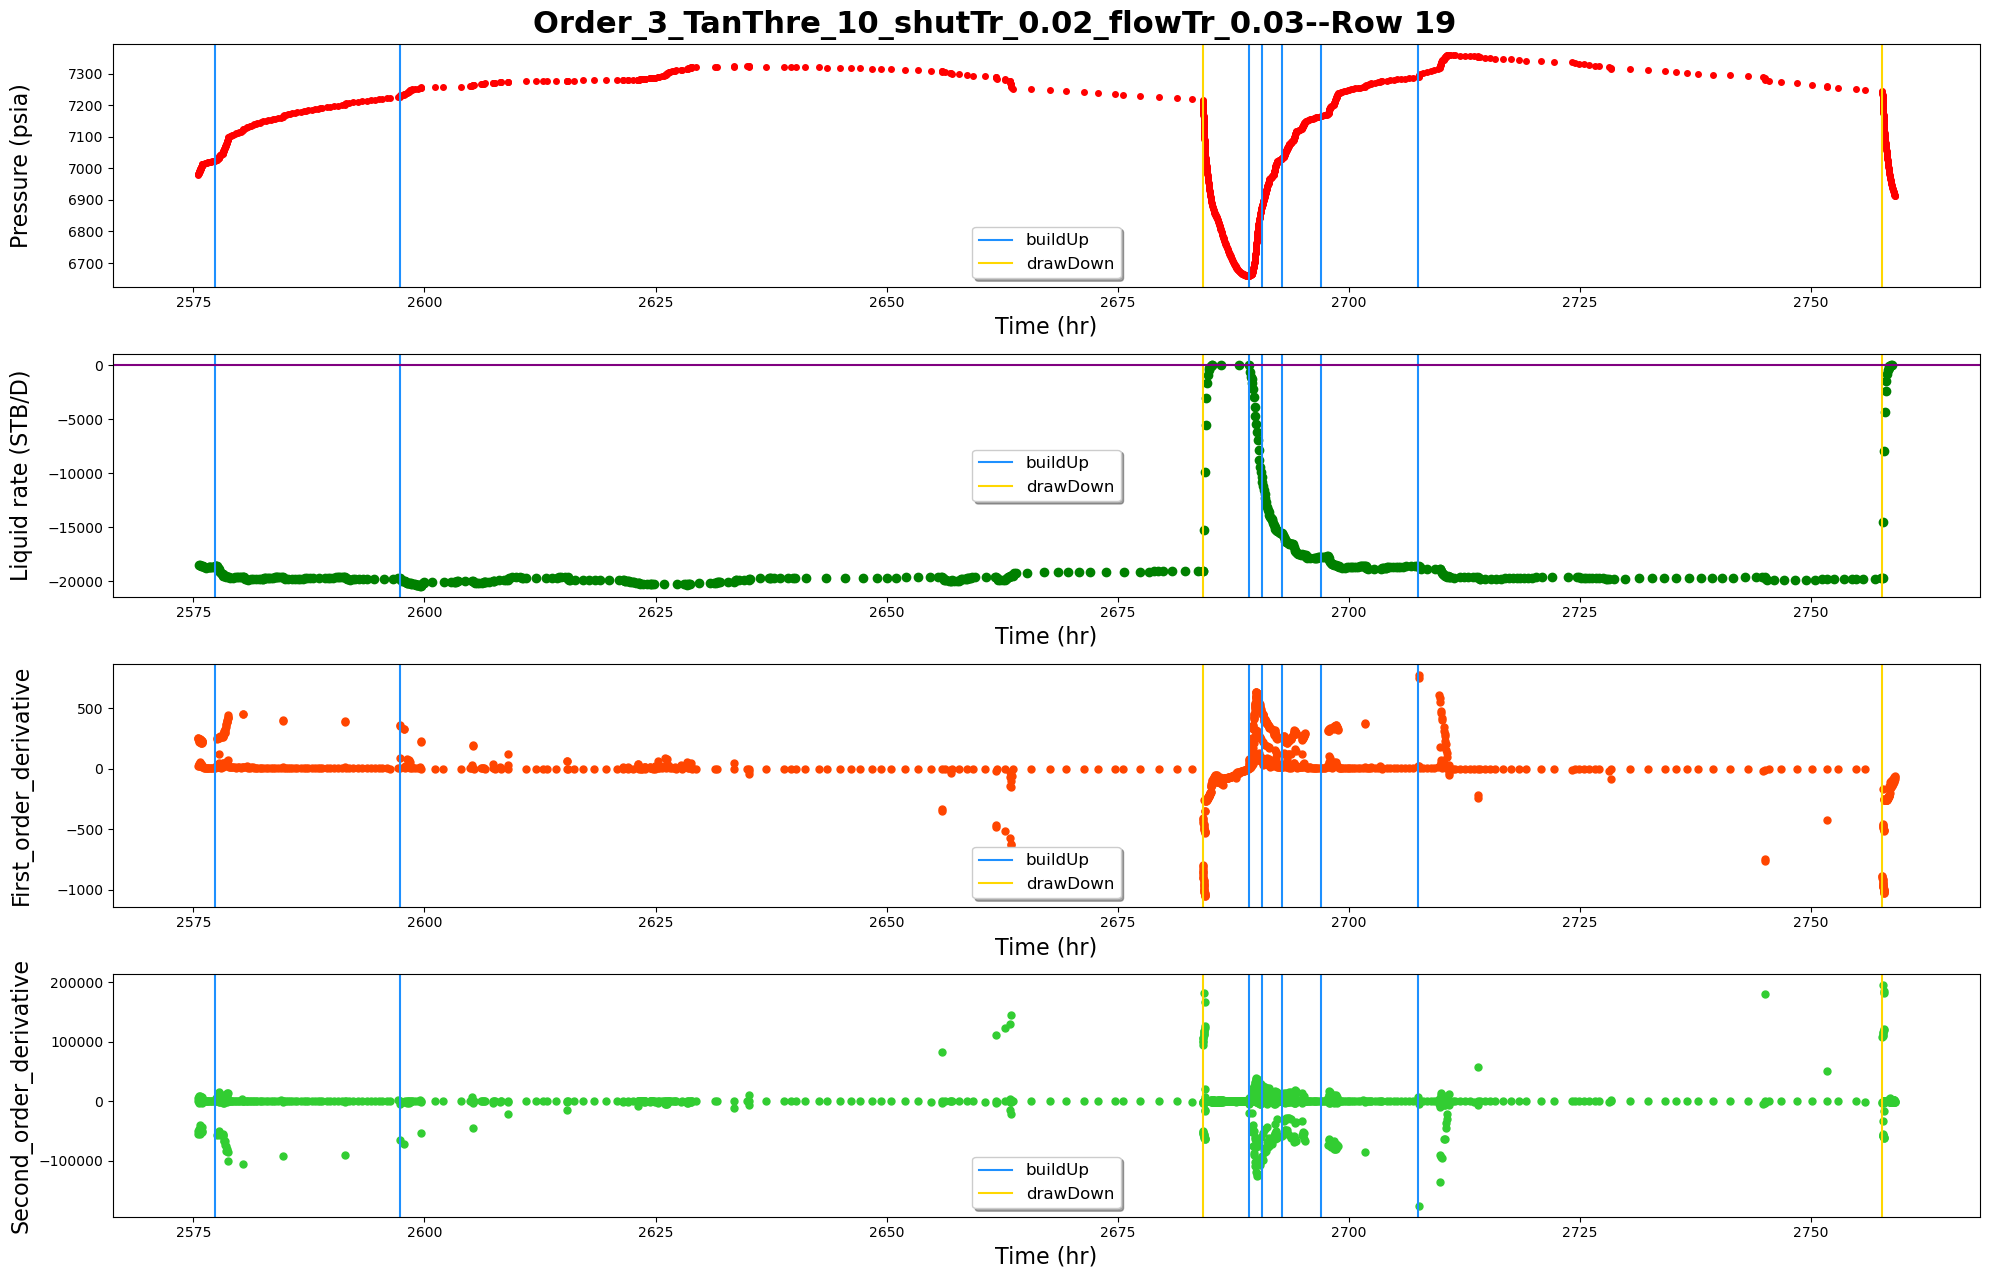

------row 20-----detected points:[23219, 23312, 23394, 23561, 23634, 23832, 23934]


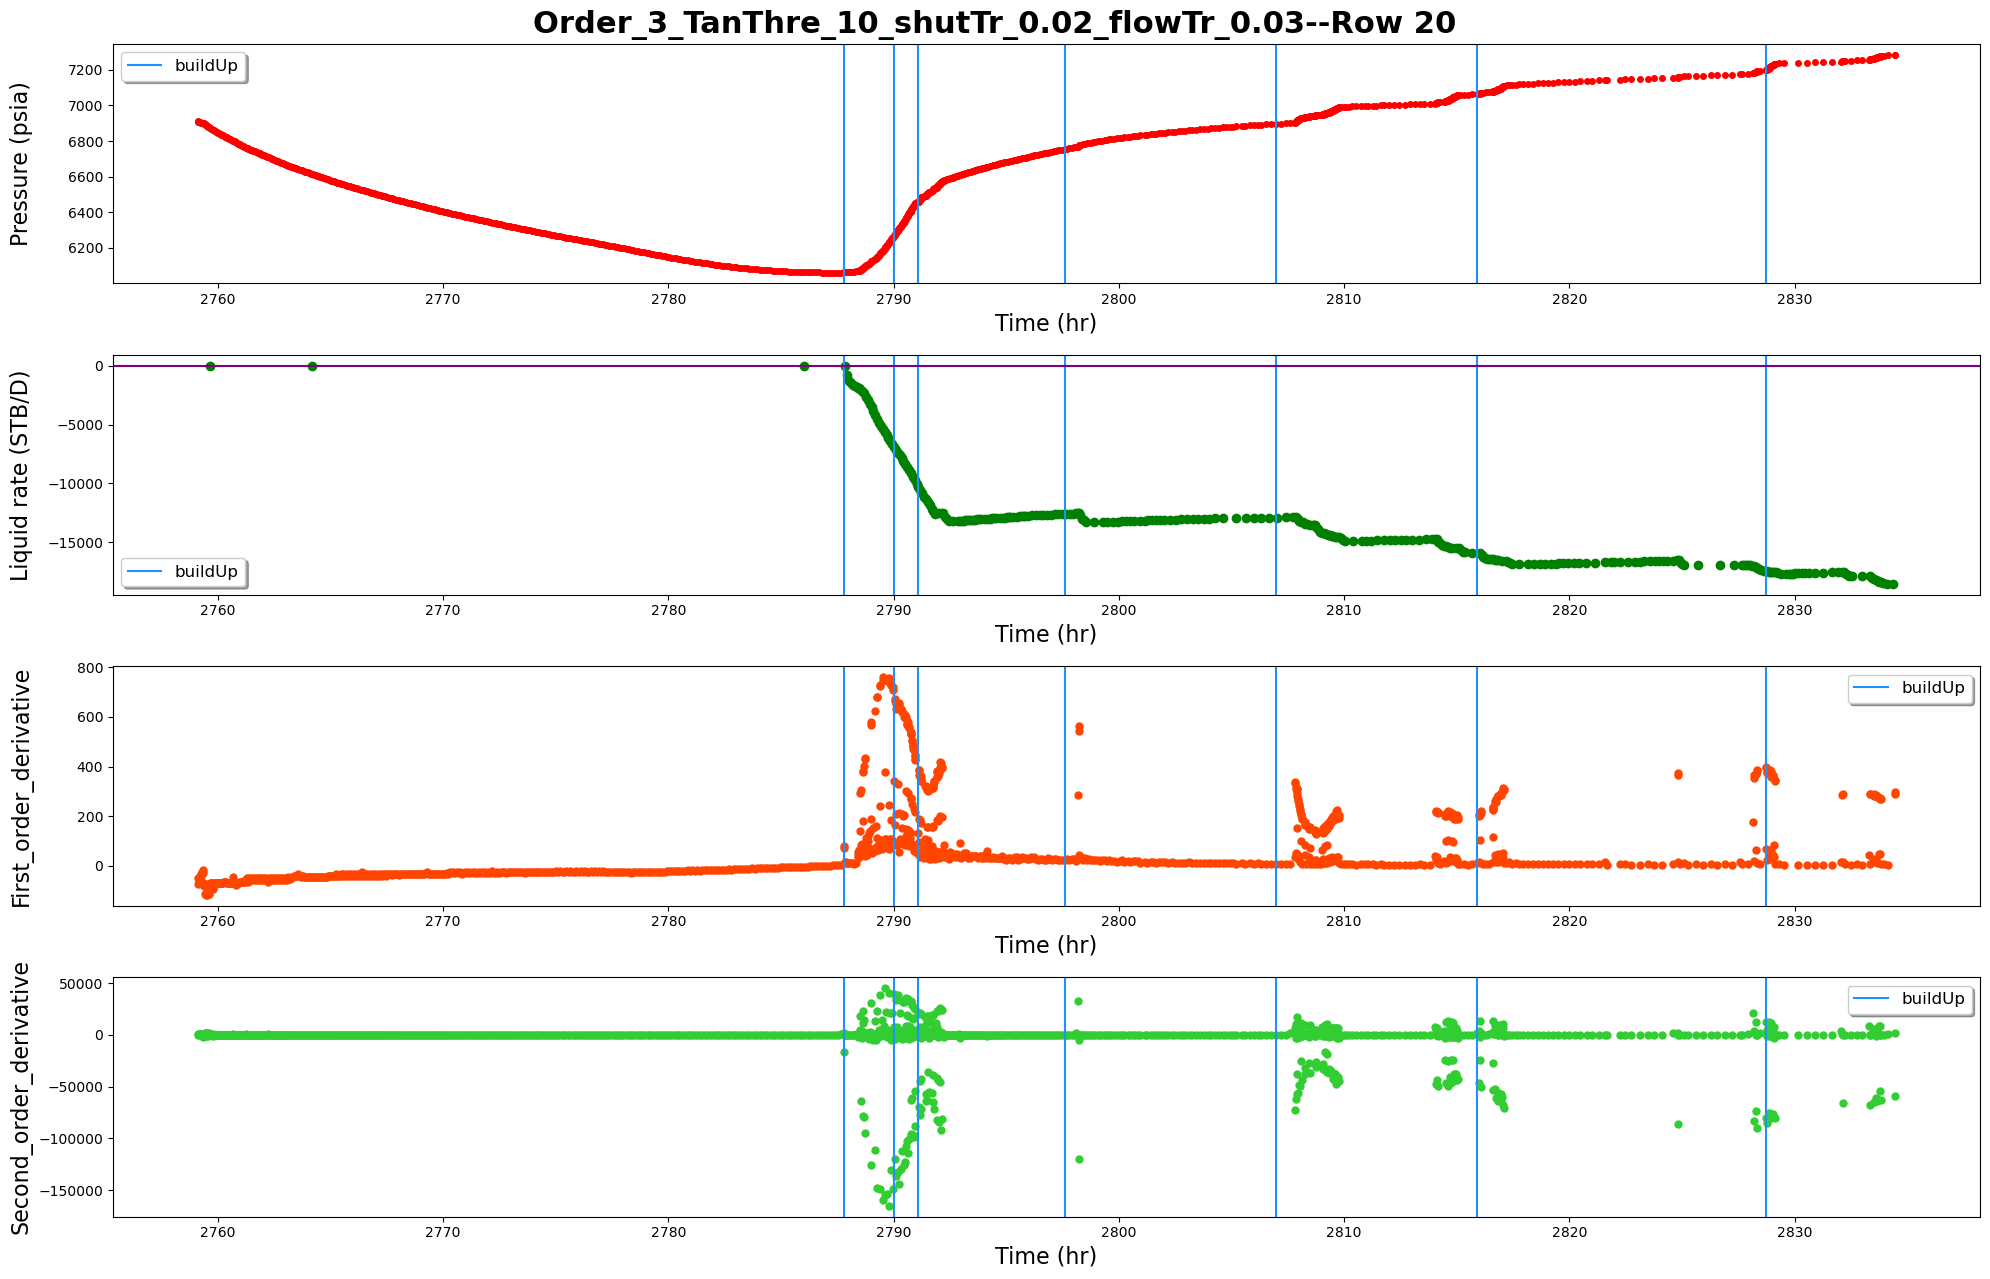

------row 21-----detected points:[24068, 24215, 24679, 24752, 24872, 25053, 25161]


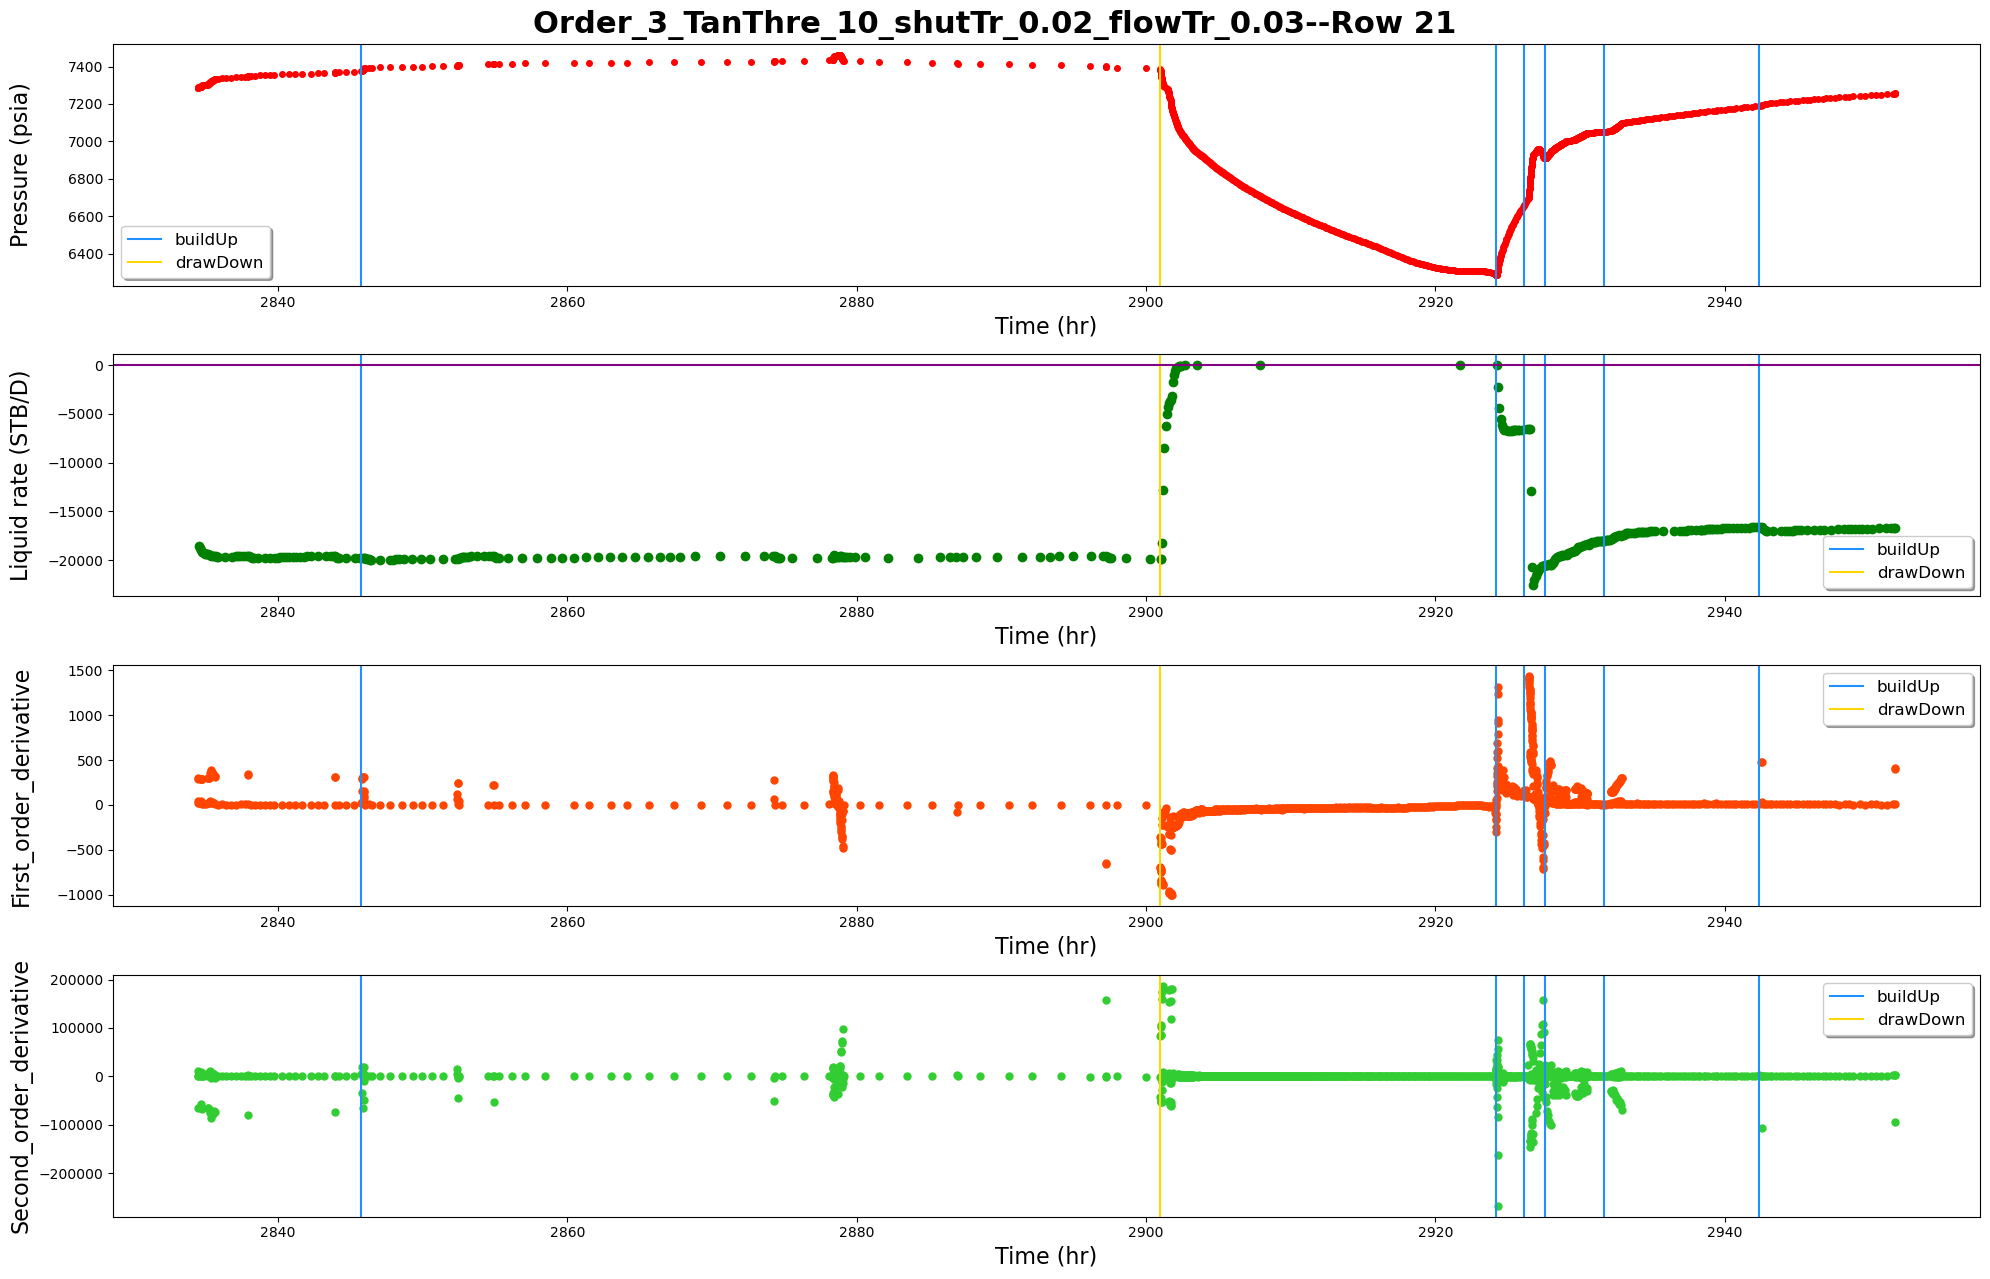

------row 22-----detected points:[25252, 25356, 25750, 25996, 26042, 26091, 26158, 26286]


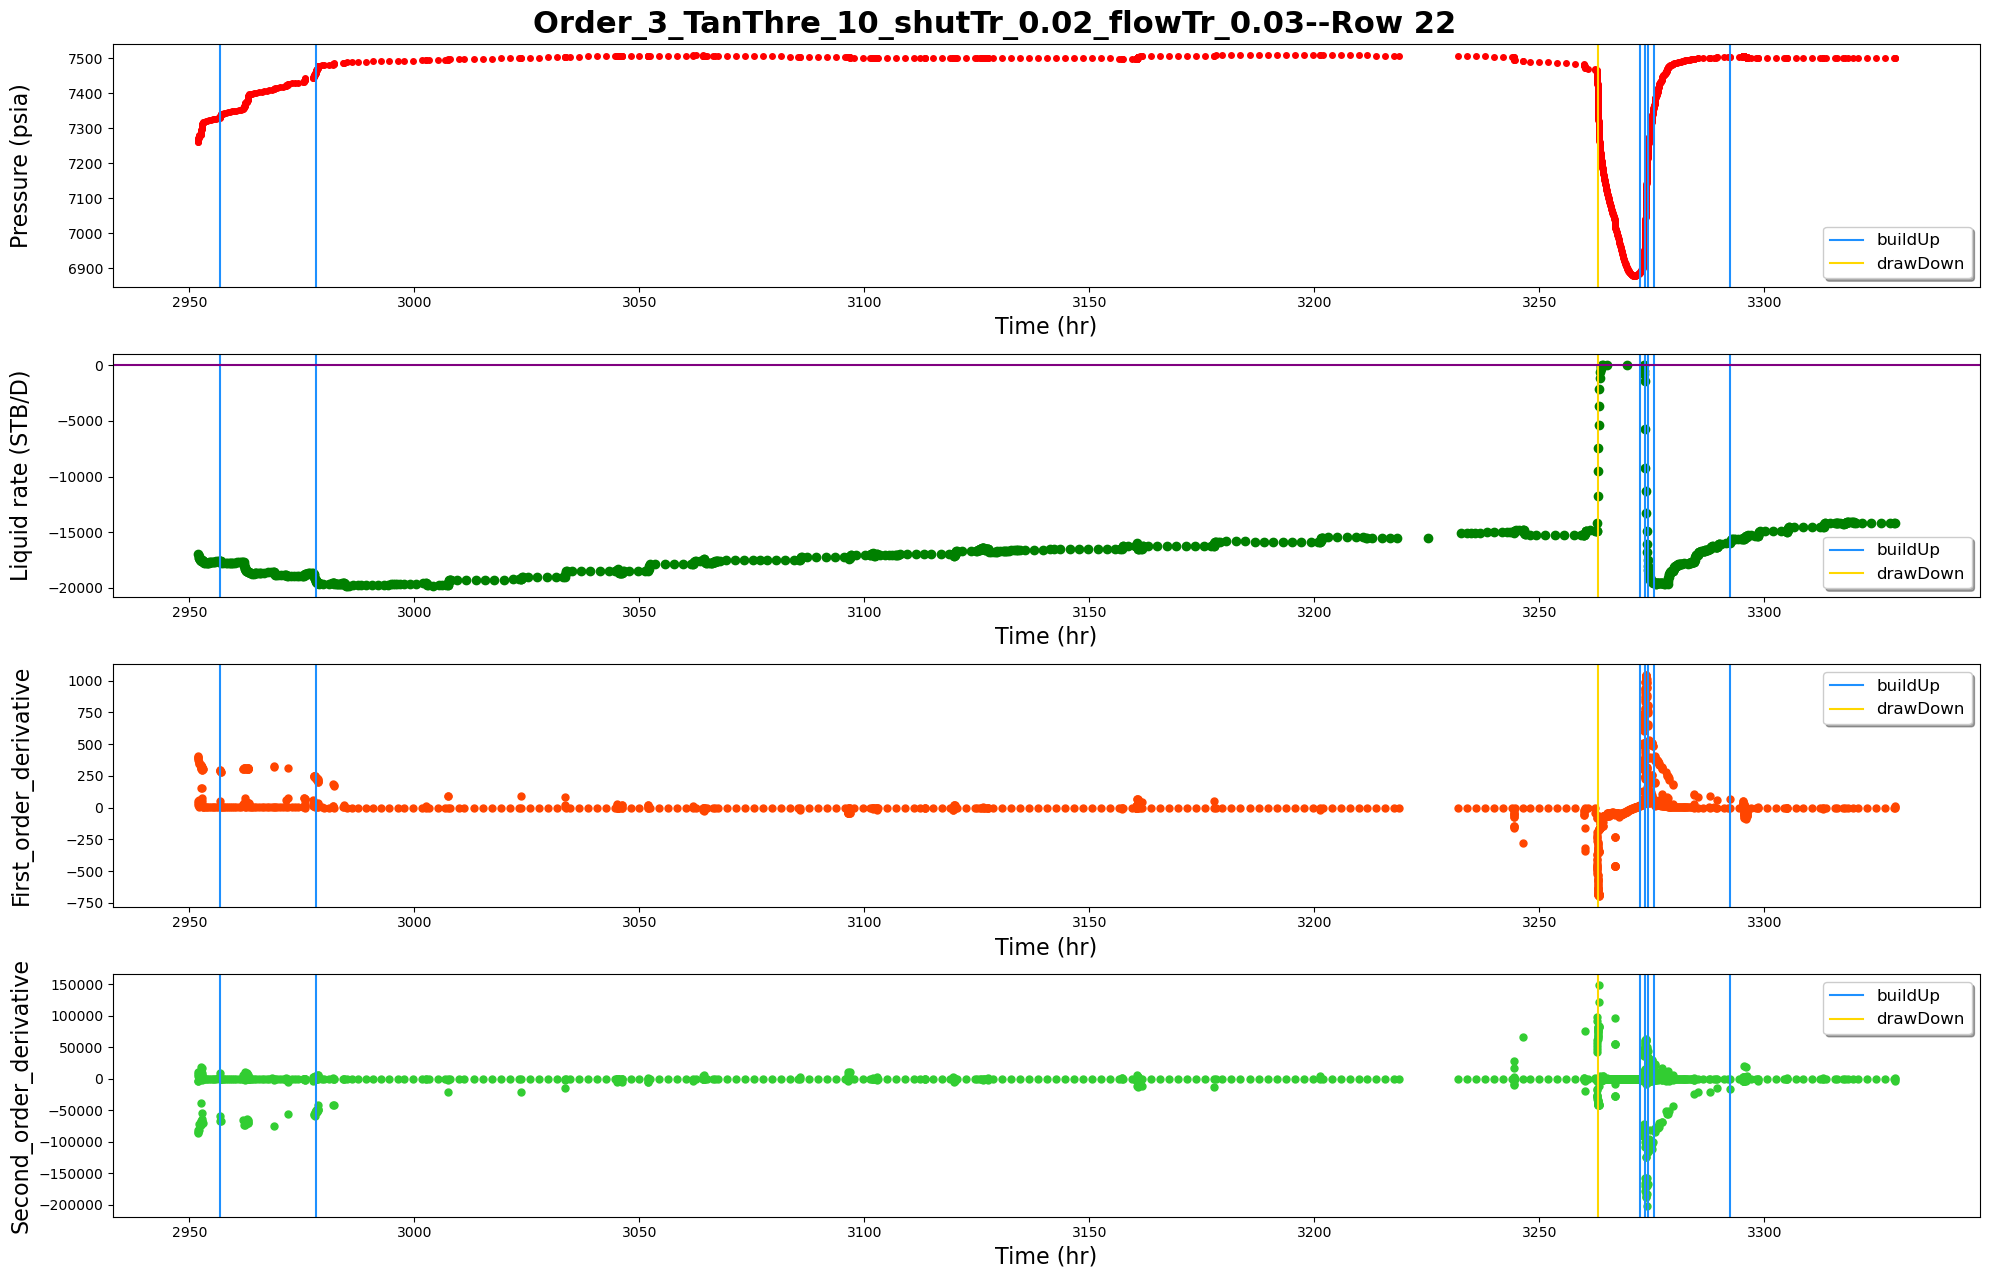

------row 23-----detected points:[26711, 26755, 26812, 26868, 27025, 27315, 27403, 27459, 27515, 27587]


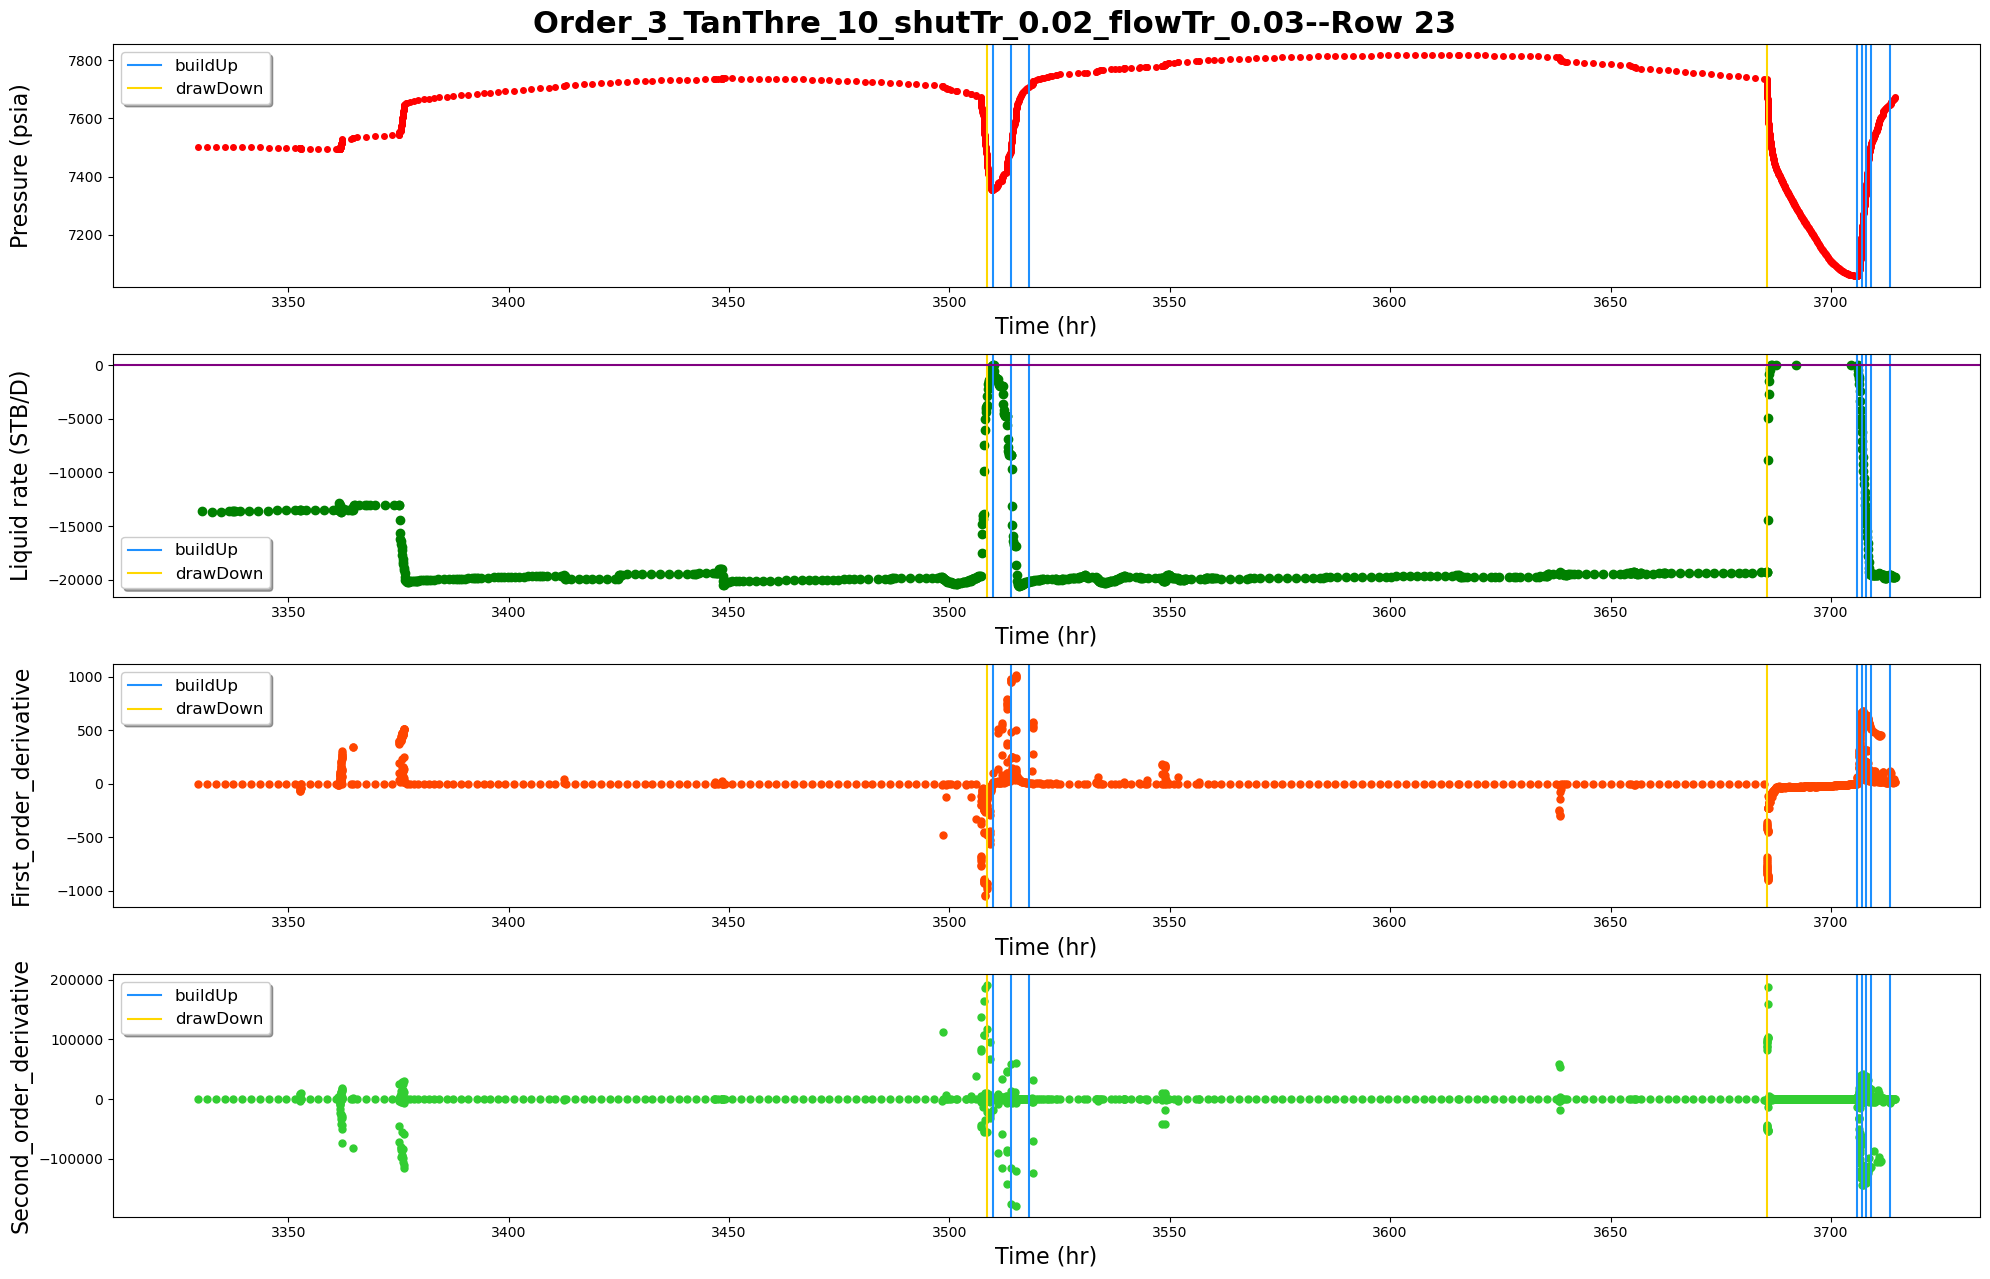

------row 24-----detected points:[27682, 27781, 27962, 28070, 28136, 28227, 28290, 28488, 28566, 28628, 28767]


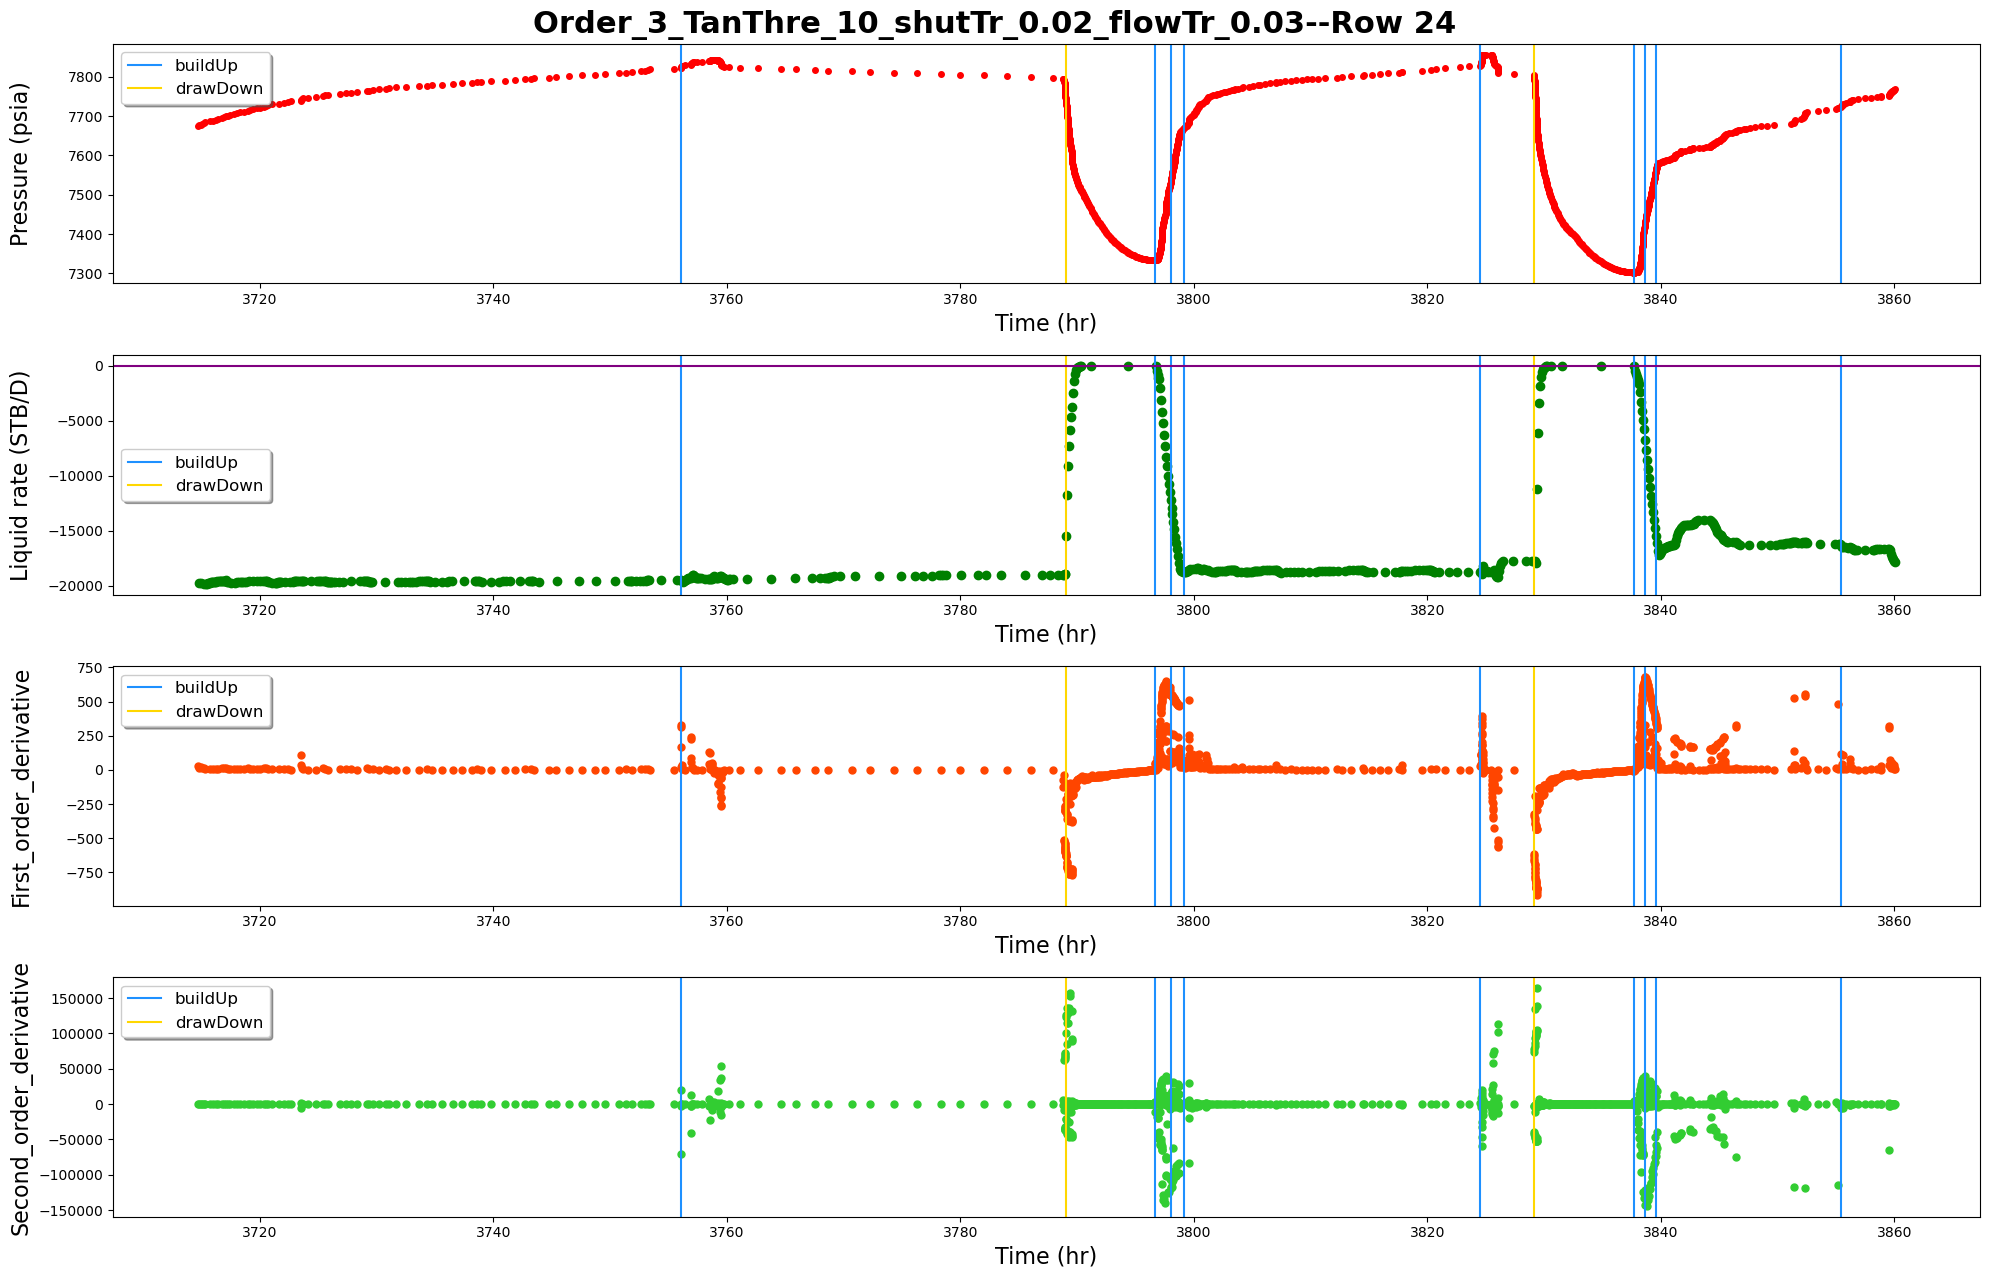

------row 25-----detected points:[28840, 29108, 29181, 29278, 29364, 29466, 29782]


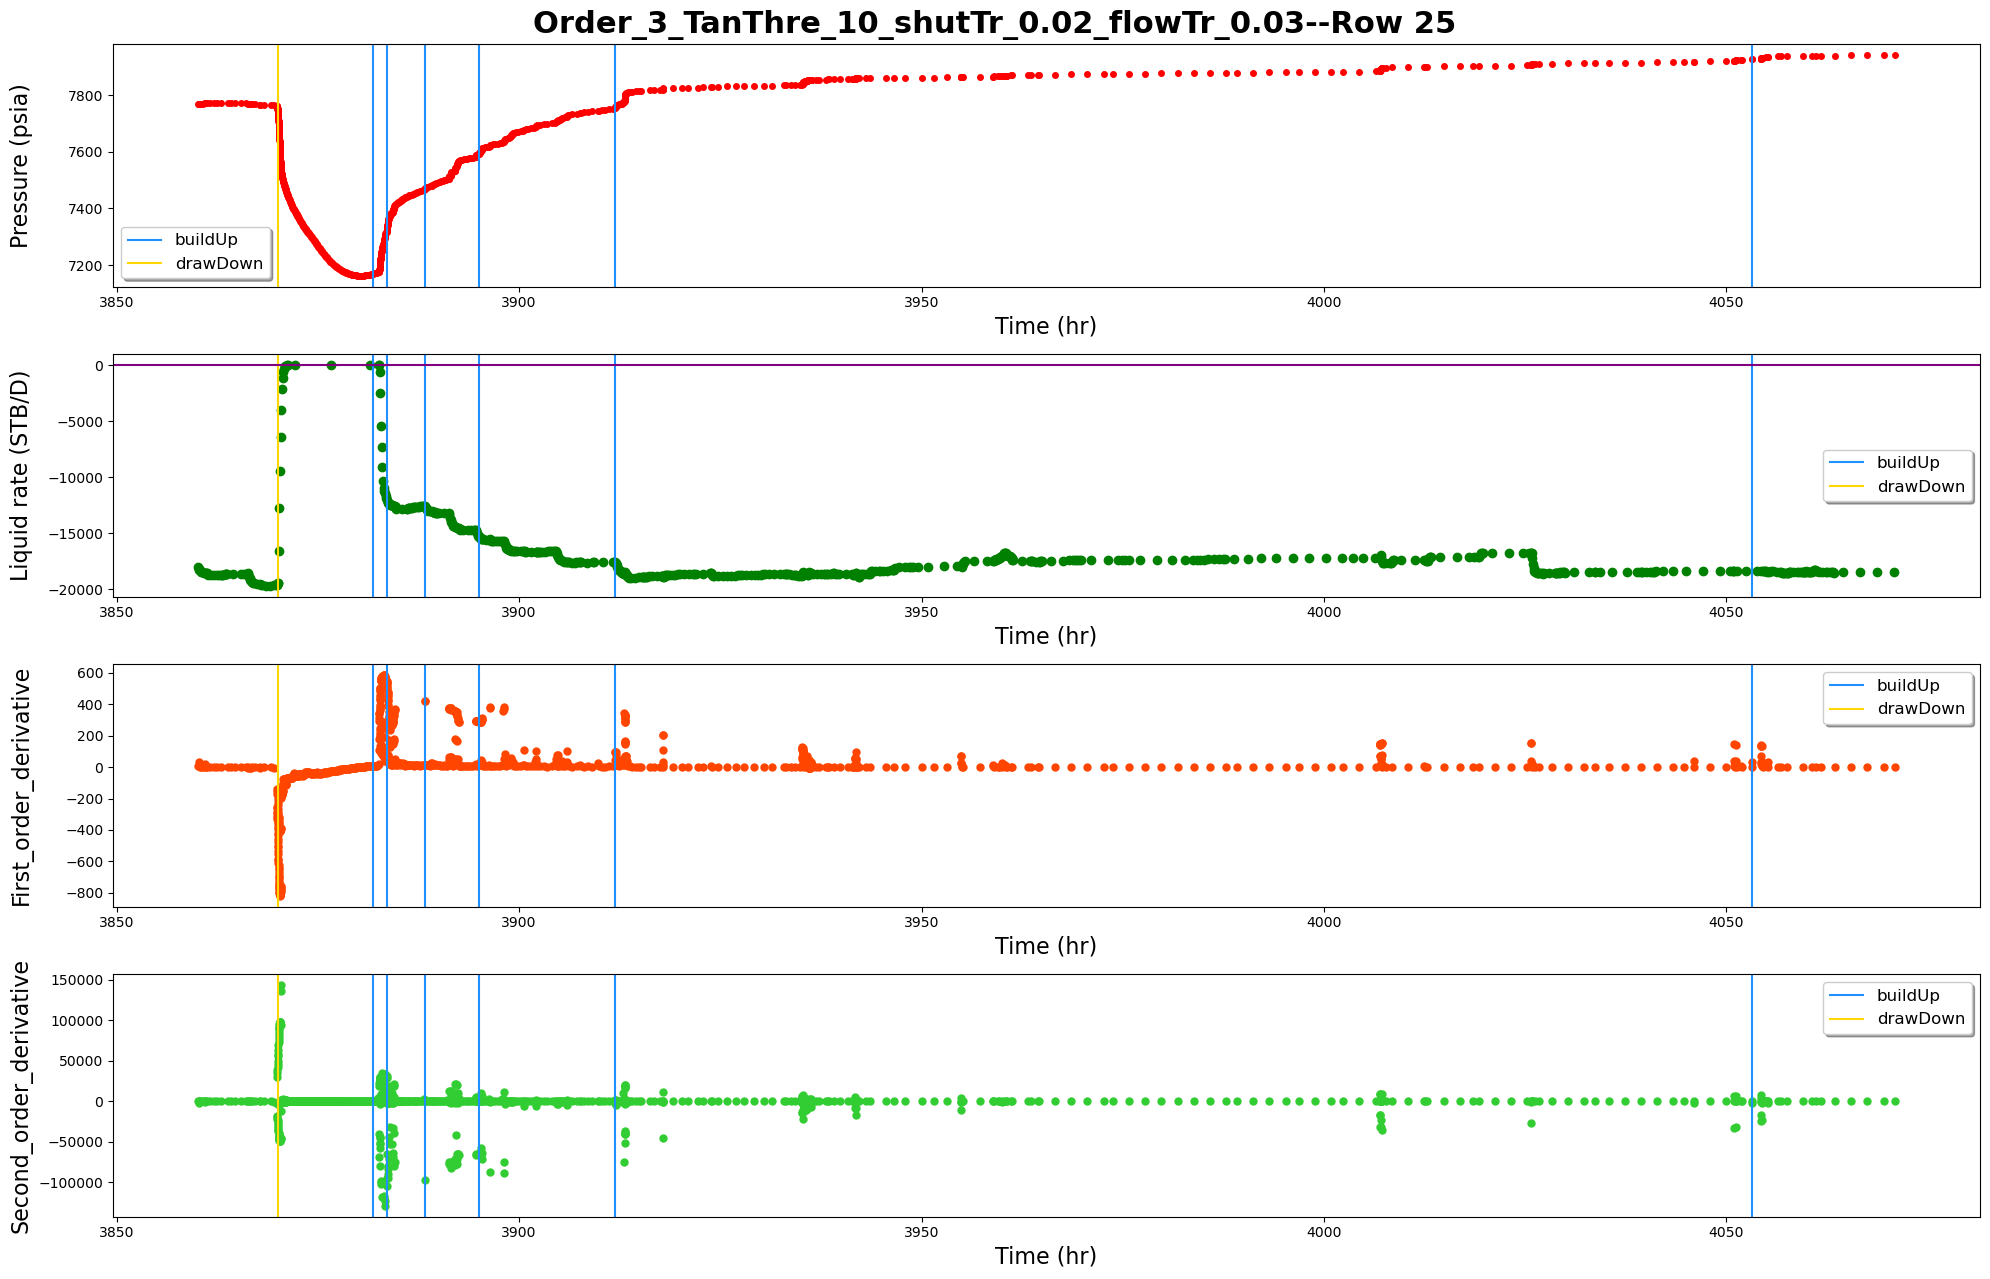

In [38]:
points_type="allPoints"
# points_type="majorTransients"
# parameters={}
parameters={"Order":polynomial_order,
            "TanThre":deltaTangent_criterion,
            "shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
detect_points_dict=transients.allPointsStored

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=True
folder_name=f"{method}/{points_type}/pointHalfWin_{point_halfWindow}_timeStep_{time_step}"
%run plot_N_save.ipynb